In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%store -r main_data

In [3]:
%store -r store_data

In [4]:
year1_data=main_data[main_data['Year of Sale']==2013]
year2_data=main_data[main_data['Year of Sale']==2014]
year3_data=main_data[main_data['Year of Sale']==2015]

In [5]:
promo_df=main_data[main_data['Promo']==1]
nopromo_df=main_data[main_data['Promo']==0]

In [6]:
average_sales_promo=promo_df.groupby('Store')['Sales'].mean().reset_index()
average_sales_promo.columns=['Store','Average Sales when there is a one-day Promo']
average_sales_nopromo=nopromo_df.groupby('Store')['Sales'].mean().reset_index()
average_sales_nopromo.columns=['Store','Average Sales when there is no one-day Promo']
average_sales_promo['Average Sales when there is no one-day Promo']=average_sales_nopromo['Average Sales when there is no one-day Promo']
store_data=store_data.merge(average_sales_promo,how='left',on='Store')

In [7]:
average_customers_promo=promo_df.groupby('Store')['Customers'].mean().reset_index()
average_customers_promo.columns=['Store','Average Customer walkins when there is a one-day Promo']
average_customers_nopromo=nopromo_df.groupby('Store')['Customers'].mean().reset_index()
average_customers_nopromo.columns=['Store','Average Customer walkins when there is no one-day Promo']
average_customers_promo['Average Customer walkins when there is no one-day Promo']=average_customers_nopromo['Average Customer walkins when there is no one-day Promo']
store_data=store_data.merge(average_customers_promo,how='left',on='Store')

**Overview of Analysis**

**Competition EDA** 

**We have calculated the correlation between Average sales/Customer walkins and competition Distance for all three years**

**We have calculated the correlation between Average sales/Customer walkins and No. of months since inception of Competition for all three years**

**Both of these correlations were arrived at at four different levels-

1. Using the data as is-At the individual store level

2. At the Store Type Level-A,B,C,D

3. At the Store Assortment Level-A,B,C

4. At the Store Category level- CA,AA,CC,AC,DC,DA,BA,BB,BC

**Competition Binning**

*We binned the stores, category wise,based on their proximity to their nearest competitor.*

*We analysed the impact of distance, newness of competition and promotion strategies on these bins in terms of Sales and Customer walkins**

**Following are our insights:**

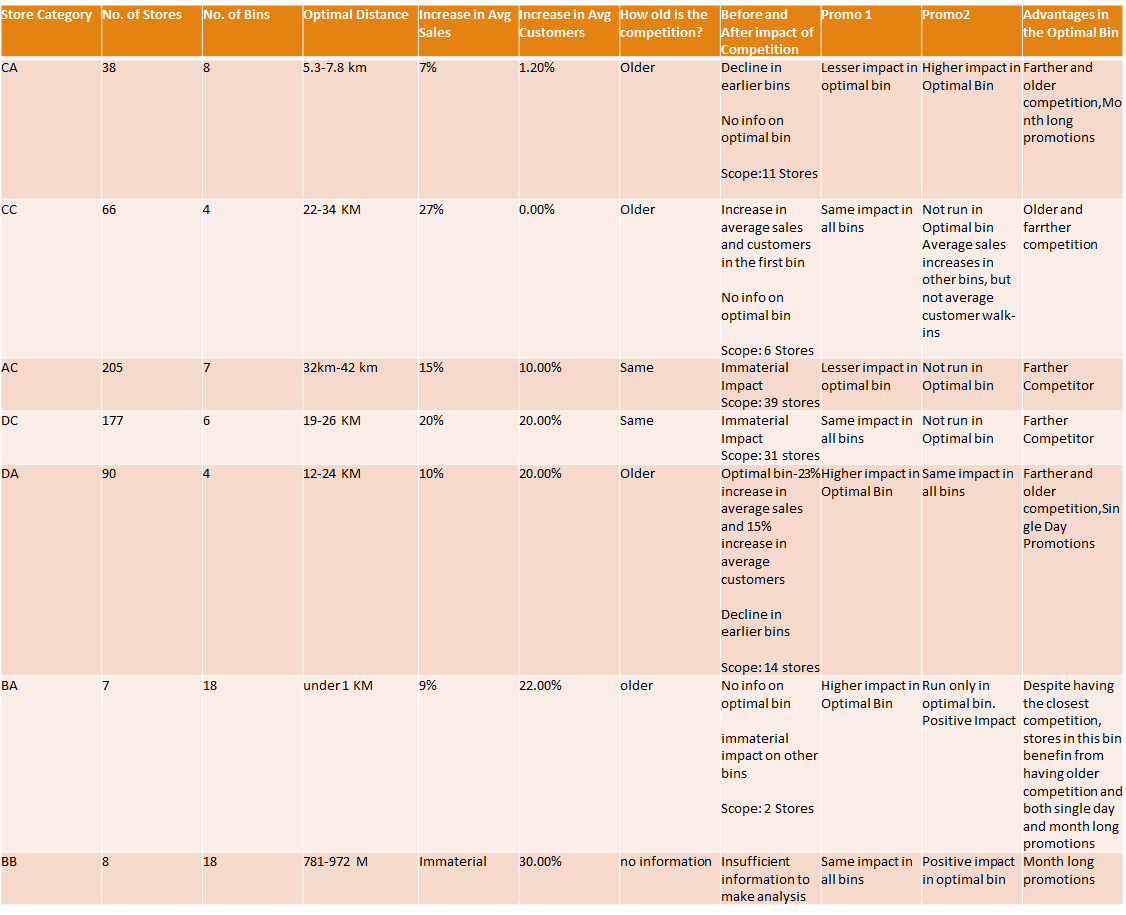





**Contents of this notebook**

**1.[Correlation-At the individual Store level](#corr_ind)**

**2.[Correlation-At Store Type level](#corr_type)**

**3.[Correlation-At Store Assortment level](#corr_asst)**

**4.[Correlation-At Store Category level](#corr_cat)**

**5.[Binning of Stores on the basis of Competition Distance](#comp_bin)**



**At the individual Store Level**
<a id='corr_ind'></a>



**At the individual Store level,there are no instances of material correlation between Competition distance/Total months since inception of Competition and average sales/walkins across all three years**

In [8]:
avg2013_sales=year1_data.groupby('Store')['Sales'].mean().reset_index()
avg2013_cust=year1_data.groupby('Store')['Customers'].mean().reset_index()
avg2014_sales=year2_data.groupby('Store')['Sales'].mean().reset_index()
avg2014_cust=year2_data.groupby('Store')['Customers'].mean().reset_index()
avg2015_sales=year3_data.groupby('Store')['Sales'].mean().reset_index()
avg2015_cust=year3_data.groupby('Store')['Customers'].mean().reset_index()
store_data['2013-Average Sales']=avg2013_sales['Sales']
store_data['2014-Average Sales']=avg2014_sales['Sales']
store_data['2015-Average Sales']=avg2015_sales['Sales']
store_data['2013-Average Customers']=avg2013_cust['Customers']
store_data['2014-Average Customers']=avg2014_cust['Customers']
store_data['2015-Average Customers']=avg2015_cust['Customers']
#933 out of 935 stores have available competition information
comp_data=store_data[store_data['CompetitionDistance']>0]
comp_data1=comp_data[['Store','CompetitionDistance','StoreType','Assortment','StoreType+Assortment','CompetitionOpenSinceMonth','CompetitionOpenSinceYear']]
comp_data1

Store  CompetitionDistance StoreType Assortment StoreType+Assortment  \
0        1               1270.0         c          a                   ca   
1        2                570.0         a          a                   aa   
2        3              14130.0         a          a                   aa   
3        4                620.0         c          c                   cc   
4        5              29910.0         a          a                   aa   
..     ...                  ...       ...        ...                  ...   
930   1111               1900.0         a          a                   aa   
931   1112               1880.0         c          c                   cc   
932   1113               9260.0         a          c                   ac   
933   1114                870.0         a          c                   ac   
934   1115               5350.0         d          c                   dc   

     CompetitionOpenSinceMonth  CompetitionOpenSinceYear  
0                          9.0                    2008.0  
1                         11.0                    2007.0  
2                         12.0                    2006.0  
3                          9.0                    2009.0  
4                          4.0                    2015.0  
..                         ...                       ...  
930                        6.0                    2014.0  
931                        4.0                    2006.0  
932                        0.0                       0.0  
933                        0.0                       0.0  
934                        0.0                       0.0  

[933 rows x 7 columns]

In [9]:
store_avg_2013=year1_data.groupby('Store')['Sales'].agg(['mean']).reset_index()
store_avg_2013.columns=['Store','Average Sales for 2013']
store_avg_cust_2013=year1_data.groupby('Store')['Customers'].agg(['mean']).reset_index()
store_avg_cust_2013.columns=['Store','Average Customer walkins for 2013']
store_avg_2013=store_avg_2013.merge(store_avg_cust_2013,on='Store',how='left')
comp_2013=comp_data1[comp_data1['CompetitionOpenSinceYear']<2014].merge(store_avg_2013,on='Store',how='left')
column_labels=['Store','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Average Sales for 2013','Average Customer walkins for 2013']

store_avg_2014=year2_data.groupby('Store')['Sales'].agg(['mean']).reset_index()
store_avg_2014.columns=['Store','Average Sales for 2014']
store_avg_cust_2014=year2_data.groupby('Store')['Customers'].agg(['mean']).reset_index()
store_avg_cust_2014.columns=['Store','Average Customer walkins for 2014']
store_avg_2014=store_avg_2014.merge(store_avg_cust_2014,on='Store',how='left')
comp_2014=comp_data1[comp_data1['CompetitionOpenSinceYear']<2015].merge(store_avg_2014,on='Store',how='left')
column_labels=['Store','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Average Sales for 2014','Average Customer walkins for 2014']

store_avg_2015=year3_data.groupby('Store')['Sales'].agg(['mean']).reset_index()
store_avg_2015.columns=['Store','Average Sales for 2015']
store_avg_cust_2015=year3_data.groupby('Store')['Customers'].agg(['mean']).reset_index()
store_avg_cust_2015.columns=['Store','Average Customer walkins for 2015']
store_avg_2015=store_avg_2015.merge(store_avg_cust_2015,on='Store',how='left')
comp_2015=comp_data1.merge(store_avg_2015,on='Store',how='left')
column_labels=['Store','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Average Sales for 2015','Average Customer walkins for 2015']


In [10]:
comp_data4=store_data[store_data['CompetitionOpenSinceMonth']>0]
comp_dup=comp_data4.drop_duplicates(subset=['Store'])['Store'].count()
print('There are '+str(comp_dup)+' stores out of the 933 stores with competition, that do not have information related inception of the competitive store')
comp_month=comp_data4['CompetitionOpenSinceMonth'].tolist()
comp_year=comp_data4['CompetitionOpenSinceYear'].tolist()
comp_day=[]
for i in range(636):
    x=1
    comp_day.append(x)
comp_df=pd.DataFrame({'year': comp_year,'month':comp_month,'day':comp_day})
comp_df['Date of Competition']=pd.to_datetime(comp_df)
comp_df=comp_df[['Date of Competition']]
dummy=comp_df['Date of Competition'].tolist()
dummy1=pd.DataFrame(dummy)
dummy1.columns=['Date of Inception of Competition']
inc_list=pd.DataFrame(comp_data4.drop_duplicates(subset=['Store'])['Store']).reset_index(drop=True)
inc_list
store_comp_inc=pd.concat([inc_list,dummy1],axis=1)
store_inc=comp_data4.drop_duplicates(subset=['Store'])['Store'].tolist()
comp_2013_d=comp_2013[comp_2013.Store.isin(store_inc)]
comp_2014_d=comp_2014[comp_2014.Store.isin(store_inc)]
comp_2015_d=comp_2015[comp_2015.Store.isin(store_inc)]
comp_2013_d=comp_2013_d.merge(store_comp_inc,on='Store',how='left')
comp_2014_d=comp_2014_d.merge(store_comp_inc,on='Store',how='left')
comp_2015_d=comp_2015_d.merge(store_comp_inc,on='Store',how='left')
column_labels2=['Store','Competition Distance','Competition open since Month','Competition open since Year', 'Average Sales for 2014', 'Average Customer walk-ins for 2014','Total Months Since Open']
column_labels3=['Store','Competition Distance','Competition open since Month','Competition open since Year', 'Average Sales for 2015', 'Average Customer walk-ins for 2015','Total Months Since Open']



There are 636 stores out of the 933 stores with competition, that do not have information related inception of the competitive store


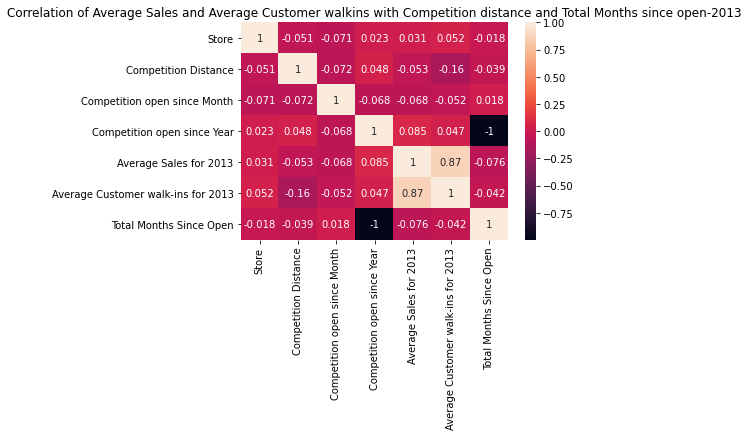

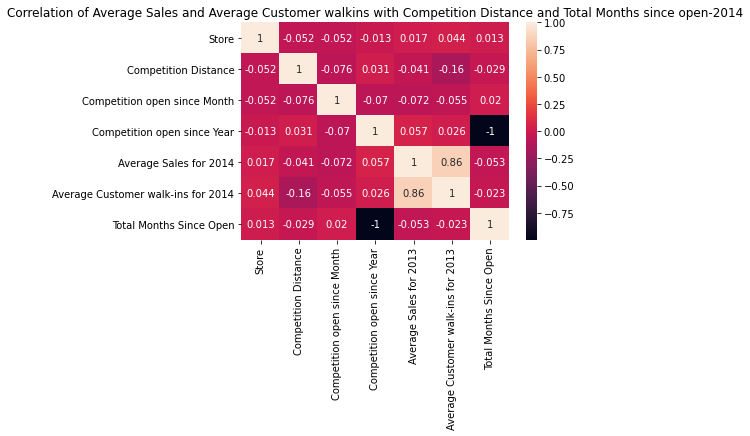

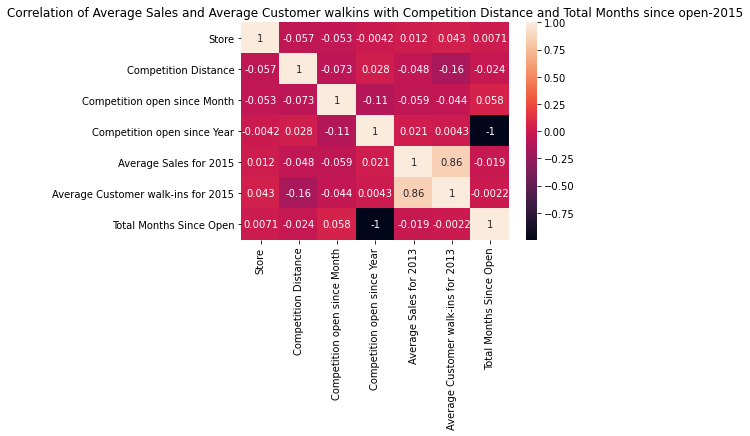

In [11]:
year_2013=[]
for i in range(544):
    x=2013
    year_2013.append(x)
year_2013
comp_2013_d['Year of Sale']=year_2013
comp_2013_d['Year of Sale']=pd.to_datetime(comp_2013_d['Year of Sale'],format='%Y')
comp_2013_d['totalMonthsSinceOpen']=comp_2013_d['Year of Sale']-comp_2013_d['Date of Inception of Competition']
comp_2013_d['totalMonthsSinceOpen']=comp_2013_d['totalMonthsSinceOpen']/np.timedelta64(1,'M')
comp_2013_d['totalMonthsSinceOpen']=comp_2013_d['totalMonthsSinceOpen'].astype(np.int64)
comp_2013_d.loc[comp_2013_d.totalMonthsSinceOpen<0,'totalMonthsSinceOpen']=0
column_labels1=['Store','Competition Distance','Competition open since Month','Competition open since Year','Average Sales for 2013','Average Customer walk-ins for 2013','Total Months Since Open']
corr4=np.array(comp_2013_d.corr())
sns.heatmap(corr4,annot=True,xticklabels=column_labels1,yticklabels=column_labels1)
plt.title('Correlation of Average Sales and Average Customer walkins with Competition distance and Total Months since open-2013')
plt.show()


year_2014=[]
for i in range(602):
    x=2014
    year_2014.append(x)
year_2014
comp_2014_d['Year of Sale']=year_2014
comp_2014_d['Year of Sale']=pd.to_datetime(comp_2014_d['Year of Sale'],format='%Y')
comp_2014_d['totalMonthsSinceOpen']=comp_2014_d['Year of Sale']-comp_2014_d['Date of Inception of Competition']
comp_2014_d['totalMonthsSinceOpen']=comp_2014_d['totalMonthsSinceOpen']/np.timedelta64(1,'M')
comp_2014_d['totalMonthsSinceOpen']=comp_2014_d['totalMonthsSinceOpen'].astype(np.int64)
comp_2014_d.loc[comp_2014_d.totalMonthsSinceOpen<0,'totalMonthsSinceOpen']=0
corr5=np.array(comp_2014_d.corr())
sns.heatmap(corr5,annot=True,xticklabels=column_labels1,yticklabels=column_labels2)
plt.title('Correlation of Average Sales and Average Customer walkins with Competition Distance and Total Months since open-2014')
plt.show()


year_2015=[]
for i in range(636):
    x=2015
    year_2015.append(x)
year_2015
comp_2015_d['Year of Sale']=year_2015
comp_2015_d['Year of Sale']=pd.to_datetime(comp_2015_d['Year of Sale'],format='%Y')
comp_2015_d['totalMonthsSinceOpen']=comp_2015_d['Year of Sale']-comp_2015_d['Date of Inception of Competition']
comp_2015_d['totalMonthsSinceOpen']=comp_2015_d['totalMonthsSinceOpen']/np.timedelta64(1,'M')
comp_2015_d['totalMonthsSinceOpen']=comp_2015_d['totalMonthsSinceOpen'].astype(np.int64)
comp_2015_d.loc[comp_2015_d.totalMonthsSinceOpen<0,'totalMonthsSinceOpen']=0
corr6=np.array(comp_2015_d.corr())
sns.heatmap(corr6,annot=True,xticklabels=column_labels1,yticklabels=column_labels3)
plt.title('Correlation of Average Sales and Average Customer walkins with Competition Distance and Total Months since open-2015')
plt.show()


**At Store type level**
<a id='corr_type'></a>


**At the Store type level,there are no instances of material correlation between Competition distance/Total months since inception of Competition and average sales/walkins across all three years**

In [12]:
avg_2013=pd.DataFrame(year1_data.groupby('Store')['Sales'].mean().reset_index())
avg_2014=pd.DataFrame(year2_data.groupby('Store')['Sales'].mean().reset_index())
avg_2015=pd.DataFrame(year3_data.groupby('Store')['Sales'].mean().reset_index())
store_data['2013-Average Sales']=avg_2013['Sales']
store_data['2014-Average Sales']=avg_2014['Sales']
store_data['2015-Average Sales']=avg_2015['Sales']

avg_2013_cust=pd.DataFrame(year1_data.groupby('Store')['Customers'].mean().reset_index())
avg_2014_cust=pd.DataFrame(year2_data.groupby('Store')['Customers'].mean().reset_index())
avg_2015_cust=pd.DataFrame(year3_data.groupby('Store')['Customers'].mean().reset_index())
store_data['2013-Average Customers']=avg_2013_cust['Customers']
store_data['2014-Average Customers']=avg_2014_cust['Customers']
store_data['2015-Average Customers']=avg_2015_cust['Customers']

corr_analysis=store_data[['Store','StoreType','StoreType+Assortment','Assortment','2013-Average Sales','2014-Average Sales','2015-Average Sales','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','2013-Average Customers','2014-Average Customers','2015-Average Customers']]


In [13]:
a_comp_2013_d=comp_2013_d[comp_2013_d['StoreType']=='a']
b_comp_2013_d=comp_2013_d[comp_2013_d['StoreType']=='b']
c_comp_2013_d=comp_2013_d[comp_2013_d['StoreType']=='c']
d_comp_2013_d=comp_2013_d[comp_2013_d['StoreType']=='d']


a_comp_2014_d=comp_2014_d[comp_2014_d['StoreType']=='a']
b_comp_2014_d=comp_2014_d[comp_2014_d['StoreType']=='b']
c_comp_2014_d=comp_2014_d[comp_2014_d['StoreType']=='c']
d_comp_2014_d=comp_2014_d[comp_2014_d['StoreType']=='d']


a_comp_2015_d=comp_2015_d[comp_2015_d['StoreType']=='a']
b_comp_2015_d=comp_2015_d[comp_2015_d['StoreType']=='b']
c_comp_2015_d=comp_2015_d[comp_2015_d['StoreType']=='c']
d_comp_2015_d=comp_2015_d[comp_2015_d['StoreType']=='d']


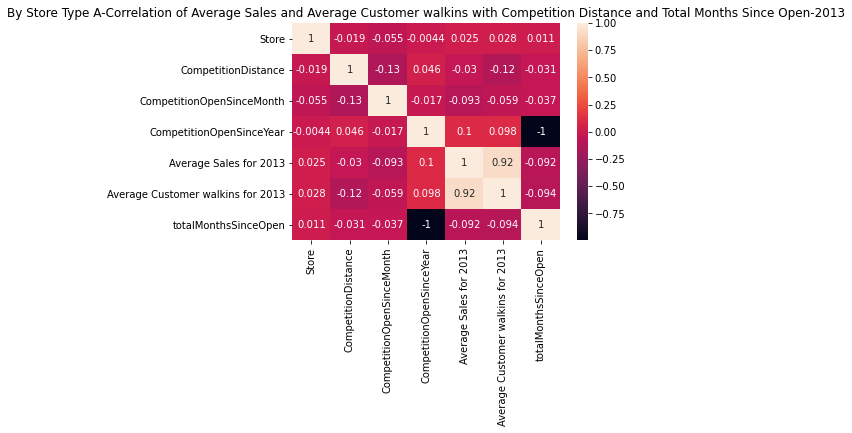

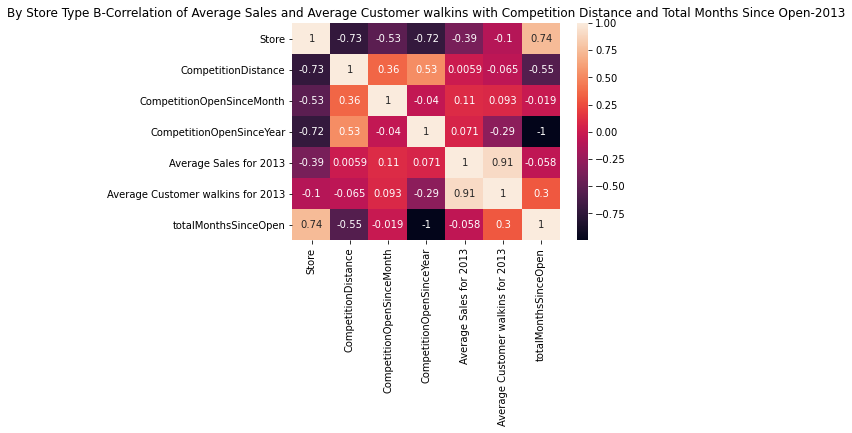

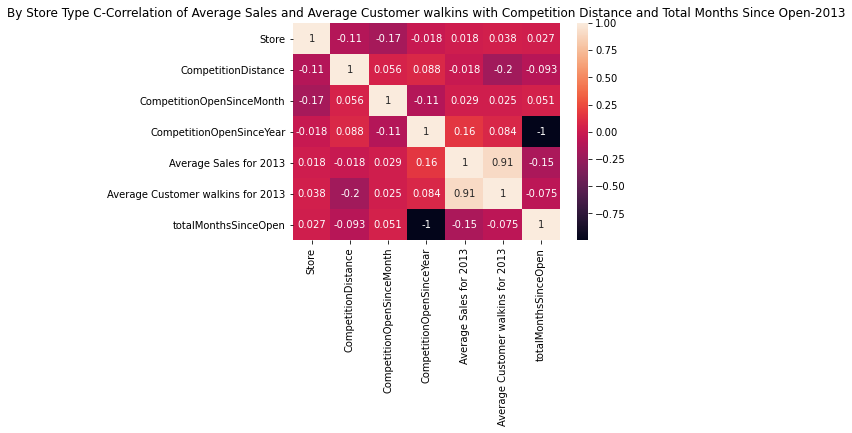

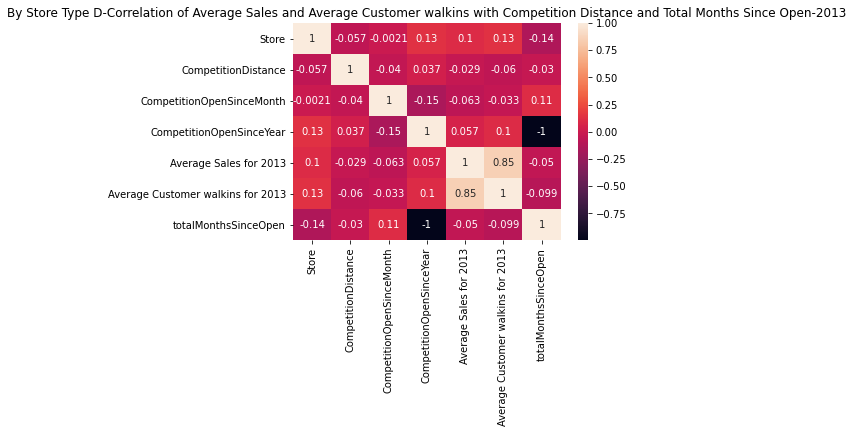

In [14]:
corr_labels1=['Store','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Average Sales for 2013','Average Customer walkins for 2013','totalMonthsSinceOpen']
corr_a=np.array(a_comp_2013_d.corr())
sns.heatmap(corr_a,annot=True,xticklabels=corr_labels1,yticklabels=corr_labels1)
plt.title('By Store Type A-Correlation of Average Sales and Average Customer walkins with Competition Distance and Total Months Since Open-2013')
plt.show()

corr_b=np.array(b_comp_2013_d.corr())
sns.heatmap(corr_b,annot=True,xticklabels=corr_labels1,yticklabels=corr_labels1)
plt.title('By Store Type B-Correlation of Average Sales and Average Customer walkins with Competition Distance and Total Months Since Open-2013')
plt.show()

corr_c=np.array(c_comp_2013_d.corr())
sns.heatmap(corr_c,annot=True,xticklabels=corr_labels1,yticklabels=corr_labels1)
plt.title('By Store Type C-Correlation of Average Sales and Average Customer walkins with Competition Distance and Total Months Since Open-2013')
plt.show()

corr_d=np.array(d_comp_2013_d.corr())
sns.heatmap(corr_d,annot=True,xticklabels=corr_labels1,yticklabels=corr_labels1)
plt.title('By Store Type D-Correlation of Average Sales and Average Customer walkins with Competition Distance and Total Months Since Open-2013')
plt.show()


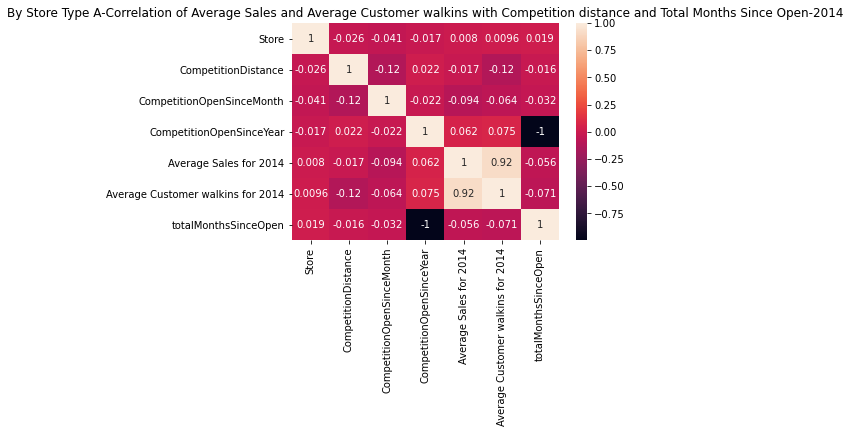

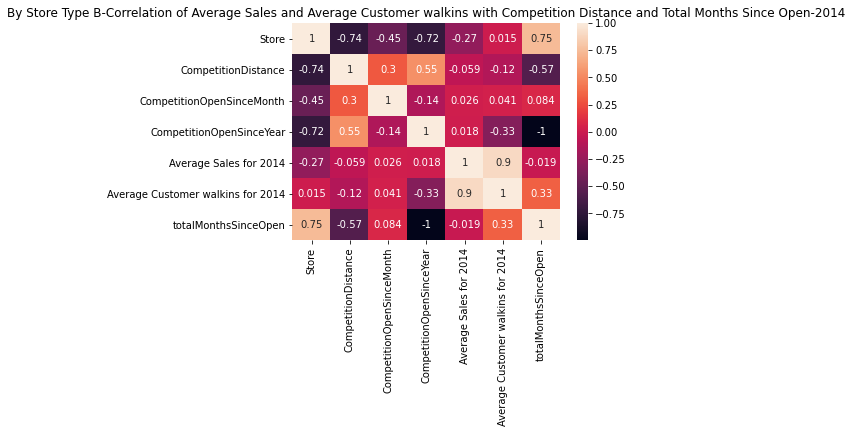

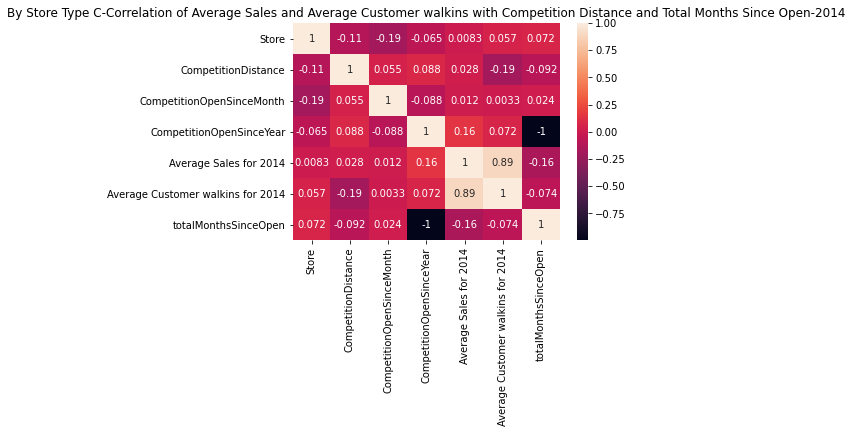

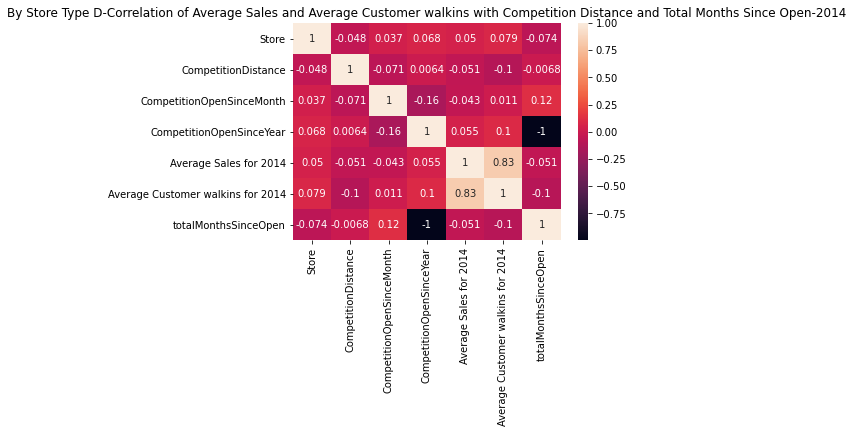

In [15]:
corr_labels2=['Store','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Average Sales for 2014','Average Customer walkins for 2014','totalMonthsSinceOpen']
corr_e=np.array(a_comp_2014_d.corr())
sns.heatmap(corr_e,annot=True,xticklabels=corr_labels2,yticklabels=corr_labels2)
plt.title('By Store Type A-Correlation of Average Sales and Average Customer walkins with Competition distance and Total Months Since Open-2014')
plt.show()

corr_f=np.array(b_comp_2014_d.corr())
sns.heatmap(corr_f,annot=True,xticklabels=corr_labels2,yticklabels=corr_labels2)
plt.title('By Store Type B-Correlation of Average Sales and Average Customer walkins with Competition Distance and Total Months Since Open-2014')
plt.show()

corr_g=np.array(c_comp_2014_d.corr())
sns.heatmap(corr_g,annot=True,xticklabels=corr_labels2,yticklabels=corr_labels2)
plt.title('By Store Type C-Correlation of Average Sales and Average Customer walkins with Competition Distance and Total Months Since Open-2014')
plt.show()

corr_h=np.array(d_comp_2014_d.corr())
sns.heatmap(corr_h,annot=True,xticklabels=corr_labels2,yticklabels=corr_labels2)
plt.title('By Store Type D-Correlation of Average Sales and Average Customer walkins with Competition Distance and Total Months Since Open-2014')
plt.show()


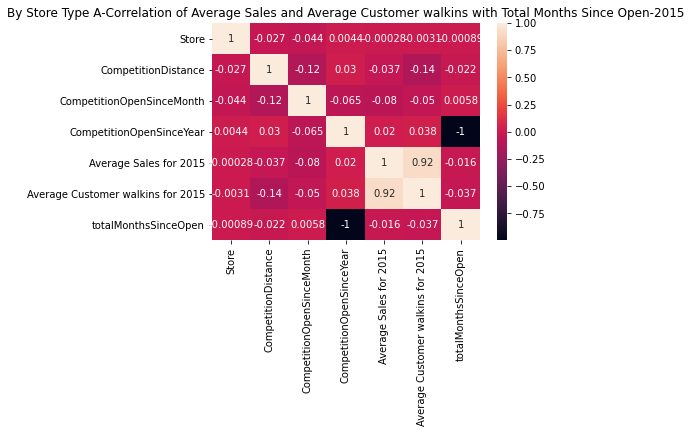

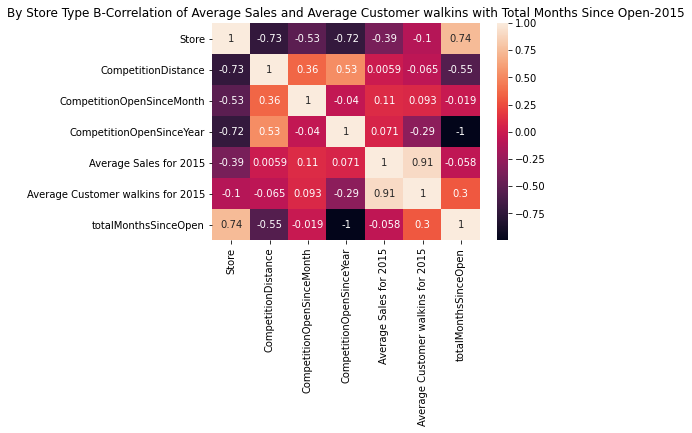

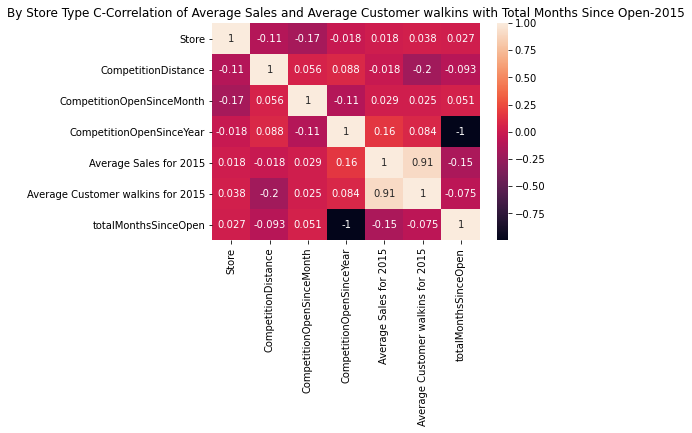

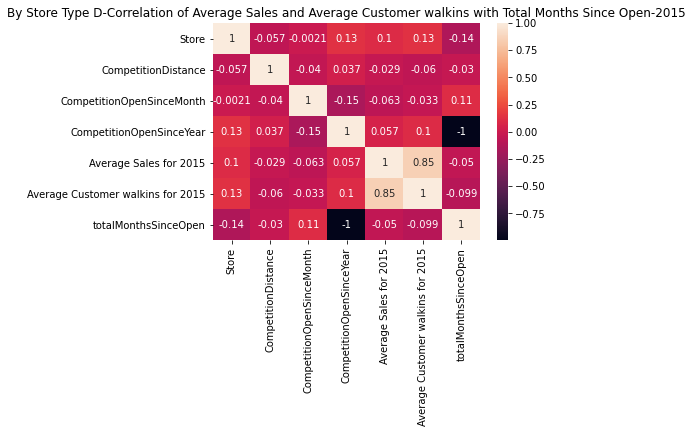

In [16]:
corr_labels3=['Store','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Average Sales for 2015','Average Customer walkins for 2015','totalMonthsSinceOpen']
corr_i=np.array(a_comp_2015_d.corr())
sns.heatmap(corr_i,annot=True,xticklabels=corr_labels3,yticklabels=corr_labels3)
plt.title('By Store Type A-Correlation of Average Sales and Average Customer walkins with Total Months Since Open-2015')
plt.show()

corr_j=np.array(b_comp_2013_d.corr())
sns.heatmap(corr_j,annot=True,xticklabels=corr_labels3,yticklabels=corr_labels3)
plt.title('By Store Type B-Correlation of Average Sales and Average Customer walkins with Total Months Since Open-2015')
plt.show()

corr_k=np.array(c_comp_2013_d.corr())
sns.heatmap(corr_k,annot=True,xticklabels=corr_labels3,yticklabels=corr_labels3)
plt.title('By Store Type C-Correlation of Average Sales and Average Customer walkins with Total Months Since Open-2015')
plt.show()

corr_l=np.array(d_comp_2013_d.corr())
sns.heatmap(corr_l,annot=True,xticklabels=corr_labels3,yticklabels=corr_labels3)
plt.title('By Store Type D-Correlation of Average Sales and Average Customer walkins with Total Months Since Open-2015')
plt.show()


**At Store Assortment level**
<a id='corr_asst'></a>


**A material negative correlation has been indentified between Competition Distance/Total Months since inception of Competition and Average Sales/Average Customers for all three yearsAssortment B stores -**

**This is counter intuitive and most likely a spurious correlation**

In [17]:
a_comp_2013_asst=comp_2013_d[comp_2013_d['Assortment']=='a']
b_comp_2013_asst=comp_2013_d[comp_2013_d['Assortment']=='b']
c_comp_2013_asst=comp_2013_d[comp_2013_d['Assortment']=='c']


a_comp_2014_asst=comp_2014_d[comp_2014_d['Assortment']=='a']
b_comp_2014_asst=comp_2014_d[comp_2014_d['Assortment']=='b']
c_comp_2014_asst=comp_2014_d[comp_2014_d['Assortment']=='c']


a_comp_2015_asst=comp_2015_d[comp_2015_d['Assortment']=='a']
b_comp_2015_asst=comp_2015_d[comp_2015_d['Assortment']=='b']
c_comp_2015_asst=comp_2015_d[comp_2015_d['Assortment']=='c']


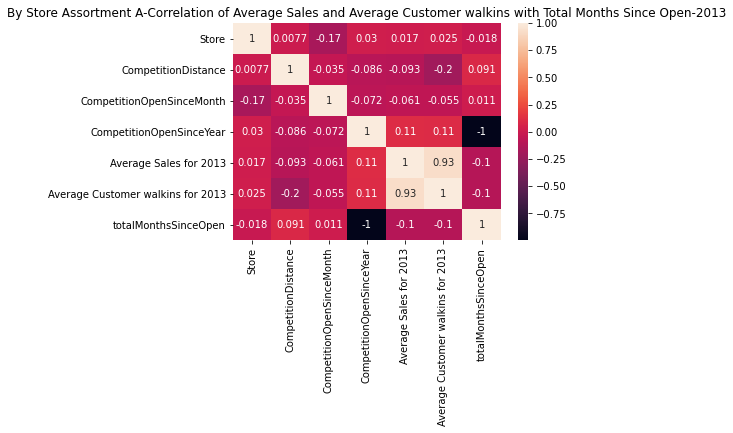

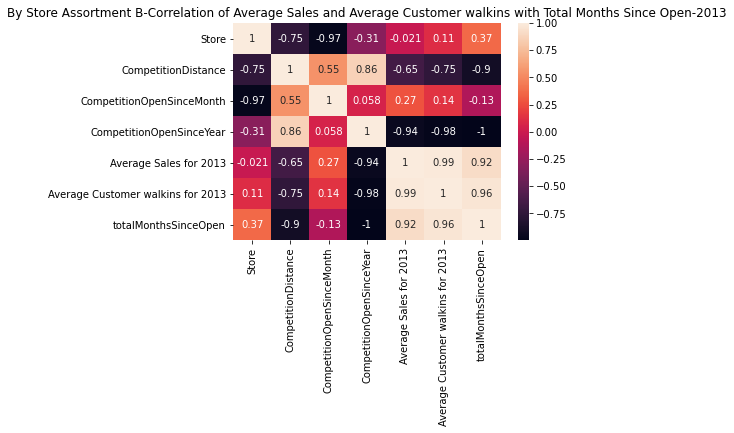

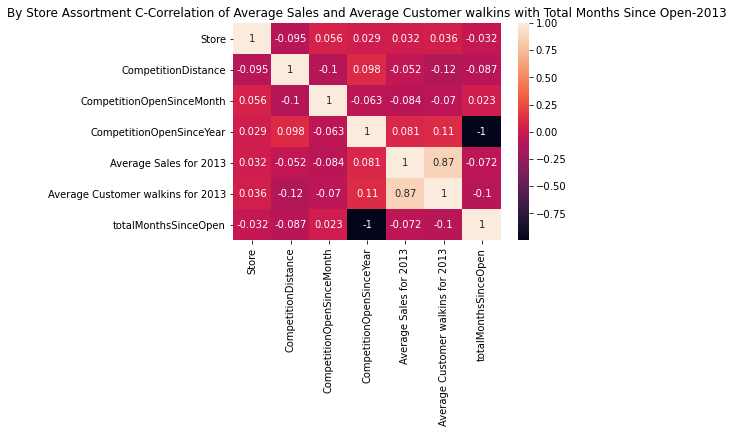

In [18]:
corr64=np.array(a_comp_2013_asst.corr())
sns.heatmap(corr64,annot=True,xticklabels=corr_labels1,yticklabels=corr_labels1)
plt.title('By Store Assortment A-Correlation of Average Sales and Average Customer walkins with Total Months Since Open-2013')
plt.show()


corr65=np.array(b_comp_2013_asst.corr())
sns.heatmap(corr65,annot=True,xticklabels=corr_labels1,yticklabels=corr_labels1)
plt.title('By Store Assortment B-Correlation of Average Sales and Average Customer walkins with Total Months Since Open-2013')
plt.show()


corr66=np.array(c_comp_2013_asst.corr())
sns.heatmap(corr66,annot=True,xticklabels=corr_labels1,yticklabels=corr_labels1)
plt.title('By Store Assortment C-Correlation of Average Sales and Average Customer walkins with Total Months Since Open-2013')
plt.show()


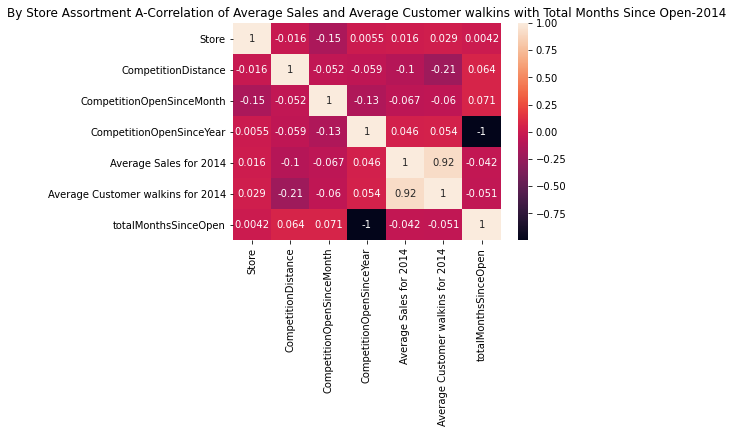

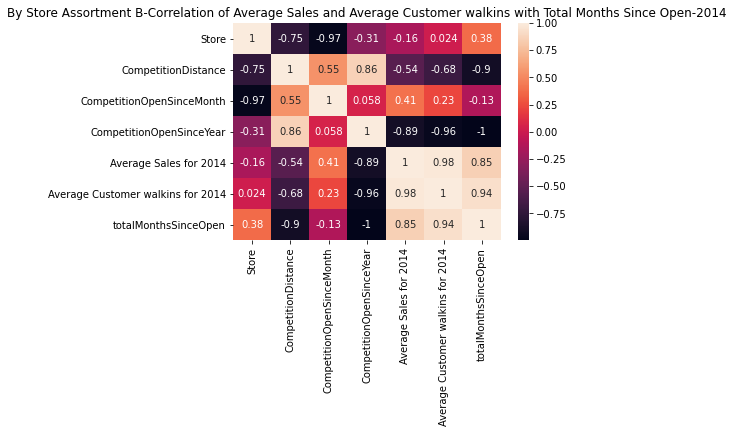

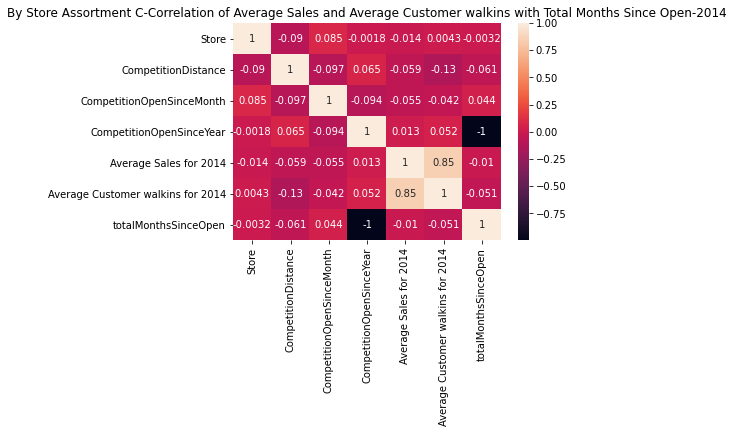

In [19]:
corr67=np.array(a_comp_2015_asst.corr())
sns.heatmap(corr67,annot=True,xticklabels=corr_labels2,yticklabels=corr_labels2)
plt.title('By Store Assortment A-Correlation of Average Sales and Average Customer walkins with Total Months Since Open-2014')
plt.show()


corr68=np.array(b_comp_2015_asst.corr())
sns.heatmap(corr68,annot=True,xticklabels=corr_labels2,yticklabels=corr_labels2)
plt.title('By Store Assortment B-Correlation of Average Sales and Average Customer walkins with Total Months Since Open-2014')
plt.show()


corr69=np.array(c_comp_2015_asst.corr())
sns.heatmap(corr69,annot=True,xticklabels=corr_labels2,yticklabels=corr_labels2)
plt.title('By Store Assortment C-Correlation of Average Sales and Average Customer walkins with Total Months Since Open-2014')
plt.show()

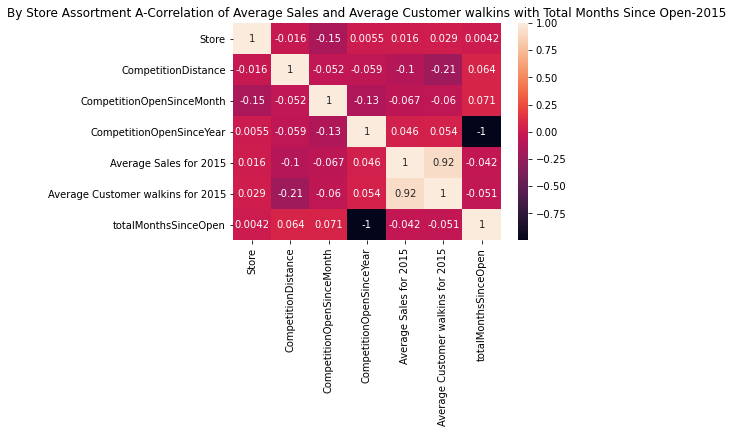

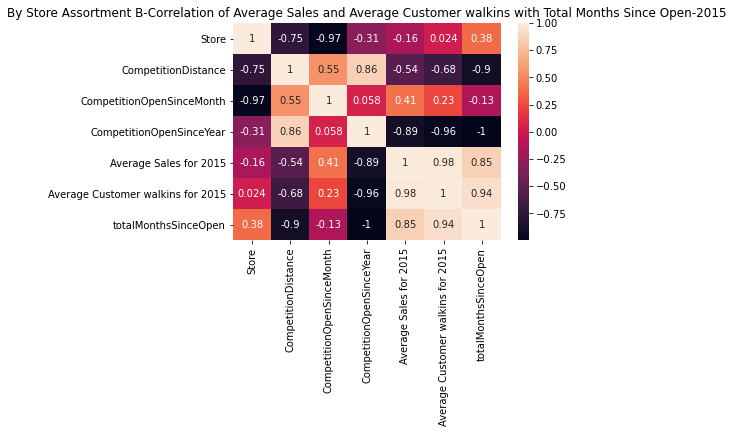

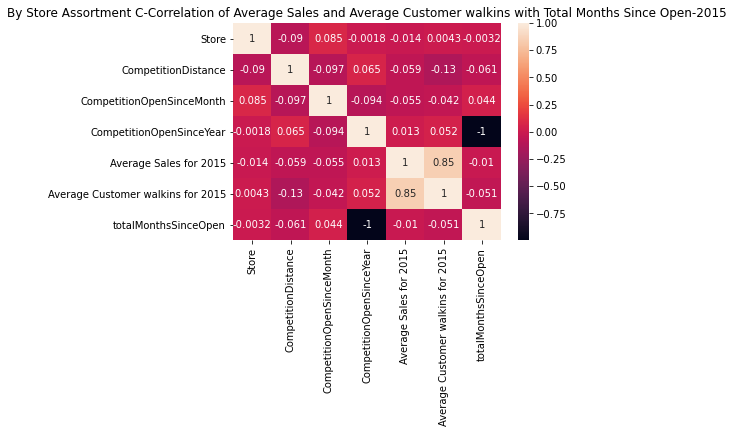

In [20]:
corr70=np.array(a_comp_2015_asst.corr())
sns.heatmap(corr70,annot=True,xticklabels=corr_labels3,yticklabels=corr_labels3)
plt.title('By Store Assortment A-Correlation of Average Sales and Average Customer walkins with Total Months Since Open-2015')
plt.show()


corr71=np.array(b_comp_2015_asst.corr())
sns.heatmap(corr71,annot=True,xticklabels=corr_labels3,yticklabels=corr_labels3)
plt.title('By Store Assortment B-Correlation of Average Sales and Average Customer walkins with Total Months Since Open-2015')
plt.show()


corr72=np.array(c_comp_2015_asst.corr())
sns.heatmap(corr72,annot=True,xticklabels=corr_labels3,yticklabels=corr_labels3)
plt.title('By Store Assortment C-Correlation of Average Sales and Average Customer walkins with Total Months Since Open-2015')
plt.show()

**At Store Category Level**
<a id='corr_cat'></a>


**Category BB-There is a material positive correlation between Competition Distance/Months since inception of competition and average sales/average customers for all years**

**Category BA-There is a material positive correlation in 2013**

**This is counter intuitive and most likely a spurious correlation**

In [21]:
ca_comp_2013=comp_2013_d[comp_2013_d['StoreType+Assortment']=='ca']
aa_comp_2013=comp_2013_d[comp_2013_d['StoreType+Assortment']=='aa']
cc_comp_2013=comp_2013_d[comp_2013_d['StoreType+Assortment']=='cc']
ac_comp_2013=comp_2013_d[comp_2013_d['StoreType+Assortment']=='ac']
dc_comp_2013=comp_2013_d[comp_2013_d['StoreType+Assortment']=='dc']
da_comp_2013=comp_2013_d[comp_2013_d['StoreType+Assortment']=='da']
ba_comp_2013=comp_2013_d[comp_2013_d['StoreType+Assortment']=='ba']
bb_comp_2013=comp_2013_d[comp_2013_d['StoreType+Assortment']=='bb']
bc_comp_2013=comp_2013_d[comp_2013_d['StoreType+Assortment']=='bc']


ca_comp_2014=comp_2014_d[comp_2014_d['StoreType+Assortment']=='ca']
aa_comp_2014=comp_2014_d[comp_2014_d['StoreType+Assortment']=='aa']
cc_comp_2014=comp_2014_d[comp_2014_d['StoreType+Assortment']=='cc']
ac_comp_2014=comp_2014_d[comp_2014_d['StoreType+Assortment']=='ac']
dc_comp_2014=comp_2014_d[comp_2014_d['StoreType+Assortment']=='dc']
da_comp_2014=comp_2014_d[comp_2014_d['StoreType+Assortment']=='da']
ba_comp_2014=comp_2014_d[comp_2014_d['StoreType+Assortment']=='ba']
bb_comp_2014=comp_2014_d[comp_2014_d['StoreType+Assortment']=='bb']
bc_comp_2014=comp_2014_d[comp_2014_d['StoreType+Assortment']=='bc']


ca_comp_2015=comp_2015_d[comp_2015_d['StoreType+Assortment']=='ca']
aa_comp_2015=comp_2015_d[comp_2015_d['StoreType+Assortment']=='aa']
cc_comp_2015=comp_2015_d[comp_2015_d['StoreType+Assortment']=='cc']
ac_comp_2015=comp_2015_d[comp_2015_d['StoreType+Assortment']=='ac']
dc_comp_2015=comp_2015_d[comp_2015_d['StoreType+Assortment']=='dc']
da_comp_2015=comp_2015_d[comp_2015_d['StoreType+Assortment']=='da']
ba_comp_2015=comp_2015_d[comp_2015_d['StoreType+Assortment']=='ba']
bb_comp_2015=comp_2015_d[comp_2015_d['StoreType+Assortment']=='bb']
bc_comp_2015=comp_2015_d[comp_2015_d['StoreType+Assortment']=='bc']




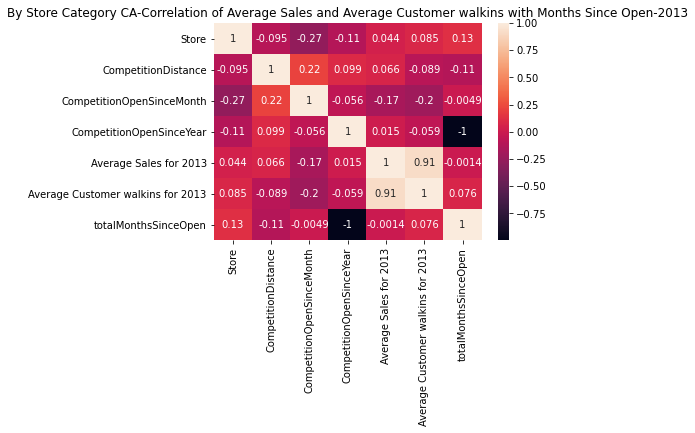

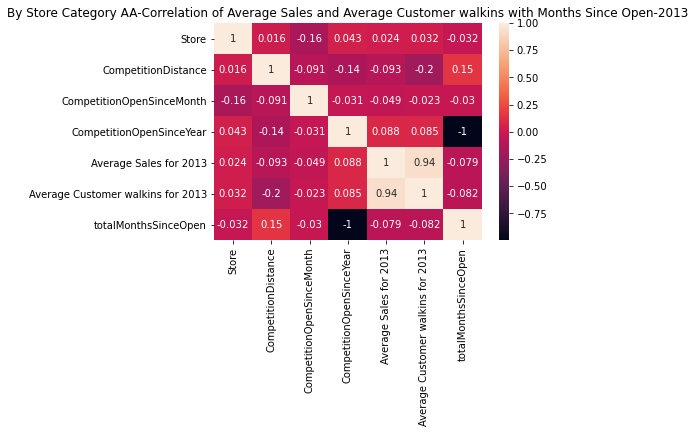

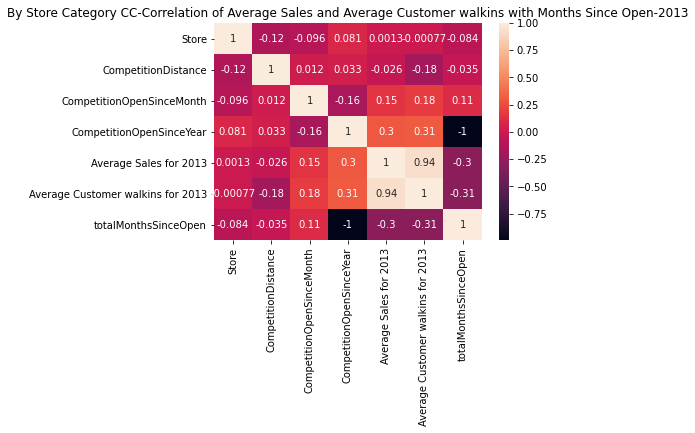

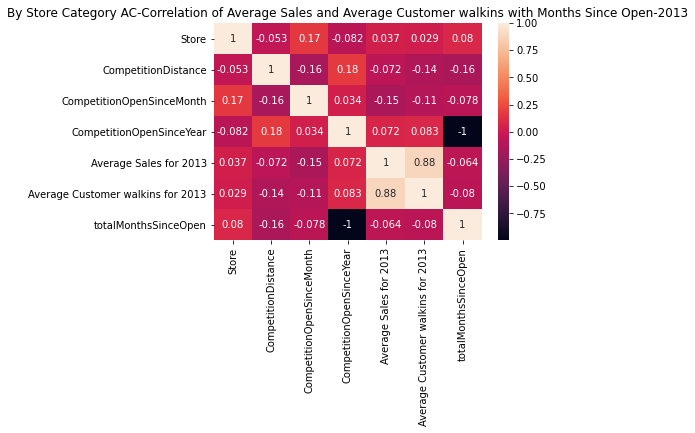

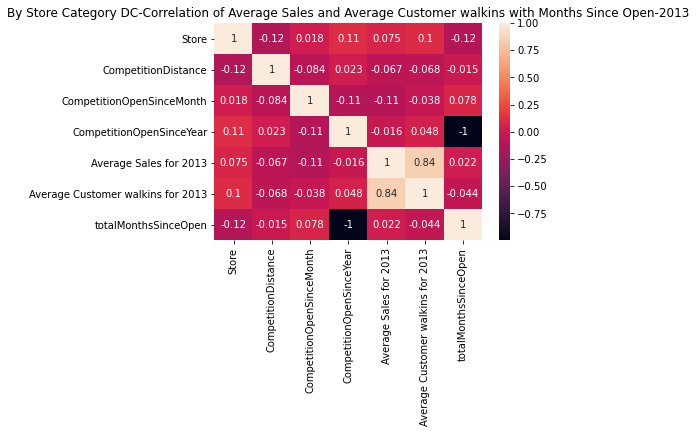

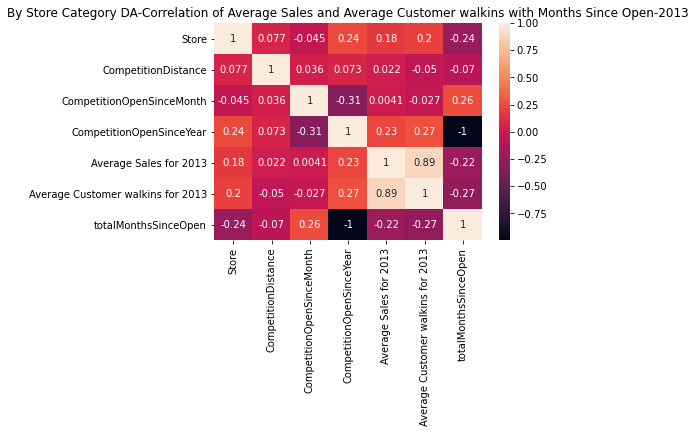

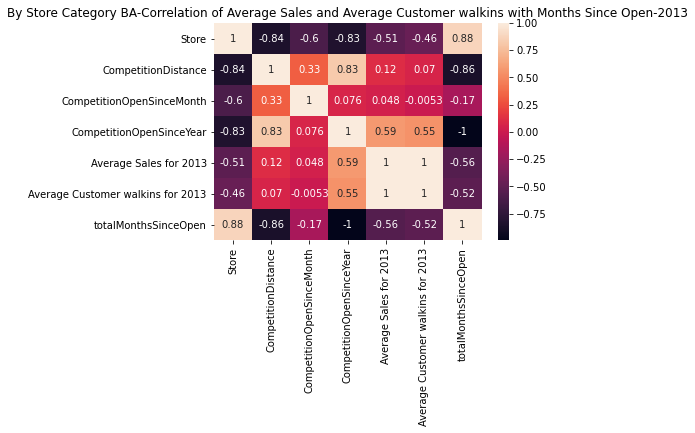

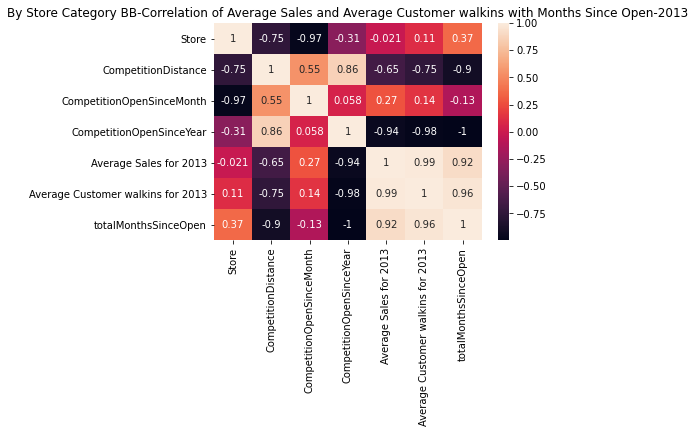

C:\Users\mural\anaconda3\lib\site-packages\seaborn\matrix.py:204: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\mural\anaconda3\lib\site-packages\seaborn\matrix.py:209: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


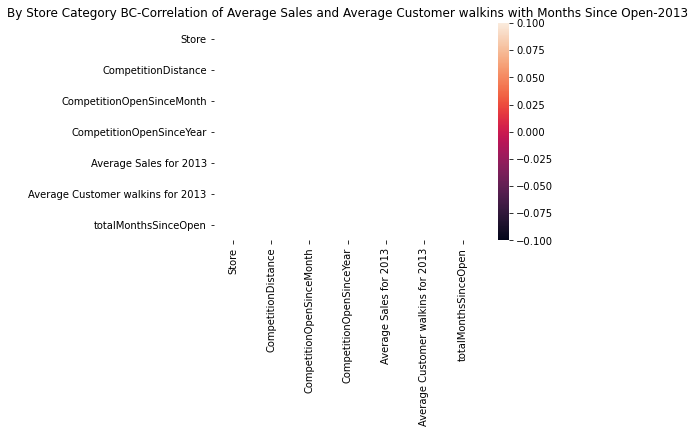

In [22]:
corr73=np.array(ca_comp_2013.corr())
sns.heatmap(corr73,annot=True,xticklabels=corr_labels1,yticklabels=corr_labels1)
plt.title('By Store Category CA-Correlation of Average Sales and Average Customer walkins with Months Since Open-2013')
plt.show()


corr74=np.array(aa_comp_2013.corr())
sns.heatmap(corr74,annot=True,xticklabels=corr_labels1,yticklabels=corr_labels1)
plt.title('By Store Category AA-Correlation of Average Sales and Average Customer walkins with Months Since Open-2013')
plt.show()


corr75=np.array(cc_comp_2013.corr())
sns.heatmap(corr75,annot=True,xticklabels=corr_labels1,yticklabels=corr_labels1)
plt.title('By Store Category CC-Correlation of Average Sales and Average Customer walkins with Months Since Open-2013')
plt.show()


corr76=np.array(ac_comp_2013.corr())
sns.heatmap(corr76,annot=True,xticklabels=corr_labels1,yticklabels=corr_labels1)
plt.title('By Store Category AC-Correlation of Average Sales and Average Customer walkins with Months Since Open-2013')
plt.show()


corr77=np.array(dc_comp_2013.corr())
sns.heatmap(corr77,annot=True,xticklabels=corr_labels1,yticklabels=corr_labels1)
plt.title('By Store Category DC-Correlation of Average Sales and Average Customer walkins with Months Since Open-2013')
plt.show()


corr78=np.array(da_comp_2013.corr())
sns.heatmap(corr78,annot=True,xticklabels=corr_labels1,yticklabels=corr_labels1)
plt.title('By Store Category DA-Correlation of Average Sales and Average Customer walkins with Months Since Open-2013')
plt.show()


corr79=np.array(ba_comp_2013.corr())
sns.heatmap(corr79,annot=True,xticklabels=corr_labels1,yticklabels=corr_labels1)
plt.title('By Store Category BA-Correlation of Average Sales and Average Customer walkins with Months Since Open-2013')
plt.show()


corr80=np.array(bb_comp_2013.corr())
sns.heatmap(corr80,annot=True,xticklabels=corr_labels1,yticklabels=corr_labels1)
plt.title('By Store Category BB-Correlation of Average Sales and Average Customer walkins with Months Since Open-2013')
plt.show()


corr81=np.array(bc_comp_2013.corr())
sns.heatmap(corr81,annot=True,xticklabels=corr_labels1,yticklabels=corr_labels1)
plt.title('By Store Category BC-Correlation of Average Sales and Average Customer walkins with Months Since Open-2013')
plt.show()


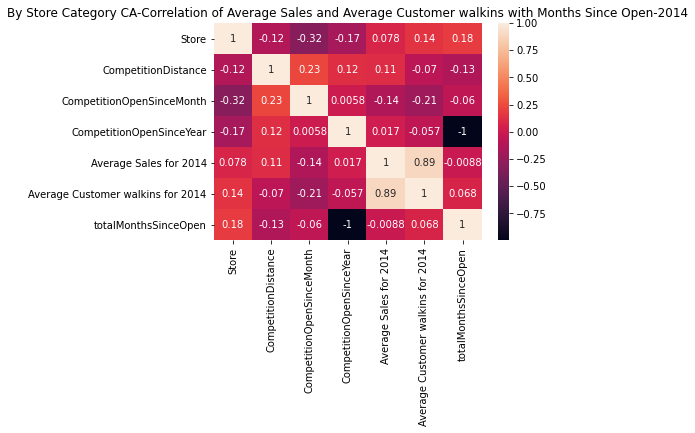

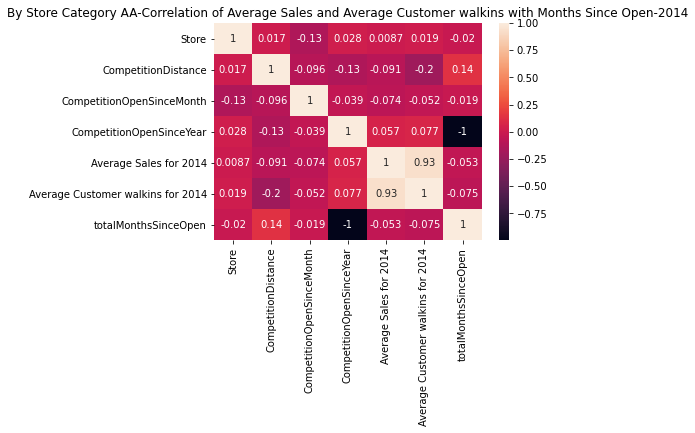

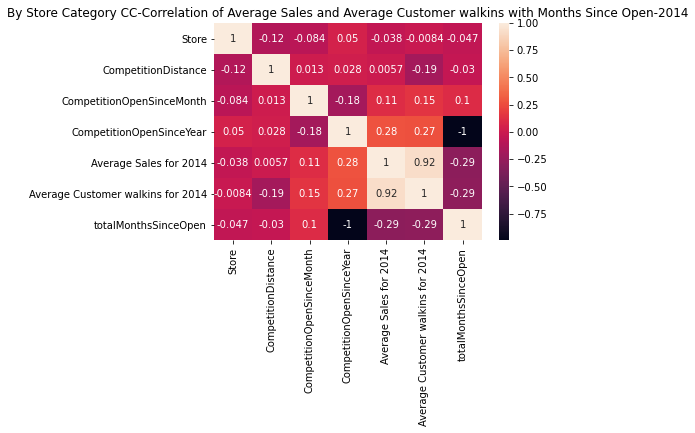

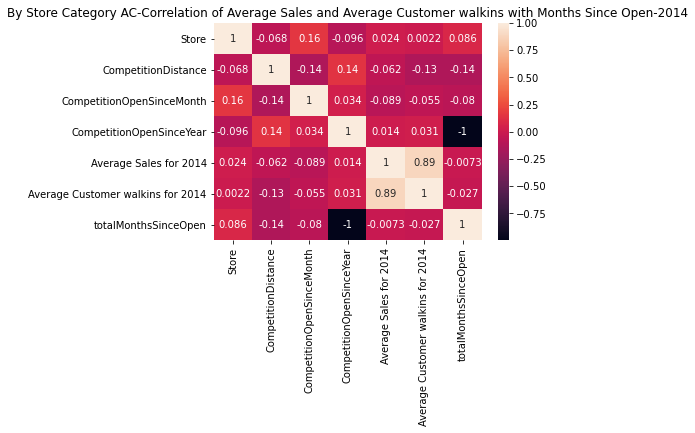

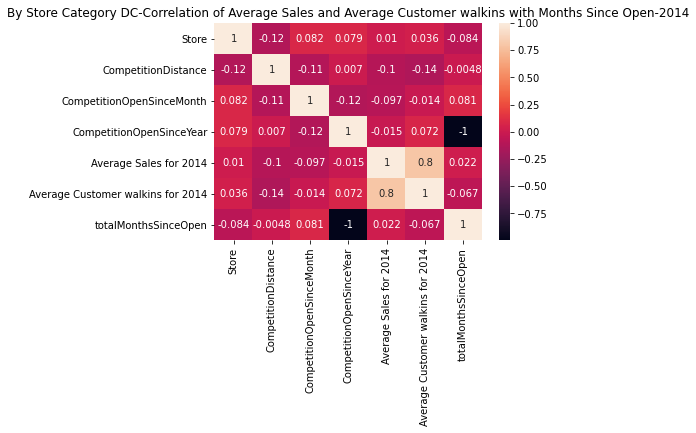

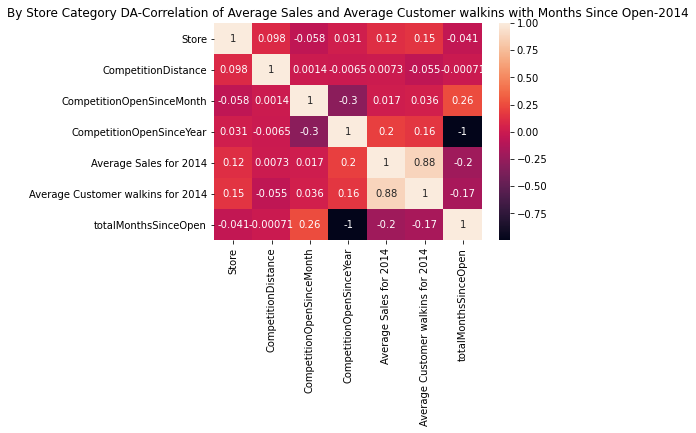

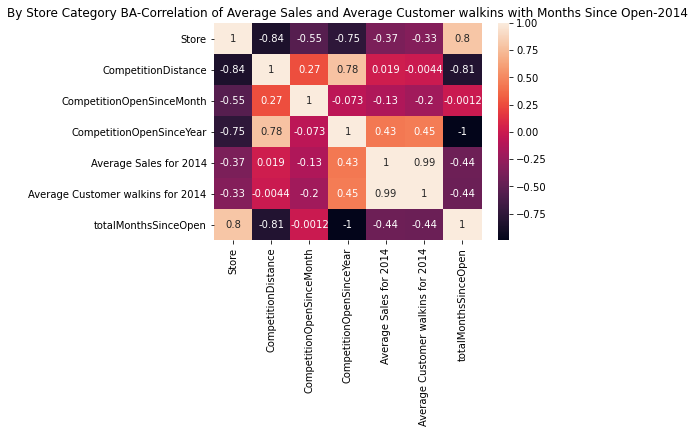

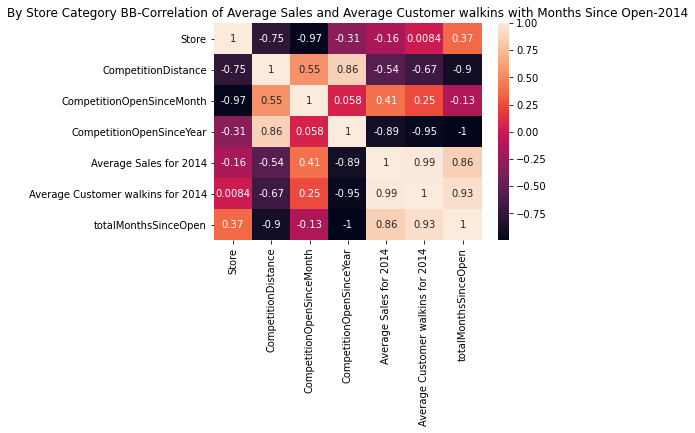

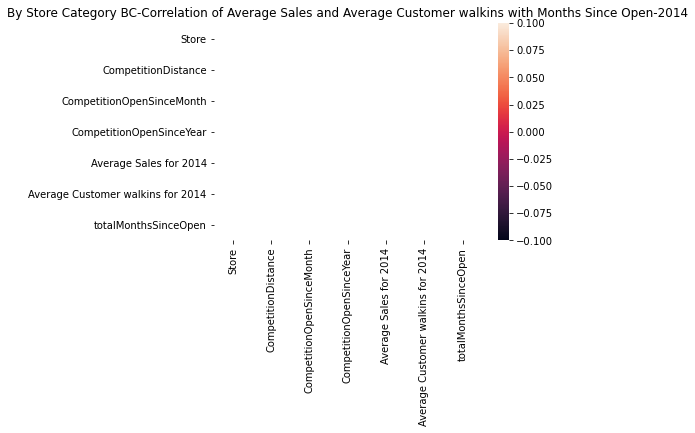

In [23]:
corr82=np.array(ca_comp_2014.corr())
sns.heatmap(corr82,annot=True,xticklabels=corr_labels2,yticklabels=corr_labels2)
plt.title('By Store Category CA-Correlation of Average Sales and Average Customer walkins with Months Since Open-2014')
plt.show()


corr83=np.array(aa_comp_2014.corr())
sns.heatmap(corr83,annot=True,xticklabels=corr_labels2,yticklabels=corr_labels2)
plt.title('By Store Category AA-Correlation of Average Sales and Average Customer walkins with Months Since Open-2014')
plt.show()


corr84=np.array(cc_comp_2014.corr())
sns.heatmap(corr84,annot=True,xticklabels=corr_labels2,yticklabels=corr_labels2)
plt.title('By Store Category CC-Correlation of Average Sales and Average Customer walkins with Months Since Open-2014')
plt.show()


corr85=np.array(ac_comp_2014.corr())
sns.heatmap(corr85,annot=True,xticklabels=corr_labels2,yticklabels=corr_labels2)
plt.title('By Store Category AC-Correlation of Average Sales and Average Customer walkins with Months Since Open-2014')
plt.show()


corr86=np.array(dc_comp_2014.corr())
sns.heatmap(corr86,annot=True,xticklabels=corr_labels2,yticklabels=corr_labels2)
plt.title('By Store Category DC-Correlation of Average Sales and Average Customer walkins with Months Since Open-2014')
plt.show()


corr87=np.array(da_comp_2014.corr())
sns.heatmap(corr87,annot=True,xticklabels=corr_labels2,yticklabels=corr_labels2)
plt.title('By Store Category DA-Correlation of Average Sales and Average Customer walkins with Months Since Open-2014')
plt.show()


corr88=np.array(ba_comp_2014.corr())
sns.heatmap(corr88,annot=True,xticklabels=corr_labels2,yticklabels=corr_labels2)
plt.title('By Store Category BA-Correlation of Average Sales and Average Customer walkins with Months Since Open-2014')
plt.show()


corr89=np.array(bb_comp_2014.corr())
sns.heatmap(corr89,annot=True,xticklabels=corr_labels2,yticklabels=corr_labels2)
plt.title('By Store Category BB-Correlation of Average Sales and Average Customer walkins with Months Since Open-2014')
plt.show()


corr90=np.array(bc_comp_2014.corr())
sns.heatmap(corr90,annot=True,xticklabels=corr_labels2,yticklabels=corr_labels2)
plt.title('By Store Category BC-Correlation of Average Sales and Average Customer walkins with Months Since Open-2014')
plt.show()


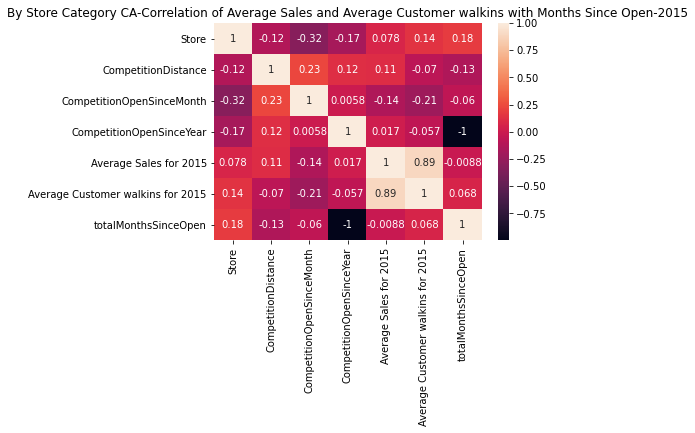

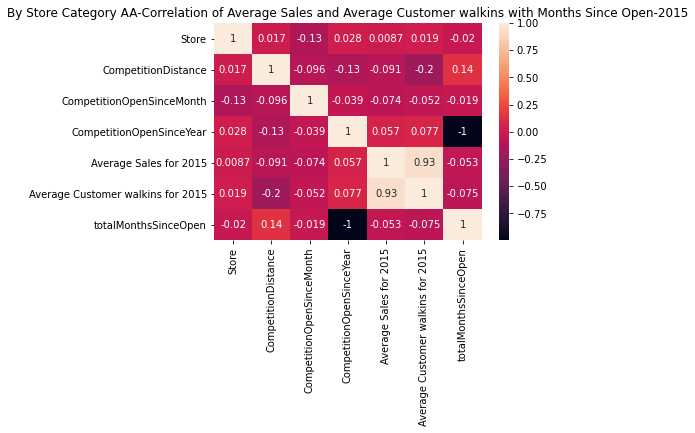

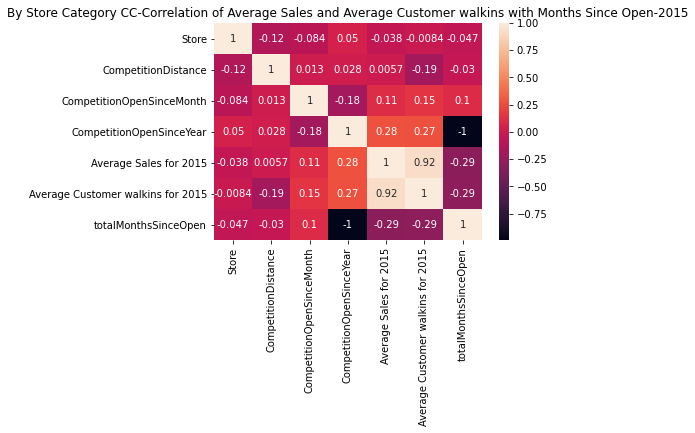

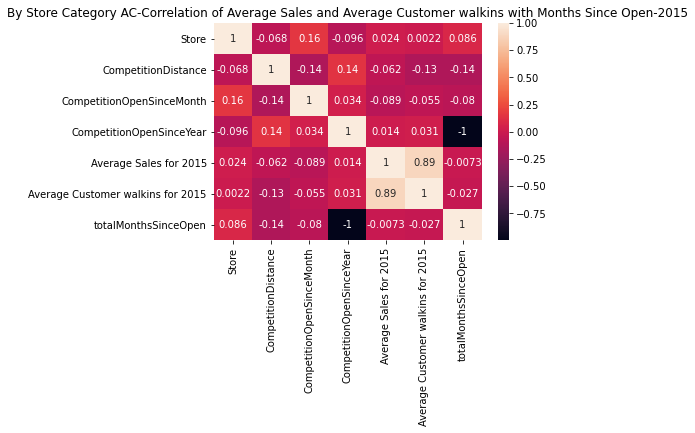

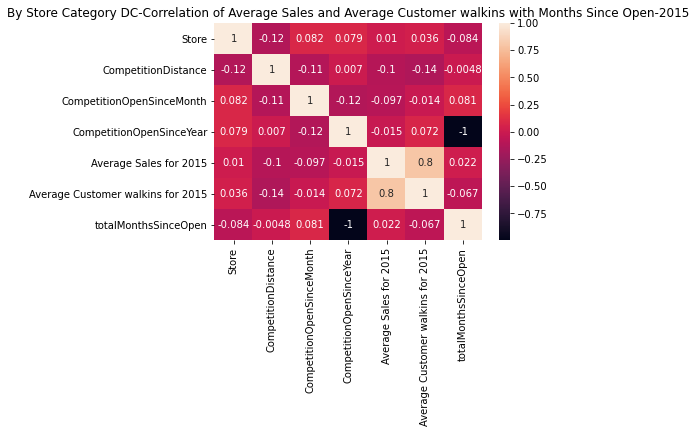

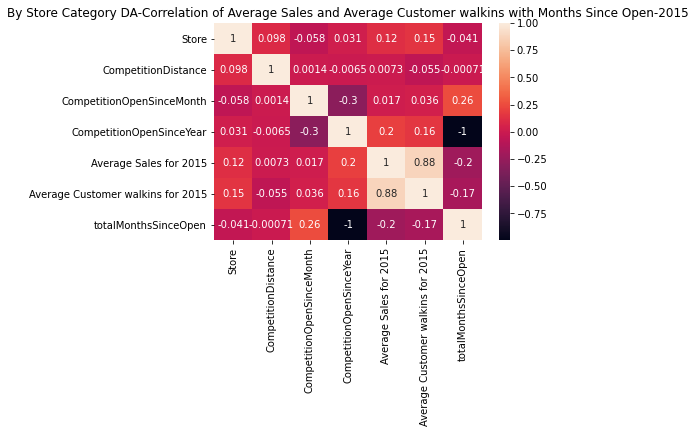

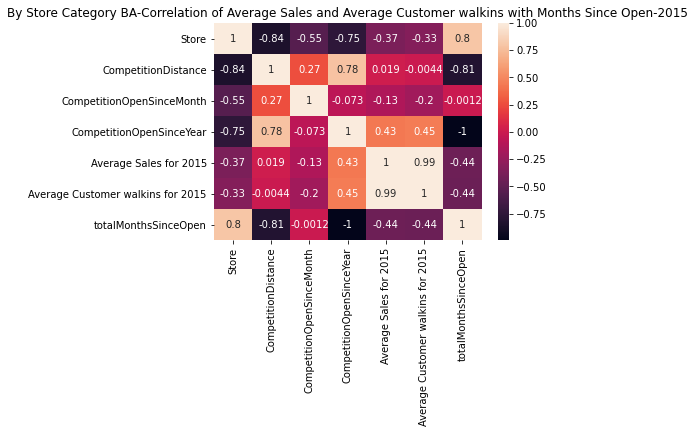

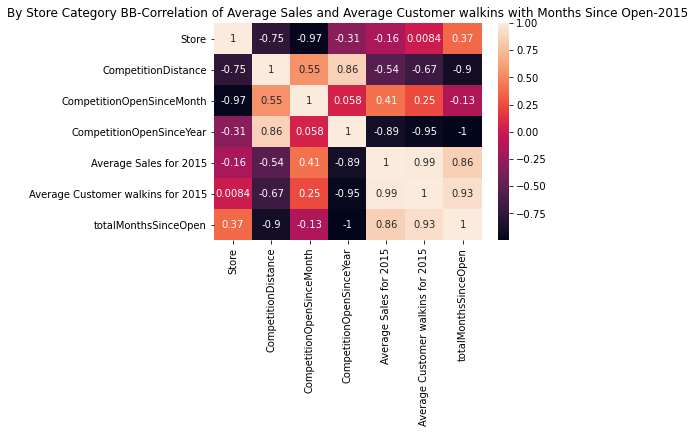

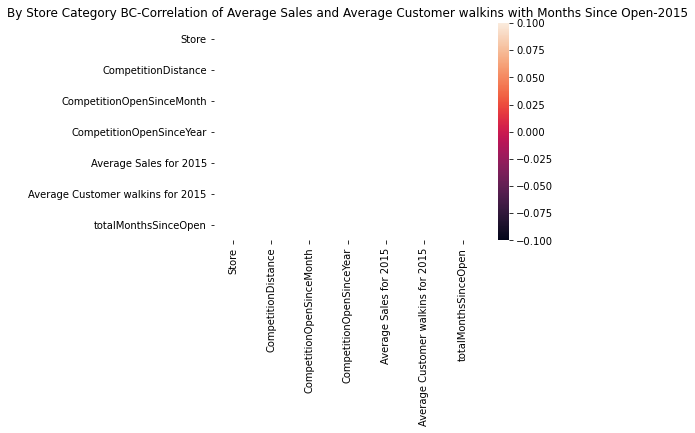

In [24]:
corr91=np.array(ca_comp_2014.corr())
sns.heatmap(corr91,annot=True,xticklabels=corr_labels3,yticklabels=corr_labels3)
plt.title('By Store Category CA-Correlation of Average Sales and Average Customer walkins with Months Since Open-2015')
plt.show()


corr92=np.array(aa_comp_2014.corr())
sns.heatmap(corr92,annot=True,xticklabels=corr_labels3,yticklabels=corr_labels3)
plt.title('By Store Category AA-Correlation of Average Sales and Average Customer walkins with Months Since Open-2015')
plt.show()


corr93=np.array(cc_comp_2014.corr())
sns.heatmap(corr93,annot=True,xticklabels=corr_labels3,yticklabels=corr_labels3)
plt.title('By Store Category CC-Correlation of Average Sales and Average Customer walkins with Months Since Open-2015')
plt.show()


corr94=np.array(ac_comp_2014.corr())
sns.heatmap(corr94,annot=True,xticklabels=corr_labels3,yticklabels=corr_labels3)
plt.title('By Store Category AC-Correlation of Average Sales and Average Customer walkins with Months Since Open-2015')
plt.show()


corr95=np.array(dc_comp_2014.corr())
sns.heatmap(corr95,annot=True,xticklabels=corr_labels3,yticklabels=corr_labels3)
plt.title('By Store Category DC-Correlation of Average Sales and Average Customer walkins with Months Since Open-2015')
plt.show()


corr96=np.array(da_comp_2014.corr())
sns.heatmap(corr96,annot=True,xticklabels=corr_labels3,yticklabels=corr_labels3)
plt.title('By Store Category DA-Correlation of Average Sales and Average Customer walkins with Months Since Open-2015')
plt.show()


corr97=np.array(ba_comp_2014.corr())
sns.heatmap(corr97,annot=True,xticklabels=corr_labels3,yticklabels=corr_labels3)
plt.title('By Store Category BA-Correlation of Average Sales and Average Customer walkins with Months Since Open-2015')
plt.show()


corr98=np.array(bb_comp_2014.corr())
sns.heatmap(corr98,annot=True,xticklabels=corr_labels3,yticklabels=corr_labels3)
plt.title('By Store Category BB-Correlation of Average Sales and Average Customer walkins with Months Since Open-2015')
plt.show()


corr99=np.array(bc_comp_2014.corr())
sns.heatmap(corr99,annot=True,xticklabels=corr_labels3,yticklabels=corr_labels3)
plt.title('By Store Category BC-Correlation of Average Sales and Average Customer walkins with Months Since Open-2015')
plt.show()


**Binning of Stores on the basis of Competition Distance**
<a id='comp_bin'></a>


In [25]:
comp_data4['Date of Inception of Competition']=dummy

<ipython-input-25-db3ebe6faea8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_data4['Date of Inception of Competition']=dummy


In [26]:
total_avg_sales=pd.DataFrame(main_data.groupby('Store')['Sales'].mean()).reset_index()
total_avg_sales.columns=['Store','Average Sales']

total_avg_cust=pd.DataFrame(main_data.groupby('Store')['Customers'].mean()).reset_index()
total_avg_cust.columns=['Store','Average Customers']

comp_data=comp_data.merge(total_avg_sales,on='Store',how='left')

comp_data=comp_data.merge(total_avg_cust,on='Store',how='left')

store_data_cat_ca=comp_data[comp_data['StoreType+Assortment']=='ca']
store_data_cat_aa=comp_data[comp_data['StoreType+Assortment']=='aa']
store_data_cat_cc=comp_data[comp_data['StoreType+Assortment']=='cc']
store_data_cat_ac=comp_data[comp_data['StoreType+Assortment']=='ac']
store_data_cat_dc=comp_data[comp_data['StoreType+Assortment']=='dc']
store_data_cat_da=comp_data[comp_data['StoreType+Assortment']=='da']
store_data_cat_ba=comp_data[comp_data['StoreType+Assortment']=='ba']
store_data_cat_bb=comp_data[comp_data['StoreType+Assortment']=='bb']
store_data_cat_bc=comp_data[comp_data['StoreType+Assortment']=='bc']

inception=comp_2015_d[['Store','totalMonthsSinceOpen']]
inception_data=inception.merge(comp_data,how='left',on='Store')
inc_data_ca=inception_data[inception_data['StoreType+Assortment']=='ca']
inc_data_aa=inception_data[inception_data['StoreType+Assortment']=='aa']
inc_data_cc=inception_data[inception_data['StoreType+Assortment']=='cc']
inc_data_ac=inception_data[inception_data['StoreType+Assortment']=='ac']
inc_data_dc=inception_data[inception_data['StoreType+Assortment']=='dc']
inc_data_da=inception_data[inception_data['StoreType+Assortment']=='da']
inc_data_ba=inception_data[inception_data['StoreType+Assortment']=='ba']
inc_data_bb=inception_data[inception_data['StoreType+Assortment']=='bb']
inc_data_bc=inception_data[inception_data['StoreType+Assortment']=='bc']

promofinal_cat=pd.read_csv('PromoFinal.csv')


**Category CA**

In [27]:
bin_range=np.arange(20).tolist()
bin_range.remove(0)
bin_range

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [50]:
#based on Average customers
std=[]
min_ca=store_data_cat_ca['CompetitionDistance'].min()
max_ca=store_data_cat_ca['CompetitionDistance'].max()
for i in bin_range:
    bins_ca=np.linspace(min_ca,max_ca,i).astype(int)
    store_data_cat_ca['Competition Bins1']=pd.cut(store_data_cat_ca['CompetitionDistance'],bins=bins_ca,include_lowest=True)
    example=pd.DataFrame(store_data_cat_ca.groupby('Competition Bins1')['Average Customers'].median().fillna(0)).reset_index()
    count=store_data_cat_ca.drop_duplicates(subset=['Competition Bins1'])['Competition Bins1'].count()
    ind=int(round(0.20*count,0))
    if ind==1:
        ind=ind+1
    else:
        ind=ind
    e1=example.iloc[:ind,-1:]
    e2=np.array(e1['Average Customers'])
    std.append(np.std(e2))
bin_range1=pd.DataFrame(bin_range)
bin_range1.columns=['Bin']
bin_range1['StDev']=std
e3=bin_range1['StDev'].max()
e4_2=bin_range1[bin_range1['StDev']==e3]['Bin'].max()
opt_bins_ca_2=np.linspace(min_ca,max_ca,e4_2).astype(int)
store_data_cat_ca['Competition Bins-opt-cust']=pd.cut(store_data_cat_ca['CompetitionDistance'],bins=opt_bins_ca_2,include_lowest=True)

<ipython-input-50-274b23a59ad1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_data_cat_ca['Competition Bins1']=pd.cut(store_data_cat_ca['CompetitionDistance'],bins=bins_ca,include_lowest=True)
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-50-274b23a59ad1>:7: SettingWithCop

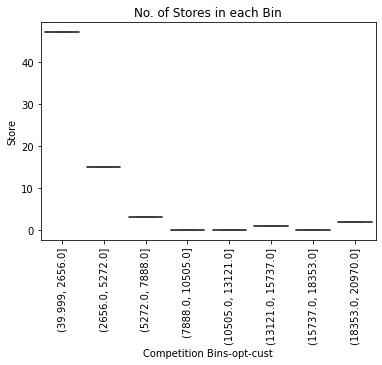

In [52]:
hist_ca=pd.DataFrame(store_data_cat_ca.groupby('Competition Bins-opt-cust')['Store'].count()).reset_index()
hist_ca['Competition Bins-opt-cust']=hist_ca['Competition Bins-opt-cust'].astype(str)
sns.boxplot(y='Store',x='Competition Bins-opt-cust',data=hist_ca)
plt.title('No. of Stores in each Bin')
plt.xticks(rotation=90)
plt.show()





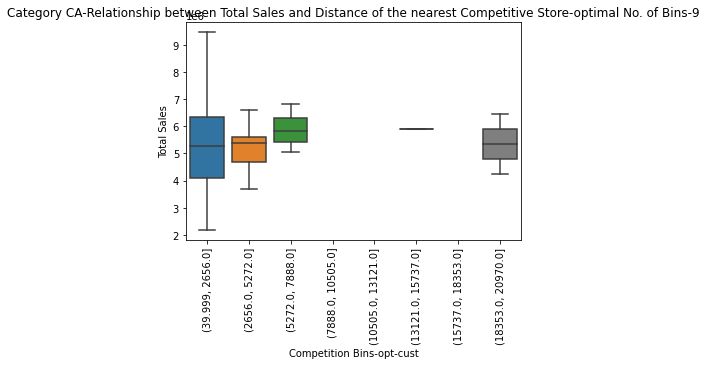

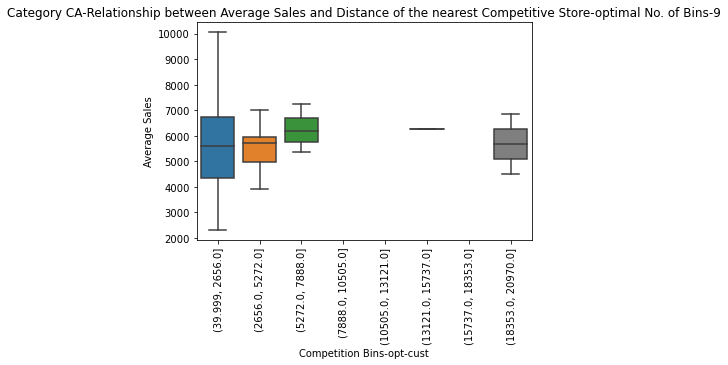

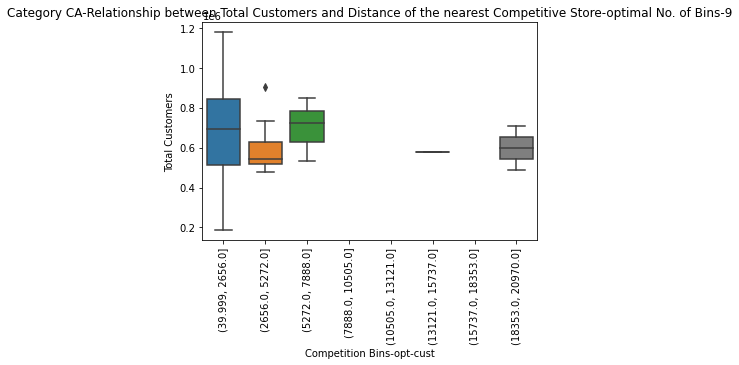

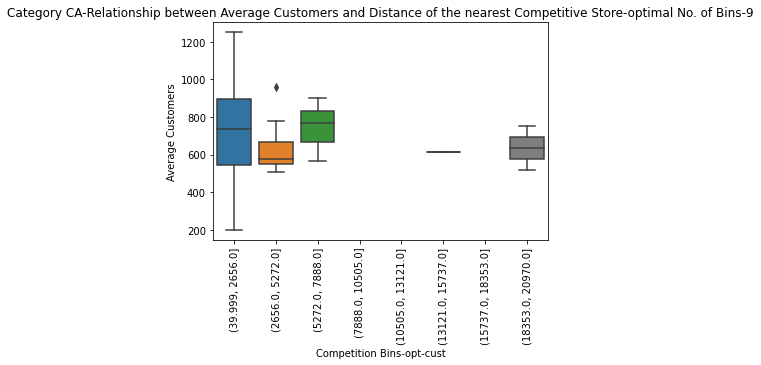

In [53]:
sns.boxplot(y='Total Sales',x='Competition Bins-opt-cust',data=store_data_cat_ca)
plt.xticks(rotation=90)
plt.title('Category CA-Relationship between Total Sales and Distance of the nearest Competitive Store-optimal No. of Bins-'+str(e4_2))
plt.show()

sns.boxplot(y='Average Sales',x='Competition Bins-opt-cust',data=store_data_cat_ca)
plt.xticks(rotation=90)
plt.title('Category CA-Relationship between Average Sales and Distance of the nearest Competitive Store-optimal No. of Bins-'+str(e4_2))
plt.show()

sns.boxplot(y='Total Customers',x='Competition Bins-opt-cust',data=store_data_cat_ca)
plt.xticks(rotation=90)
plt.title('Category CA-Relationship between Total Customers and Distance of the nearest Competitive Store-optimal No. of Bins-'+str(e4_2))
plt.show()

sns.boxplot(y='Average Customers',x='Competition Bins-opt-cust',data=store_data_cat_ca)
plt.xticks(rotation=90)
plt.title('Category CA-Relationship between Average Customers and Distance of the nearest Competitive Store-optimal No. of Bins-'+str(e4_2))
plt.show()




In [31]:
#based on Average Sales
std=[]
min_inc_ca=inc_data_ca['totalMonthsSinceOpen'].min()
max_inc_ca=inc_data_ca['totalMonthsSinceOpen'].max()
for i in bin_range:
    bins_inc_ca=np.linspace(min_inc_ca,max_inc_ca,i).astype(int)
    inc_data_ca['Competition Bins1']=pd.cut(inc_data_ca['totalMonthsSinceOpen'],bins=bins_inc_ca,include_lowest=True)
    example=pd.DataFrame(inc_data_ca.groupby('Competition Bins1')['Average Sales'].median().fillna(0)).reset_index()
    count=inc_data_ca.drop_duplicates(subset=['Competition Bins1'])['Competition Bins1'].count()
    ind=int(round(0.20*count,0))
    if ind==1:
        ind=ind+1
    else:
        ind=ind
    e1=example.iloc[:ind,-1:]
    e2=np.array(e1['Average Sales'])
    std.append(np.std(e2))
bin_range1=pd.DataFrame(bin_range)
bin_range1.columns=['Bin']
bin_range1['StDev']=std
e3=bin_range1['StDev'].max()
e4=bin_range1[bin_range1['StDev']==e3]['Bin'].max()
opt_bins_ca=np.linspace(min_inc_ca,max_inc_ca,e4).astype(int)
inc_data_ca['Competition Bins-opt2']=pd.cut(inc_data_ca['totalMonthsSinceOpen'],bins=opt_bins_ca,include_lowest=True)
box1=inc_data_ca.merge(store_data_cat_ca[['Store','Competition Bins-opt']],on='Store',how='left')


<ipython-input-31-fd0851b8e88b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inc_data_ca['Competition Bins1']=pd.cut(inc_data_ca['totalMonthsSinceOpen'],bins=bins_inc_ca,include_lowest=True)
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-31-fd0851b8e88b>:7: SettingWithCopyWarnin

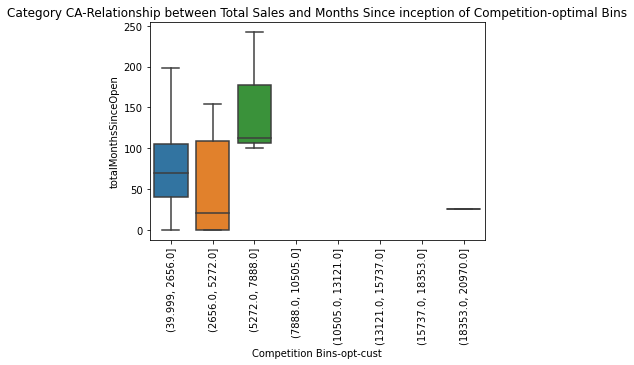

In [54]:
box_ca=inc_data_ca.merge(store_data_cat_ca[['Store','Competition Bins-opt-cust']],on='Store',how='left')
sns.boxplot(y='totalMonthsSinceOpen',x='Competition Bins-opt-cust',data=box_ca)
plt.xticks(rotation=90)
plt.title('Category CA-Relationship between Total Sales and Months Since inception of Competition-optimal Bins')
plt.show()


In [55]:
box_ca=box_ca.merge(comp_data4[['Store','Date of Inception of Competition']],on='Store',how='left')
timestamp=pd.to_datetime('2013-02-01')
list_comp=box_ca[box_ca['Date of Inception of Competition']>=timestamp]['Store'].tolist()
before_comp_sales=[]
after_comp_sales=[]
before_comp_cust=[]
after_comp_cust=[]
for s in list_comp:
    x=box_ca[box_ca['Store']==s]
    y=x['Date of Inception of Competition'].tolist()[0]
    level1=main_data[main_data['Store']==s]
    before_avg=level1[level1['Date']<y]['Sales'].mean()
    after_avg=level1[level1['Date']>=y]['Sales'].mean()
    before_comp_sales.append(before_avg)
    after_comp_sales.append(after_avg)
    before_avg_c=level1[level1['Date']<y]['Customers'].mean()
    after_avg_c=level1[level1['Date']>=y]['Customers'].mean()
    before_comp_cust.append(before_avg_c)
    after_comp_cust.append(after_avg_c)
list_comp=pd.DataFrame(list_comp)
list_comp.columns=['Store']
list_comp['Avg Sales before Comp']=before_comp_sales
list_comp['Avg Sales after Comp']=after_comp_sales
list_comp['Avg Cust before Comp']=before_comp_cust
list_comp['Avg Cust after Comp']=after_comp_cust
list_comp=list_comp.merge(box_ca[['Store','Competition Bins-opt-cust']],on='Store',how='left')
list_comp
    

Store  Avg Sales before Comp  Avg Sales after Comp  Avg Cust before Comp  \
0      37            5914.915594           5821.098765            653.585122   
1     131            4367.558727           4215.935484            463.240395   
2     197            5677.887199           5803.496732            703.804816   
3     246            5870.511111           5895.775822            797.633333   
4     730            7906.205761           6286.414878            963.687243   
5     839            4518.891781           3400.476415            566.901370   
6     944            6608.769484           6352.548387           1024.402854   
7     996            5277.025247           5994.709677            566.431394   
8    1044            5506.267073           5165.327869            745.032927   
9    1059            6698.000000           7044.634977            949.866667   
10   1085            6383.463863           5938.646409            642.484888   

    Avg Cust after Comp Competition Bins-opt-cust  
0            627.139918          (2656.0, 5272.0]  
1            431.258065          (39.999, 2656.0]  
2            686.575163          (2656.0, 5272.0]  
3            778.234742          (2656.0, 5272.0]  
4            768.949928          (39.999, 2656.0]  
5            440.844340          (39.999, 2656.0]  
6            990.838710          (39.999, 2656.0]  
7            592.290323          (2656.0, 5272.0]  
8            690.967213          (39.999, 2656.0]  
9            961.329812          (2656.0, 5272.0]  
10           592.044199          (2656.0, 5272.0]

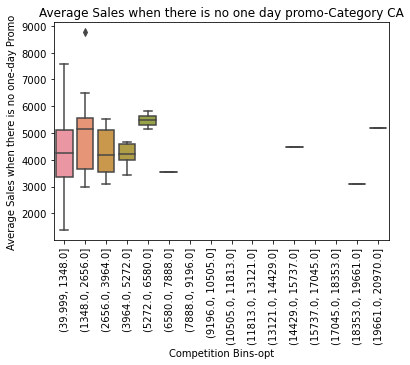

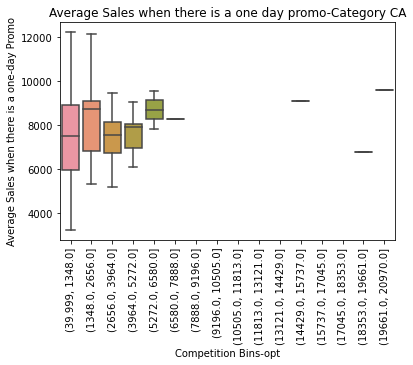

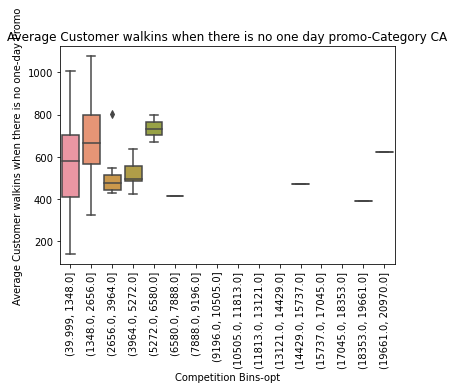

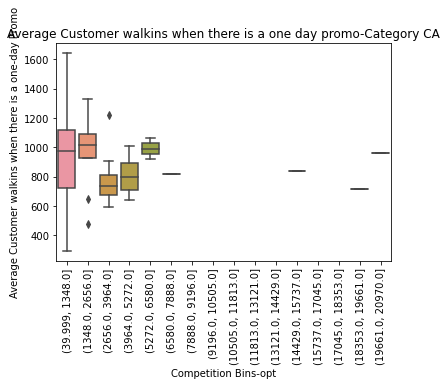

In [34]:
sns.boxplot(y='Average Sales when there is no one-day Promo',x='Competition Bins-opt',data=store_data_cat_ca)
plt.xticks(rotation=90)
plt.title('Average Sales when there is no one day promo-Category CA')
plt.show()

sns.boxplot(y='Average Sales when there is a one-day Promo',x='Competition Bins-opt',data=store_data_cat_ca)
plt.xticks(rotation=90)
plt.title('Average Sales when there is a one day promo-Category CA')
plt.show()

sns.boxplot(y='Average Customer walkins when there is no one-day Promo',x='Competition Bins-opt',data=store_data_cat_ca)
plt.xticks(rotation=90)
plt.title('Average Customer walkins when there is no one day promo-Category CA')
plt.show()

sns.boxplot(y='Average Customer walkins when there is a one-day Promo',x='Competition Bins-opt',data=store_data_cat_ca)
plt.xticks(rotation=90)
plt.title('Average Customer walkins when there is a one day promo-Category CA')
plt.show()



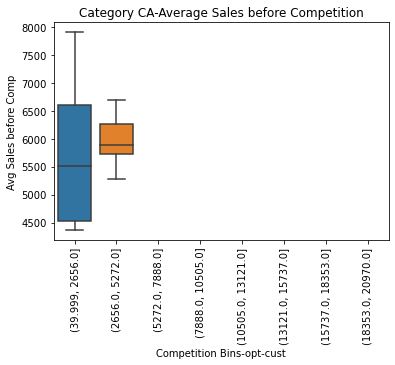

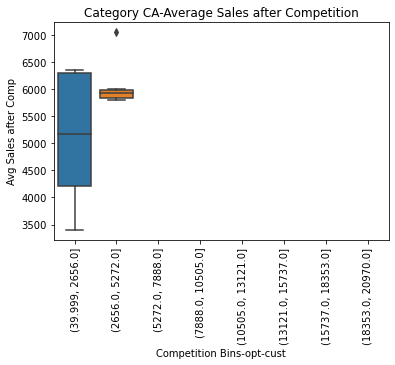

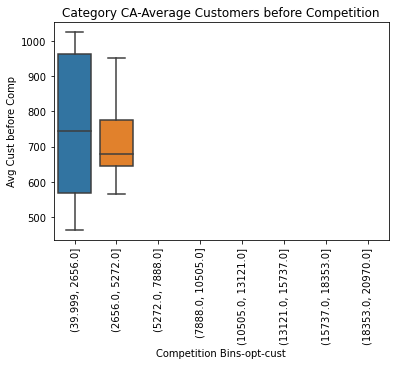

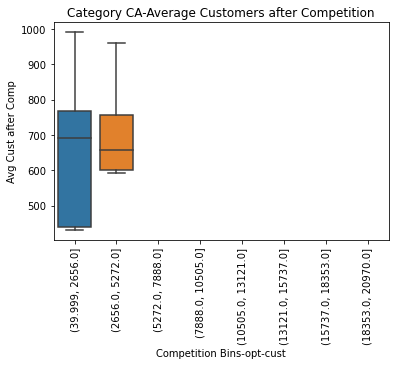

In [56]:
sns.boxplot(y='Avg Sales before Comp',x='Competition Bins-opt-cust',data=list_comp)
plt.xticks(rotation=90)
plt.title('Category CA-Average Sales before Competition')
plt.show()

sns.boxplot(y='Avg Sales after Comp',x='Competition Bins-opt-cust',data=list_comp)
plt.xticks(rotation=90)
plt.title('Category CA-Average Sales after Competition')
plt.show()


sns.boxplot(y='Avg Cust before Comp',x='Competition Bins-opt-cust',data=list_comp)
plt.xticks(rotation=90)
plt.title('Category CA-Average Customers before Competition')
plt.show()

sns.boxplot(y='Avg Cust after Comp',x='Competition Bins-opt-cust',data=list_comp)
plt.xticks(rotation=90)
plt.title('Category CA-Average Customers after Competition')
plt.show()


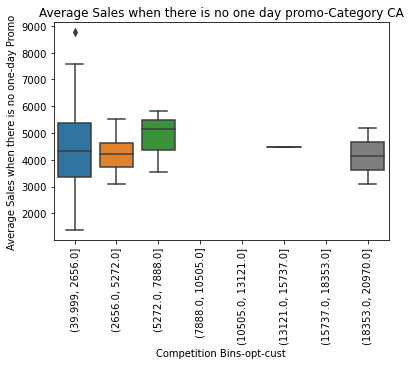

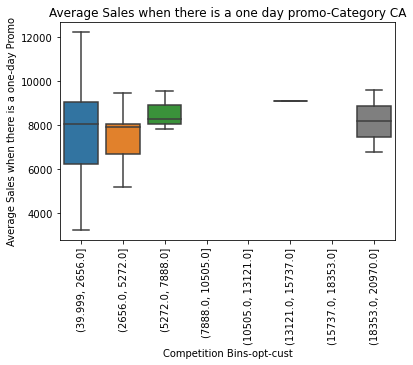

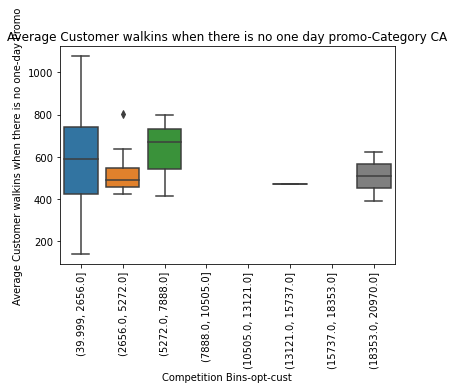

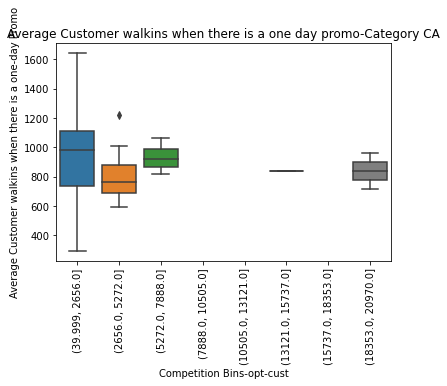

In [57]:
sns.boxplot(y='Average Sales when there is no one-day Promo',x='Competition Bins-opt-cust',data=store_data_cat_ca)
plt.xticks(rotation=90)
plt.title('Average Sales when there is no one day promo-Category CA')
plt.show()

sns.boxplot(y='Average Sales when there is a one-day Promo',x='Competition Bins-opt-cust',data=store_data_cat_ca)
plt.xticks(rotation=90)
plt.title('Average Sales when there is a one day promo-Category CA')
plt.show()

sns.boxplot(y='Average Customer walkins when there is no one-day Promo',x='Competition Bins-opt-cust',data=store_data_cat_ca)
plt.xticks(rotation=90)
plt.title('Average Customer walkins when there is no one day promo-Category CA')
plt.show()

sns.boxplot(y='Average Customer walkins when there is a one-day Promo',x='Competition Bins-opt-cust',data=store_data_cat_ca)
plt.xticks(rotation=90)
plt.title('Average Customer walkins when there is a one day promo-Category CA')
plt.show()



In [58]:
ca_promo=store_data_cat_ca[store_data_cat_ca['Promo2']==1]
ca_promo['Promo2SinceWeek-EG']=ca_promo['Promo2SinceWeek'].astype(str)
ca_promo['Promo2SinceYear-EG']=ca_promo['Promo2SinceYear'].astype(str)
ca_promo['Promo2SinceDate']=ca_promo['Promo2SinceYear-EG']+'-W'+ca_promo['Promo2SinceWeek-EG']
ca_store=ca_promo['Store'].tolist()
import datetime
Since_Date=[]
for t in ca_promo['Promo2SinceDate'].tolist():
    eg=datetime.datetime.strptime(t+'-1','%Y-W%W-%w')
    Since_Date.append(eg)
Since_date=pd.DataFrame(Since_Date)
Since_date['Store']=ca_store
Since_date.columns=['Promo2Date','Store']


year_2015=[]
for i in range(31):
    x=2015
    year_2015.append(x)
ca_promo['y']=year_2015
ca_promo=ca_promo.merge(Since_date,on='Store',how='left')
ca_promo['y']=pd.to_datetime(ca_promo['y'],format='%Y')
ca_promo['MonthsSincePromo2']=ca_promo['y']-ca_promo['Promo2Date']
ca_promo['MonthsSincePromo2']=ca_promo['MonthsSincePromo2']/np.timedelta64(1,'M')
ca_promo.loc[ca_promo.MonthsSincePromo2<0,'MonthsSincePromo2']=0

promofinal=pd.DataFrame(main_data.groupby(['Store','Year of Sale','Month of Sale'])['Sales'].mean()).reset_index()
promofinal_1=pd.DataFrame(main_data.groupby(['Store','Year of Sale','Month of Sale'])['Customers'].mean()).reset_index()
promofinal1=promofinal.merge(promofinal_cat,on=['Store','Year of Sale','Month of Sale'],how='right')
promofinal1=promofinal1.merge(promofinal_1,on=['Store','Year of Sale','Month of Sale'],how='left')
ca_promo_list=ca_promo['Store'].tolist()
promofinal2=promofinal1[promofinal1['Store'].isin(ca_promo_list)]

promofinal2=promofinal2.merge(ca_promo[['Store','Competition Bins-opt-cust']],on='Store',how='left')
promofinal2=promofinal2[['Store','Year of Sale','Month of Sale','Sales','Date','Customers','Competition Bins-opt-cust']]


<ipython-input-58-dd9c995cdb34>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_promo['Promo2SinceWeek-EG']=ca_promo['Promo2SinceWeek'].astype(str)
<ipython-input-58-dd9c995cdb34>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_promo['Promo2SinceYear-EG']=ca_promo['Promo2SinceYear'].astype(str)
<ipython-input-58-dd9c995cdb34>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

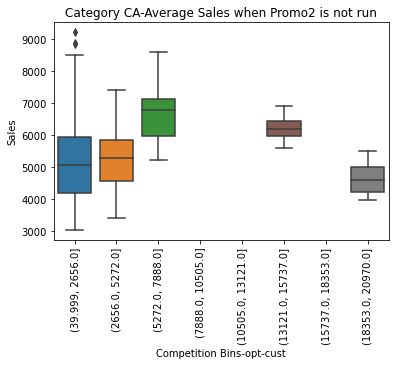

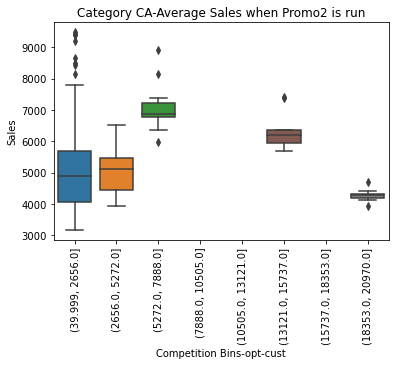

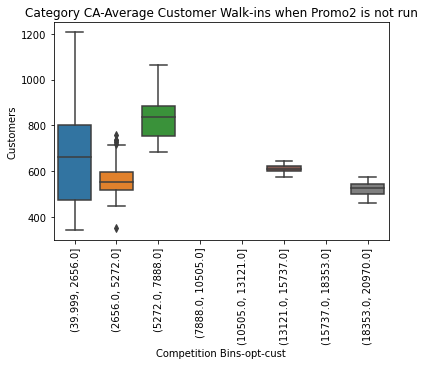

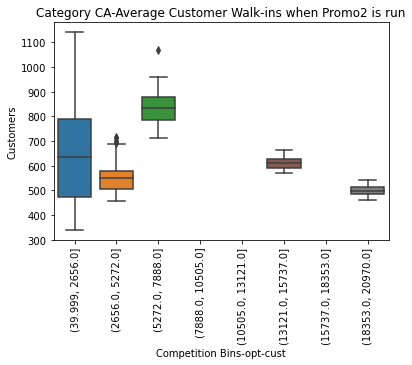

In [59]:
sns.boxplot(y=promofinal2[promofinal2['Date']==0]['Sales'],x=promofinal2[promofinal2['Date']==0]['Competition Bins-opt-cust'],data=promofinal2)
plt.xticks(rotation=90)
plt.title('Category CA-Average Sales when Promo2 is not run')
plt.show()


sns.boxplot(y=promofinal2[promofinal2['Date']>0]['Sales'],x=promofinal2[promofinal2['Date']>0]['Competition Bins-opt-cust'],data=promofinal2)
plt.xticks(rotation=90)
plt.title('Category CA-Average Sales when Promo2 is run')
plt.show()


sns.boxplot(y=promofinal2[promofinal2['Date']==0]['Customers'],x=promofinal2[promofinal2['Date']==0]['Competition Bins-opt-cust'],data=promofinal2)
plt.xticks(rotation=90)
plt.title('Category CA-Average Customer Walk-ins when Promo2 is not run')
plt.show()


sns.boxplot(y=promofinal2[promofinal2['Date']>0]['Customers'],x=promofinal2[promofinal2['Date']>0]['Competition Bins-opt-cust'],data=promofinal2)
plt.xticks(rotation=90)
plt.title('Category CA-Average Customer Walk-ins when Promo2 is run')
plt.show()



**Category AA**

In [37]:
std=[]
min_aa=store_data_cat_aa['CompetitionDistance'].min()
max_aa=store_data_cat_aa['CompetitionDistance'].max()
for i in bin_range:
    bins_aa=np.linspace(min_aa,max_aa,i).astype(int)
    store_data_cat_aa['Competition Bins1']=pd.cut(store_data_cat_aa['CompetitionDistance'],bins=bins_aa,include_lowest=True)
    example=pd.DataFrame(store_data_cat_aa.groupby('Competition Bins1')['Average Sales'].median().fillna(0)).reset_index()
    count=store_data_cat_aa.drop_duplicates(subset=['Competition Bins1'])['Competition Bins1'].count()
    ind=int(round(0.20*count,0))
    if ind==1:
        ind=ind+1
    else:
        ind=ind
    e1=example.iloc[:ind,-1:]
    e2=np.array(e1['Average Sales'])
    std.append(np.std(e2))
bin_range1=pd.DataFrame(bin_range)
bin_range1.columns=['Bin']
bin_range1['StDev']=std
e3=bin_range1['StDev'].max()
e4=bin_range1[bin_range1['StDev']==e3]['Bin'].max()
opt_bins_aa=np.linspace(min_aa,max_aa,e4).astype(int)
store_data_cat_aa['Competition Bins-opt']=pd.cut(store_data_cat_aa['CompetitionDistance'],bins=opt_bins_aa,include_lowest=True)

<ipython-input-37-d4acbc30376e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_data_cat_aa['Competition Bins1']=pd.cut(store_data_cat_aa['CompetitionDistance'],bins=bins_aa,include_lowest=True)
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-37-d4acbc30376e>:6: SettingWithCop

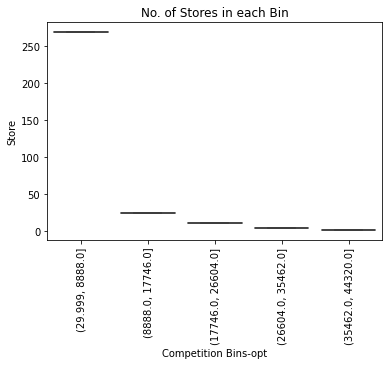

In [38]:
hist_aa=pd.DataFrame(store_data_cat_aa.groupby('Competition Bins-opt')['Store'].count()).reset_index()
hist_aa['Competition Bins-opt']=hist_aa['Competition Bins-opt'].astype(str)
sns.boxplot(y='Store',x='Competition Bins-opt',data=hist_aa)
plt.title('No. of Stores in each Bin')
plt.xticks(rotation=90)
plt.show()


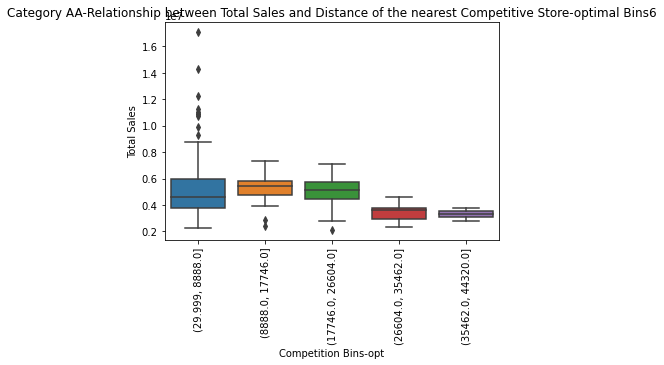

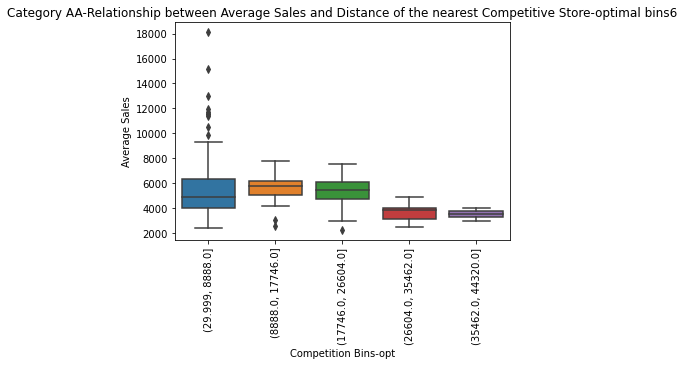

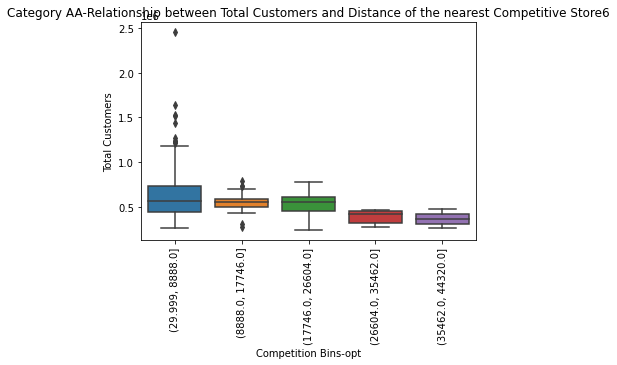

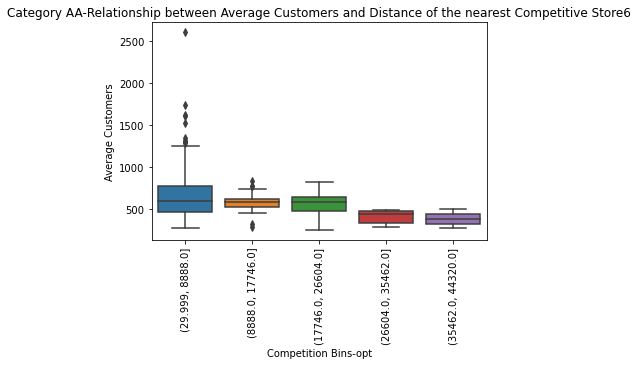

In [39]:
sns.boxplot(y='Total Sales',x='Competition Bins-opt',data=store_data_cat_aa)
plt.xticks(rotation=90)
plt.title('Category AA-Relationship between Total Sales and Distance of the nearest Competitive Store-optimal Bins'+str(e4))
plt.show()

sns.boxplot(y='Average Sales',x='Competition Bins-opt',data=store_data_cat_aa)
plt.xticks(rotation=90)
plt.title('Category AA-Relationship between Average Sales and Distance of the nearest Competitive Store-optimal bins'+str(e4))
plt.show()

sns.boxplot(y='Total Customers',x='Competition Bins-opt',data=store_data_cat_aa)
plt.xticks(rotation=90)
plt.title('Category AA-Relationship between Total Customers and Distance of the nearest Competitive Store'+str(e4))
plt.show()

sns.boxplot(y='Average Customers',x='Competition Bins-opt',data=store_data_cat_aa)
plt.xticks(rotation=90)
plt.title('Category AA-Relationship between Average Customers and Distance of the nearest Competitive Store'+str(e4))
plt.show()

In [40]:
#based on Average Sales
std=[]
min_inc_aa=inc_data_aa['totalMonthsSinceOpen'].min()
max_inc_aa=inc_data_aa['totalMonthsSinceOpen'].max()
for i in bin_range:
    bins_inc_aa=np.linspace(min_inc_aa,max_inc_aa,i).astype(int)
    inc_data_aa['Competition Bins1']=pd.cut(inc_data_aa['totalMonthsSinceOpen'],bins=bins_inc_aa,include_lowest=True)
    example=pd.DataFrame(inc_data_aa.groupby('Competition Bins1')['Average Sales'].median().fillna(0)).reset_index()
    count=inc_data_aa.drop_duplicates(subset=['Competition Bins1'])['Competition Bins1'].count()
    ind=int(round(0.20*count,0))
    if ind==1:
        ind=ind+1
    else:
        ind=ind
    e1=example.iloc[:ind,-1:]
    e2=np.array(e1['Average Sales'])
    std.append(np.std(e2))
bin_range1=pd.DataFrame(bin_range)
bin_range1.columns=['Bin']
bin_range1['StDev']=std
e3=bin_range1['StDev'].max()
e4=bin_range1[bin_range1['StDev']==e3]['Bin'].max()
opt_bins_aa=np.linspace(min_inc_aa,max_inc_aa,e4).astype(int)
inc_data_aa['Competition Bins-opt2']=pd.cut(inc_data_aa['totalMonthsSinceOpen'],bins=opt_bins_aa,include_lowest=True)

<ipython-input-40-d8519391995d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inc_data_aa['Competition Bins1']=pd.cut(inc_data_aa['totalMonthsSinceOpen'],bins=bins_inc_aa,include_lowest=True)
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-40-d8519391995d>:7: SettingWithCopyWarnin

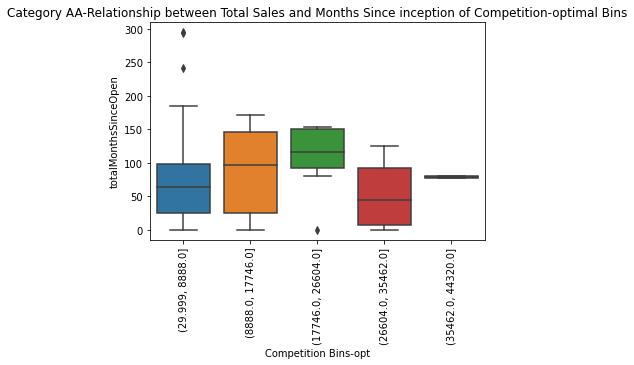

In [41]:
box=inc_data_aa.merge(store_data_cat_aa[['Store','Competition Bins-opt']],on='Store',how='left')
sns.boxplot(y='totalMonthsSinceOpen',x='Competition Bins-opt',data=box)
plt.xticks(rotation=90)
plt.title('Category AA-Relationship between Total Sales and Months Since inception of Competition-optimal Bins')
plt.show()


In [42]:
store_data_cat_aa['Competition Bins-opt']=store_data_cat_aa['Competition Bins-opt'].astype(str)
bin1_aa=store_data_cat_aa[store_data_cat_aa['Competition Bins-opt']=='(29.999, 8888.0]']['Store'].tolist()
bin2_aa=store_data_cat_aa[store_data_cat_aa['Competition Bins-opt']=='(8888.0, 17746.0]']['Store'].tolist()
bin3_aa=store_data_cat_aa[store_data_cat_aa['Competition Bins-opt']=='(17746.0, 26604.0]']['Store'].tolist()
bin4_aa=store_data_cat_aa[store_data_cat_aa['Competition Bins-opt']=='(26604.0, 35462.0]']['Store'].tolist()
bin5_aa=store_data_cat_aa[store_data_cat_aa['Competition Bins-opt']=='(35462.0, 44320.0]']['Store'].tolist()


<ipython-input-42-feef46e54c84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_data_cat_aa['Competition Bins-opt']=store_data_cat_aa['Competition Bins-opt'].astype(str)


In [43]:
box=box.merge(comp_data4[['Store','Date of Inception of Competition']],on='Store',how='left')
timestamp=pd.to_datetime('2013-02-01')
list_comp=box[box['Date of Inception of Competition']>=timestamp]['Store'].tolist()

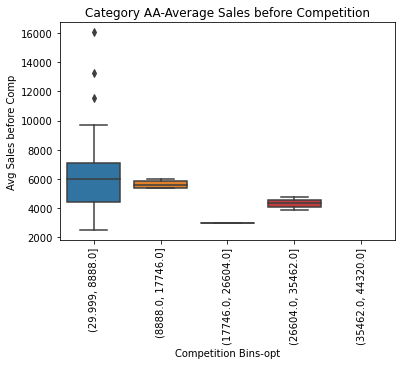

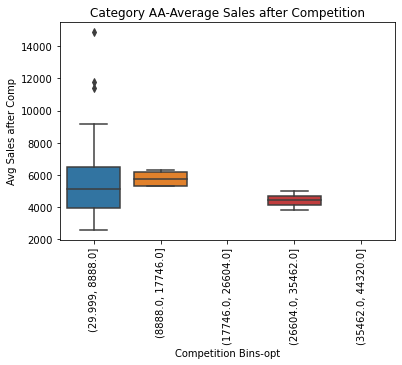

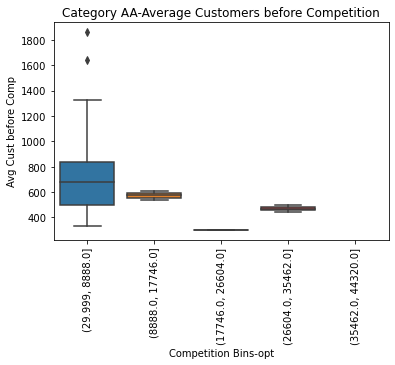

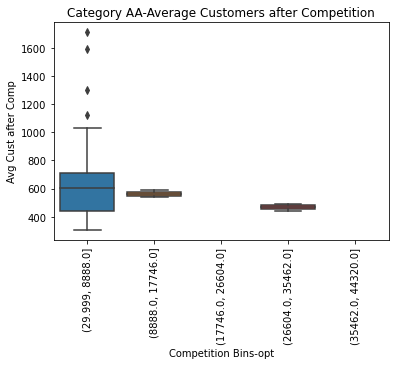

In [44]:
before_comp_sales=[]
after_comp_sales=[]
before_comp_cust=[]
after_comp_cust=[]
for s in list_comp:
    x=box[box['Store']==s]
    y=x['Date of Inception of Competition'].tolist()[0]
    level1=main_data[main_data['Store']==s]
    before_avg=level1[level1['Date']<y]['Sales'].mean()
    after_avg=level1[level1['Date']>=y]['Sales'].mean()
    before_comp_sales.append(before_avg)
    after_comp_sales.append(after_avg)
    before_avg_c=level1[level1['Date']<y]['Customers'].mean()
    after_avg_c=level1[level1['Date']>=y]['Customers'].mean()
    before_comp_cust.append(before_avg_c)
    after_comp_cust.append(after_avg_c)
list_comp=pd.DataFrame(list_comp)
list_comp.columns=['Store']
list_comp['Avg Sales before Comp']=before_comp_sales
list_comp['Avg Sales after Comp']=after_comp_sales
list_comp['Avg Cust before Comp']=before_comp_cust
list_comp['Avg Cust after Comp']=after_comp_cust
list_comp=list_comp.merge(box[['Store','Competition Bins-opt']],on='Store',how='left')
sns.boxplot(y='Avg Sales before Comp',x='Competition Bins-opt',data=list_comp)
plt.xticks(rotation=90)
plt.title('Category AA-Average Sales before Competition')
plt.show()

sns.boxplot(y='Avg Sales after Comp',x='Competition Bins-opt',data=list_comp)
plt.xticks(rotation=90)
plt.title('Category AA-Average Sales after Competition')
plt.show()


sns.boxplot(y='Avg Cust before Comp',x='Competition Bins-opt',data=list_comp)
plt.xticks(rotation=90)
plt.title('Category AA-Average Customers before Competition')
plt.show()

sns.boxplot(y='Avg Cust after Comp',x='Competition Bins-opt',data=list_comp)
plt.xticks(rotation=90)
plt.title('Category AA-Average Customers after Competition')
plt.show()






    

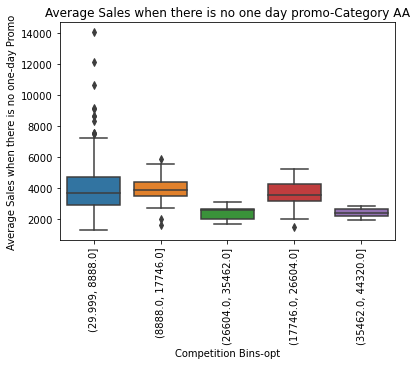

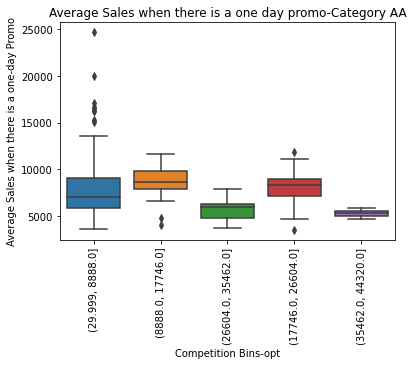

In [45]:
sns.boxplot(y='Average Sales when there is no one-day Promo',x='Competition Bins-opt',data=store_data_cat_aa)
plt.xticks(rotation=90)
plt.title('Average Sales when there is no one day promo-Category AA')
plt.show()

sns.boxplot(y='Average Sales when there is a one-day Promo',x='Competition Bins-opt',data=store_data_cat_aa)
plt.xticks(rotation=90)
plt.title('Average Sales when there is a one day promo-Category AA')
plt.show()


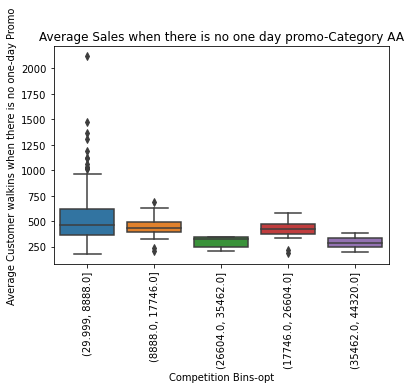

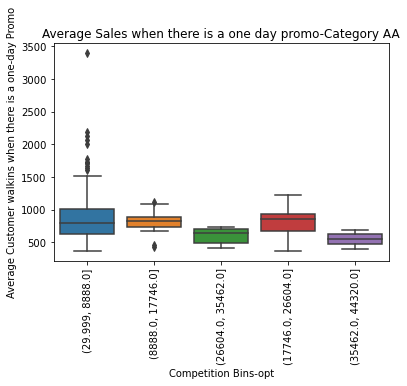

In [46]:
sns.boxplot(y='Average Customer walkins when there is no one-day Promo',x='Competition Bins-opt',data=store_data_cat_aa)
plt.xticks(rotation=90)
plt.title('Average Sales when there is no one day promo-Category AA')
plt.show()

sns.boxplot(y='Average Customer walkins when there is a one-day Promo',x='Competition Bins-opt',data=store_data_cat_aa)
plt.xticks(rotation=90)
plt.title('Average Sales when there is a one day promo-Category AA')
plt.show()


In [60]:
aa_promo=store_data_cat_aa[store_data_cat_aa['Promo2']==1]
aa_promo['Promo2SinceWeek-EG']=aa_promo['Promo2SinceWeek'].astype(str)
aa_promo['Promo2SinceYear-EG']=aa_promo['Promo2SinceYear'].astype(str)
aa_promo['Promo2SinceDate']=aa_promo['Promo2SinceYear-EG']+'-W'+aa_promo['Promo2SinceWeek-EG']
aa_store=aa_promo['Store'].tolist()
import datetime
Since_Date=[]
for t in aa_promo['Promo2SinceDate'].tolist():
    eg=datetime.datetime.strptime(t+'-1','%Y-W%W-%w')
    Since_Date.append(eg)
Since_date=pd.DataFrame(Since_Date)
Since_date['Store']=aa_store
Since_date.columns=['Promo2Date','Store']

year_2015=[]
for i in range(122):
    x=2015
    year_2015.append(x)
aa_promo['y']=year_2015
aa_promo=aa_promo.merge(Since_date,on='Store',how='left')
aa_promo['y']=pd.to_datetime(aa_promo['y'],format='%Y')
aa_promo['MonthsSincePromo2']=aa_promo['y']-aa_promo['Promo2Date']
aa_promo['MonthsSincePromo2']=aa_promo['MonthsSincePromo2']/np.timedelta64(1,'M')
aa_promo.loc[aa_promo.MonthsSincePromo2<0,'MonthsSincePromo2']=0

timestamp=pd.to_datetime('2013-02-01')
list_promo2=aa_promo[aa_promo['Promo2Date']>=timestamp]['Store'].tolist()
before_promo2_sales=[]
after_promo2_sales=[]
before_promo2_cust=[]
after_promo2_cust=[]
for s in list_promo2:
    x=aa_promo[aa_promo['Store']==s]
    y=x['Promo2Date'].tolist()[0]
    level1=main_data[main_data['Store']==s]
    before_avg=level1[level1['Date']<y]['Sales'].mean()
    after_avg=level1[level1['Date']>=y]['Sales'].mean()
    before_promo2_sales.append(before_avg)
    after_promo2_sales.append(after_avg)
    before_avg_c=level1[level1['Date']<y]['Customers'].mean()
    after_avg_c=level1[level1['Date']>=y]['Customers'].mean()
    before_promo2_cust.append(before_avg_c)
    after_promo2_cust.append(after_avg_c)
list_promo2=pd.DataFrame(list_promo2)
list_promo2.columns=['Store']
list_promo2['Avg Sales before Promo2']=before_promo2_sales
list_promo2['Avg Sales after Promo2']=after_promo2_sales
list_promo2['Avg Cust before Promo2']=before_promo2_cust
list_promo2['Avg Cust after Promo2']=after_promo2_cust
list_promo2=list_promo2.merge(box[['Store','Competition Bins-opt']],on='Store',how='left')
list_promo2
    

<ipython-input-60-cc9ae4534418>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa_promo['Promo2SinceWeek-EG']=aa_promo['Promo2SinceWeek'].astype(str)
<ipython-input-60-cc9ae4534418>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa_promo['Promo2SinceYear-EG']=aa_promo['Promo2SinceYear'].astype(str)
<ipython-input-60-cc9ae4534418>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

Store  Avg Sales before Promo2  Avg Sales after Promo2  \
0      28              4431.295189             3891.815029   
1      30              4939.046189             3881.019646   
2      39              3581.314815             4141.307163   
3      78              2721.441176             3091.519824   
4      86              3631.583333             3950.833333   
5     102              5663.480370             5877.935167   
6     121              3566.661355             3731.175109   
7     133              5586.226328             5184.581532   
8     177              3062.941176             3316.360132   
9     265              4046.265455             4458.487179   
10    276              3250.880478             3437.280753   
11    295              3935.258964             4513.791606   
12    296              5654.171091             6079.299242   
13    314              4099.087963             4293.219008   
14    351              4194.441176             5030.725771   
15    380             12002.369515            11914.833006   
16    381              6586.617647             7485.977974   
17    391              4392.046296             4743.714876   
18    446              3954.472222             4115.690083   
19    459              6672.323529             7673.692731   
20    486              3237.203704             3615.092287   
21    505              3461.294118             3957.583700   
22    563              4604.872979             4488.330059   
23    566              3592.781362             4287.859729   
24    674              6415.666667             6510.268595   
25    699              6401.088235             6779.275330   
26    731              7642.799076             7599.351670   
27    734              5218.605578             4846.538350   
28    737              4728.148148             5157.803030   
29    749              4348.482424             3892.333333   
30    752              4454.532407             4309.730028   
31    759              5410.740741             5912.089532   
32    784              6431.041570             6392.198428   
33    786              2578.323529             2964.761013   
34    835              4041.237875             4380.033399   
35    876              7545.175850             7115.842697   
36    881              3286.375000             3532.084022   
37    946              3459.271515             3594.623932   
38    954              5599.480370             5897.793713   
39    964              6890.000000             8040.131057   
40    983              9790.035135             7550.286713   
41    986              5650.449898             4501.026490   
42    998              3169.676471             3575.433921   
43   1003              6880.680851             5911.984085   
44   1013              3265.648148             3313.504132   
45   1028              3456.416667             4049.775482   
46   1040              6979.357968             7373.866405   
47   1042              3288.930556             3454.318182   
48   1088              3869.303191             4288.534483   
49   1111              4333.638889             4345.743802   

    Avg Cust before Promo2  Avg Cust after Promo2 Competition Bins-opt  
0               486.823147             426.757225     (29.999, 8888.0]  
1               733.214781             562.565815     (29.999, 8888.0]  
2               493.462963             528.764463     (29.999, 8888.0]  
3               402.852941             410.014317     (29.999, 8888.0]  
4               492.861111             501.654270     (29.999, 8888.0]  
5               879.362587             840.872299     (29.999, 8888.0]  
6               433.326693             411.639653     (29.999, 8888.0]  
7               673.207852             593.131631     (29.999, 8888.0]  
8               398.970588             401.928414     (29.999, 8888.0]  
9               414.123636             430.632479                  NaN  
10              430.501992            

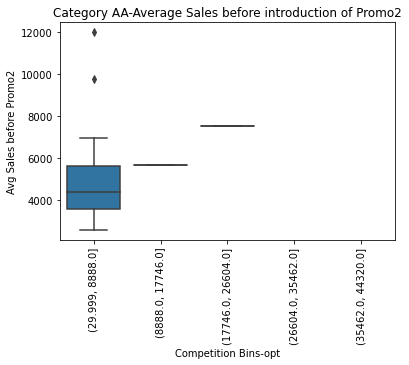

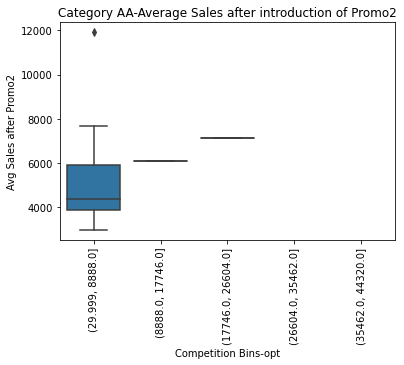

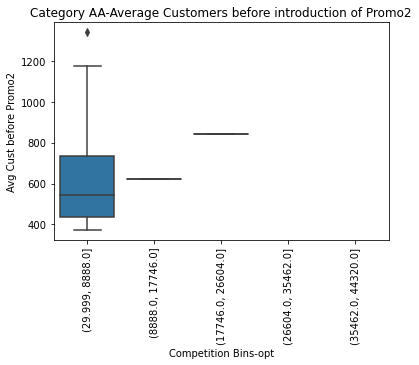

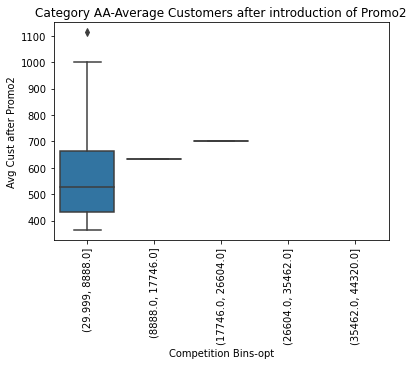

In [62]:
sns.boxplot(y='Avg Sales before Promo2',x='Competition Bins-opt',data=list_promo2)
plt.xticks(rotation=90)
plt.title('Category AA-Average Sales before introduction of Promo2')
plt.show()

sns.boxplot(y='Avg Sales after Promo2',x='Competition Bins-opt',data=list_promo2)
plt.xticks(rotation=90)
plt.title('Category AA-Average Sales after introduction of Promo2')
plt.show()


sns.boxplot(y='Avg Cust before Promo2',x='Competition Bins-opt',data=list_promo2)
plt.xticks(rotation=90)
plt.title('Category AA-Average Customers before introduction of Promo2')
plt.show()

sns.boxplot(y='Avg Cust after Promo2',x='Competition Bins-opt',data=list_promo2)
plt.xticks(rotation=90)
plt.title('Category AA-Average Customers after introduction of Promo2')
plt.show()


**Category CC**

In [63]:
std=[]
min_cc=store_data_cat_cc['CompetitionDistance'].min()
max_cc=store_data_cat_cc['CompetitionDistance'].max()
for i in bin_range:
    bins_cc=np.linspace(min_cc,max_cc,i).astype(int)
    store_data_cat_cc['Competition Bins1']=pd.cut(store_data_cat_cc['CompetitionDistance'],bins=bins_cc,include_lowest=True)
    example=pd.DataFrame(store_data_cat_cc.groupby('Competition Bins1')['Average Sales'].median().fillna(0)).reset_index()
    count=store_data_cat_cc.drop_duplicates(subset=['Competition Bins1'])['Competition Bins1'].count()
    ind=int(round(0.20*count,0))
    if ind==1:
        ind=ind+1
    else:
        ind=ind
    e1=example.iloc[:ind,-1:]
    e2=np.array(e1['Average Sales'])
    std.append(np.std(e2))
bin_range1=pd.DataFrame(bin_range)
bin_range1.columns=['Bin']
bin_range1['StDev']=std
e3=bin_range1['StDev'].max()
e4=bin_range1[bin_range1['StDev']==e3]['Bin'].max()
opt_bins_cc=np.linspace(min_cc,max_cc,e4).astype(int)
store_data_cat_cc['Competition Bins-opt']=pd.cut(store_data_cat_cc['CompetitionDistance'],bins=opt_bins_cc,include_lowest=True)

<ipython-input-63-7ff2bad679a4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_data_cat_cc['Competition Bins1']=pd.cut(store_data_cat_cc['CompetitionDistance'],bins=bins_cc,include_lowest=True)
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-63-7ff2bad679a4>:6: SettingWithCop

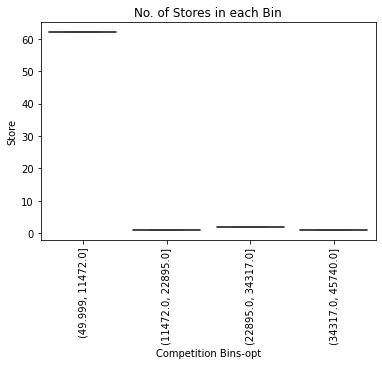

In [64]:
hist_cc=pd.DataFrame(store_data_cat_cc.groupby('Competition Bins-opt')['Store'].count()).reset_index()
hist_cc['Competition Bins-opt']=hist_cc['Competition Bins-opt'].astype(str)
sns.boxplot(y='Store',x='Competition Bins-opt',data=hist_cc)
plt.title('No. of Stores in each Bin')
plt.xticks(rotation=90)
plt.show()



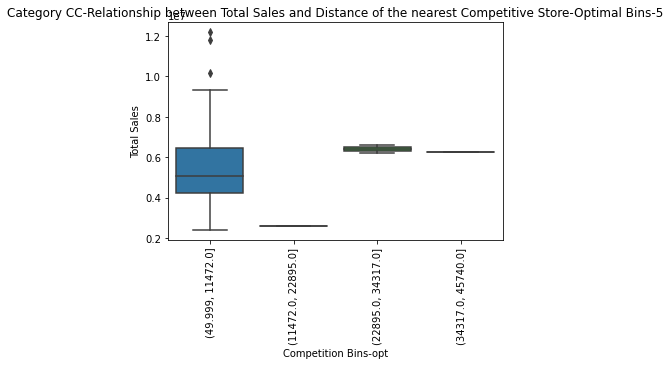

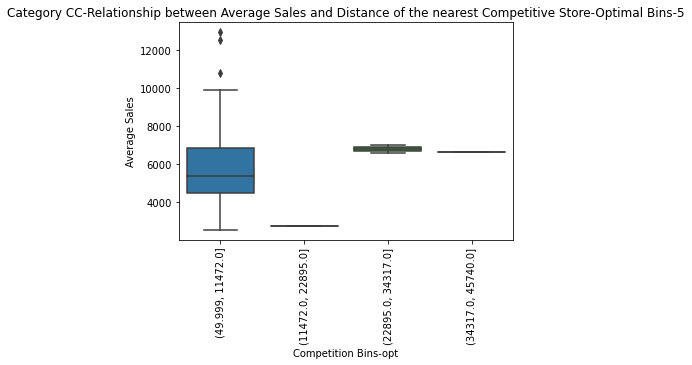

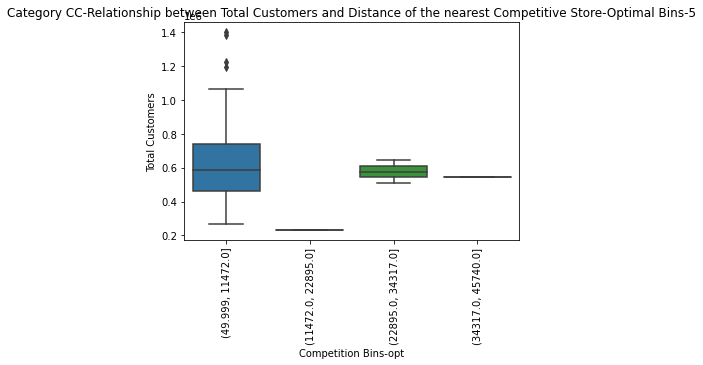

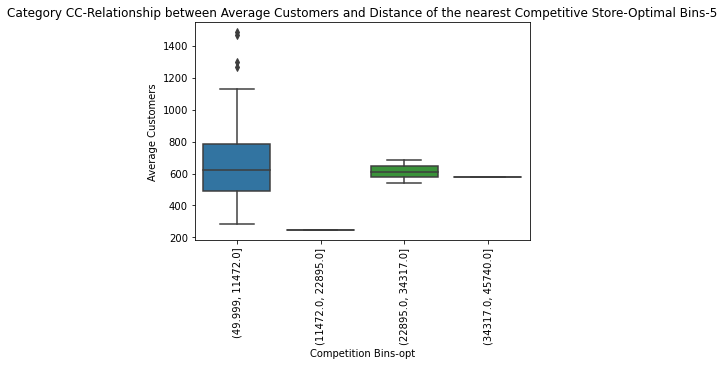

In [65]:
sns.boxplot(y='Total Sales',x='Competition Bins-opt',data=store_data_cat_cc)
plt.xticks(rotation=90)
plt.title('Category CC-Relationship between Total Sales and Distance of the nearest Competitive Store-Optimal Bins-'+str(e4))
plt.show()

sns.boxplot(y='Average Sales',x='Competition Bins-opt',data=store_data_cat_cc)
plt.xticks(rotation=90)
plt.title('Category CC-Relationship between Average Sales and Distance of the nearest Competitive Store-Optimal Bins-'+str(e4))
plt.show()

sns.boxplot(y='Total Customers',x='Competition Bins-opt',data=store_data_cat_cc)
plt.xticks(rotation=90)
plt.title('Category CC-Relationship between Total Customers and Distance of the nearest Competitive Store-Optimal Bins-'+str(e4))
plt.show()

sns.boxplot(y='Average Customers',x='Competition Bins-opt',data=store_data_cat_cc)
plt.xticks(rotation=90)
plt.title('Category CC-Relationship between Average Customers and Distance of the nearest Competitive Store-Optimal Bins-'+str(e4))
plt.show()


In [66]:
#based on Average Sales
std=[]
min_inc_cc=inc_data_cc['totalMonthsSinceOpen'].min()
max_inc_cc=inc_data_cc['totalMonthsSinceOpen'].max()
for i in bin_range:
    bins_inc_cc=np.linspace(min_inc_cc,max_inc_cc,i).astype(int)
    inc_data_cc['Competition Bins1']=pd.cut(inc_data_cc['totalMonthsSinceOpen'],bins=bins_inc_cc,include_lowest=True)
    example=pd.DataFrame(inc_data_cc.groupby('Competition Bins1')['Average Sales'].median().fillna(0)).reset_index()
    count=inc_data_cc.drop_duplicates(subset=['Competition Bins1'])['Competition Bins1'].count()
    ind=int(round(0.20*count,0))
    if ind==1:
        ind=ind+1
    else:
        ind=ind
    e1=example.iloc[:ind,-1:]
    e2=np.array(e1['Average Sales'])
    std.append(np.std(e2))
bin_range1=pd.DataFrame(bin_range)
bin_range1.columns=['Bin']
bin_range1['StDev']=std
e3=bin_range1['StDev'].max()
e4=bin_range1[bin_range1['StDev']==e3]['Bin'].max()
opt_bins_cc=np.linspace(min_inc_cc,max_inc_cc,e4).astype(int)
inc_data_cc['Competition Bins-opt2']=pd.cut(inc_data_cc['totalMonthsSinceOpen'],bins=opt_bins_cc,include_lowest=True)

<ipython-input-66-9cd85b742e81>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inc_data_cc['Competition Bins1']=pd.cut(inc_data_cc['totalMonthsSinceOpen'],bins=bins_inc_cc,include_lowest=True)
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-66-9cd85b742e81>:7: SettingWithCopyWarnin

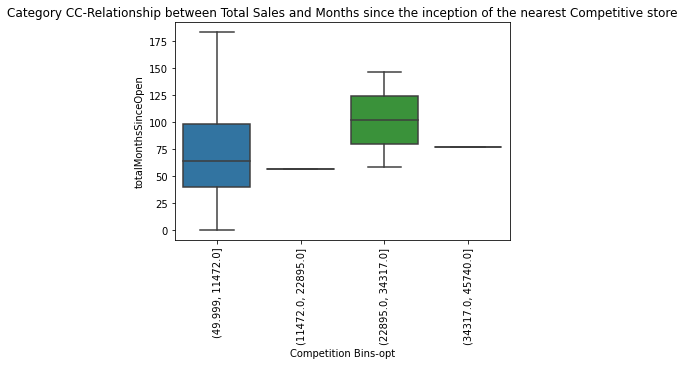

In [67]:
box2=inc_data_cc.merge(store_data_cat_cc[['Store','Competition Bins-opt']],on='Store',how='left')
sns.boxplot(y='totalMonthsSinceOpen',x='Competition Bins-opt',data=box2)
plt.xticks(rotation=90)

plt.title('Category CC-Relationship between Total Sales and Months since the inception of the nearest Competitive store')
plt.show()


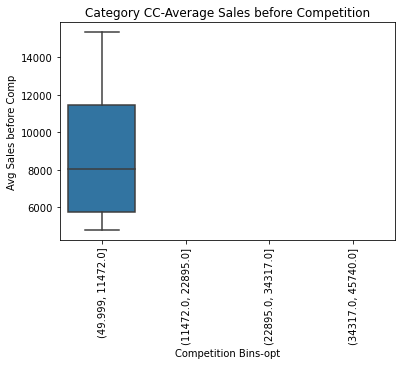

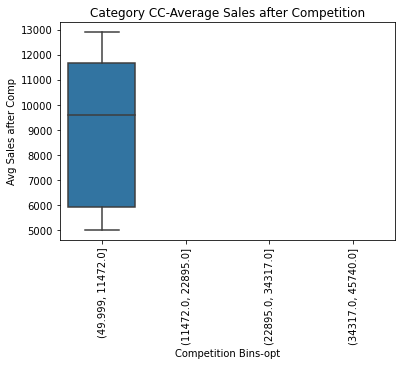

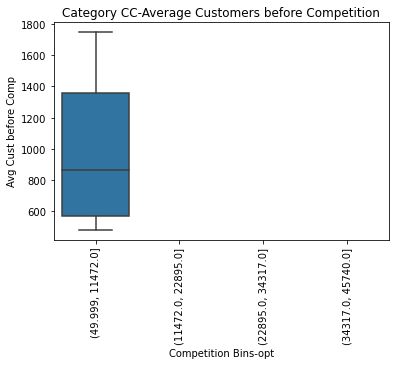

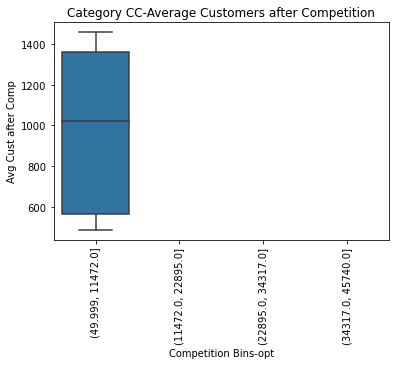

In [68]:
box2=box2.merge(comp_data4[['Store','Date of Inception of Competition']],on='Store',how='left')
timestamp=pd.to_datetime('2013-02-01')

list_comp_cc=box2[box2['Date of Inception of Competition']>=timestamp]['Store'].tolist()
before_comp_sales=[]
after_comp_sales=[]
before_comp_cust=[]
after_comp_cust=[]
for s in list_comp_cc:
    x=box2[box2['Store']==s]
    y=x['Date of Inception of Competition'].tolist()[0]
    level1=main_data[main_data['Store']==s]
    before_avg=level1[level1['Date']<y]['Sales'].mean()
    after_avg=level1[level1['Date']>=y]['Sales'].mean()
    before_comp_sales.append(before_avg)
    after_comp_sales.append(after_avg)
    before_avg_c=level1[level1['Date']<y]['Customers'].mean()
    after_avg_c=level1[level1['Date']>=y]['Customers'].mean()
    before_comp_cust.append(before_avg_c)
    after_comp_cust.append(after_avg_c)
list_comp_cc=pd.DataFrame(list_comp_cc)
list_comp_cc.columns=['Store']
list_comp_cc['Avg Sales before Comp']=before_comp_sales
list_comp_cc['Avg Sales after Comp']=after_comp_sales
list_comp_cc['Avg Cust before Comp']=before_comp_cust
list_comp_cc['Avg Cust after Comp']=after_comp_cust
list_comp_cc=list_comp_cc.merge(box2[['Store','Competition Bins-opt']],on='Store',how='left')
sns.boxplot(y='Avg Sales before Comp',x='Competition Bins-opt',data=list_comp_cc)
plt.xticks(rotation=90)
plt.title('Category CC-Average Sales before Competition')
plt.show()

sns.boxplot(y='Avg Sales after Comp',x='Competition Bins-opt',data=list_comp_cc)
plt.xticks(rotation=90)
plt.title('Category CC-Average Sales after Competition')
plt.show()


sns.boxplot(y='Avg Cust before Comp',x='Competition Bins-opt',data=list_comp_cc)
plt.xticks(rotation=90)
plt.title('Category CC-Average Customers before Competition')
plt.show()

sns.boxplot(y='Avg Cust after Comp',x='Competition Bins-opt',data=list_comp_cc)
plt.xticks(rotation=90)
plt.title('Category CC-Average Customers after Competition')
plt.show()
    

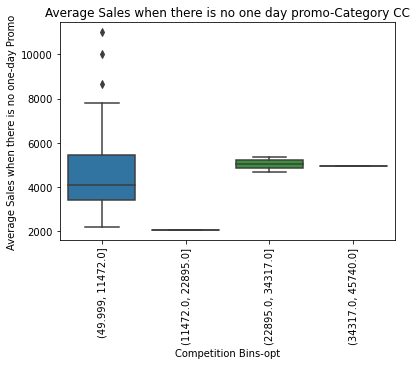

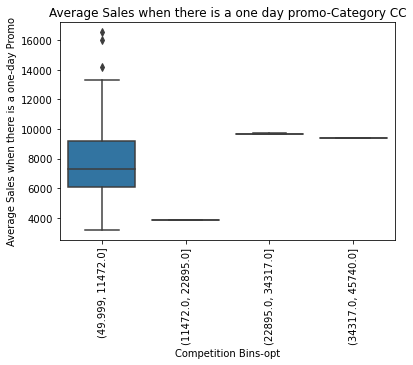

In [69]:
sns.boxplot(y='Average Sales when there is no one-day Promo',x='Competition Bins-opt',data=store_data_cat_cc)
plt.xticks(rotation=90)
plt.title('Average Sales when there is no one day promo-Category CC')
plt.show()

sns.boxplot(y='Average Sales when there is a one-day Promo',x='Competition Bins-opt',data=store_data_cat_cc)
plt.xticks(rotation=90)
plt.title('Average Sales when there is a one day promo-Category CC')
plt.show()




In [72]:
cc_promo=store_data_cat_cc[store_data_cat_cc['Promo2']==1]
cc_promo['Promo2SinceWeek-EG']=cc_promo['Promo2SinceWeek'].astype(str)
cc_promo['Promo2SinceYear-EG']=cc_promo['Promo2SinceYear'].astype(str)
cc_promo['Promo2SinceDate']=cc_promo['Promo2SinceYear-EG']+'-W'+cc_promo['Promo2SinceWeek-EG']
cc_store=cc_promo['Store'].tolist()
import datetime
Since_Date=[]
for t in cc_promo['Promo2SinceDate'].tolist():
    eg=datetime.datetime.strptime(t+'-1','%Y-W%W-%w')
    Since_Date.append(eg)
Since_date=pd.DataFrame(Since_Date)
Since_date['Store']=cc_store
Since_date.columns=['Promo2Date','Store']

year_2015=[]
for i in range(31):
    x=2015
    year_2015.append(x)
cc_promo['y']=year_2015
cc_promo=cc_promo.merge(Since_date,on='Store',how='left')
cc_promo['y']=pd.to_datetime(cc_promo['y'],format='%Y')
cc_promo['MonthsSincePromo2']=cc_promo['y']-cc_promo['Promo2Date']
cc_promo['MonthsSincePromo2']=cc_promo['MonthsSincePromo2']/np.timedelta64(1,'M')
cc_promo.loc[cc_promo.MonthsSincePromo2<0,'MonthsSincePromo2']=0


timestamp=pd.to_datetime('2013-02-01')
list_promo2=cc_promo[cc_promo['Promo2Date']>=timestamp]['Store'].tolist()
before_promo2_sales=[]
after_promo2_sales=[]
before_promo2_cust=[]
after_promo2_cust=[]
for s in list_promo2:
    x=cc_promo[cc_promo['Store']==s]
    y=x['Promo2Date'].tolist()[0]
    level1=main_data[main_data['Store']==s]
    before_avg=level1[level1['Date']<y]['Sales'].mean()
    after_avg=level1[level1['Date']>=y]['Sales'].mean()
    before_promo2_sales.append(before_avg)
    after_promo2_sales.append(after_avg)
    before_avg_c=level1[level1['Date']<y]['Customers'].mean()
    after_avg_c=level1[level1['Date']>=y]['Customers'].mean()
    before_promo2_cust.append(before_avg_c)
    after_promo2_cust.append(after_avg_c)
list_promo2=pd.DataFrame(list_promo2)
list_promo2.columns=['Store']
list_promo2['Avg Sales before Promo2']=before_promo2_sales
list_promo2['Avg Sales after Promo2']=after_promo2_sales
list_promo2['Avg Cust before Promo2']=before_promo2_cust
list_promo2['Avg Cust after Promo2']=after_promo2_cust
list_promo2=list_promo2.merge(box2[['Store','Competition Bins-opt']],on='Store',how='left')
list_promo2
    

<ipython-input-72-b8c1b8f17c87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc_promo['Promo2SinceWeek-EG']=cc_promo['Promo2SinceWeek'].astype(str)
<ipython-input-72-b8c1b8f17c87>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc_promo['Promo2SinceYear-EG']=cc_promo['Promo2SinceYear'].astype(str)
<ipython-input-72-b8c1b8f17c87>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

Store  Avg Sales before Promo2  Avg Sales after Promo2  \
0     232              1752.304348             2820.517755   
1     305              3229.939815             4791.469697   
2     321              4819.284065             5030.919450   
3     361              4346.970588             5220.674009   
4     499              3711.764706             4273.131057   
5     657              4581.690531             5333.176817   
6     708              2865.167689             3850.909492   
7     754              7215.318707             6286.381139   
8     847              5617.361111             5930.271350   
9     861              1672.773196             2972.790533   
10    897              2131.323529             2913.046256   
11   1006              4315.617647             5312.113436   
12   1105              2648.441176             3816.910793   

    Avg Cust before Promo2  Avg Cust after Promo2 Competition Bins-opt  
0               158.507246             254.067583   (11472.0, 22895.0]  
1               331.388889             447.307163    (49.999, 11472.0]  
2               485.459584             484.200393    (49.999, 11472.0]  
3               496.441176             529.320485    (49.999, 11472.0]  
4               546.647059             610.781938                  NaN  
5               615.180139             644.721022    (49.999, 11472.0]  
6               333.065440             358.770419    (49.999, 11472.0]  
7               881.318707             733.705305    (49.999, 11472.0]  
8               833.472222             832.389807                  NaN  
9               270.175258             429.693491                  NaN  
10              250.970588             286.731278    (49.999, 11472.0]  
11              641.735294             720.107930    (49.999, 11472.0]  
12              321.088235             425.551762    (49.999, 11472.0]

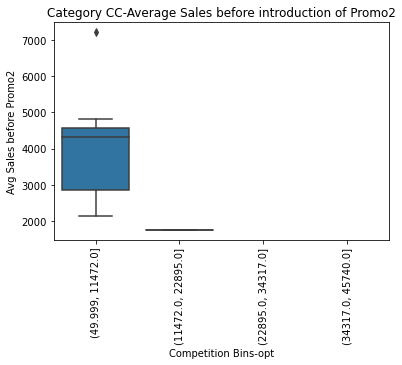

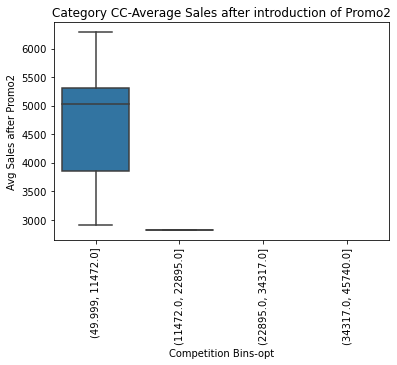

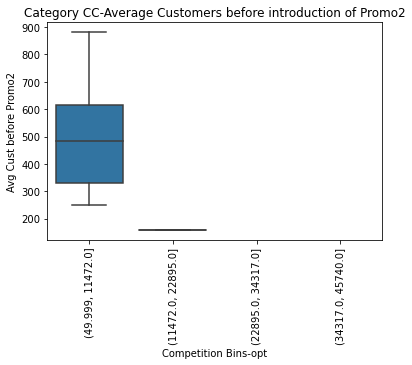

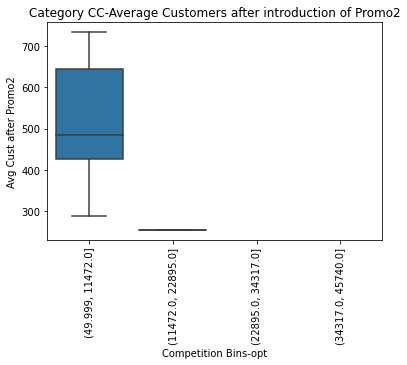

In [73]:
sns.boxplot(y='Avg Sales before Promo2',x='Competition Bins-opt',data=list_promo2)
plt.xticks(rotation=90)
plt.title('Category CC-Average Sales before introduction of Promo2')
plt.show()

sns.boxplot(y='Avg Sales after Promo2',x='Competition Bins-opt',data=list_promo2)
plt.xticks(rotation=90)
plt.title('Category CC-Average Sales after introduction of Promo2')
plt.show()


sns.boxplot(y='Avg Cust before Promo2',x='Competition Bins-opt',data=list_promo2)
plt.xticks(rotation=90)
plt.title('Category CC-Average Customers before introduction of Promo2')
plt.show()

sns.boxplot(y='Avg Cust after Promo2',x='Competition Bins-opt',data=list_promo2)
plt.xticks(rotation=90)
plt.title('Category CC-Average Customers after introduction of Promo2')
plt.show()


**Category AC**

In [74]:
std=[]
min_ac=store_data_cat_ac['CompetitionDistance'].min()
max_ac=store_data_cat_ac['CompetitionDistance'].max()
for i in bin_range:
    bins_ac=np.linspace(min_ac,max_ac,i).astype(int)
    store_data_cat_ac['Competition Bins1']=pd.cut(store_data_cat_ac['CompetitionDistance'],bins=bins_ac,include_lowest=True)
    example=pd.DataFrame(store_data_cat_ac.groupby('Competition Bins1')['Average Sales'].median().fillna(0)).reset_index()
    count=store_data_cat_ac.drop_duplicates(subset=['Competition Bins1'])['Competition Bins1'].count()
    ind=int(round(0.20*count,0))
    if ind==1:
        ind=ind+1
    else:
        ind=ind
    e1=example.iloc[:ind,-1:]
    e2=np.array(e1['Average Sales'])
    std.append(np.std(e2))
bin_range1=pd.DataFrame(bin_range)
bin_range1.columns=['Bin']
bin_range1['StDev']=std
e3=bin_range1['StDev'].max()
e4=bin_range1[bin_range1['StDev']==e3]['Bin'].max()
opt_bins_ac=np.linspace(min_ac,max_ac,e4).astype(int)
store_data_cat_ac['Competition Bins-opt']=pd.cut(store_data_cat_ac['CompetitionDistance'],bins=opt_bins_ac,include_lowest=True)

<ipython-input-74-3af2e3fd97c0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_data_cat_ac['Competition Bins1']=pd.cut(store_data_cat_ac['CompetitionDistance'],bins=bins_ac,include_lowest=True)
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-74-3af2e3fd97c0>:6: SettingWithCop

<function matplotlib.pyplot.show(close=None, block=None)>

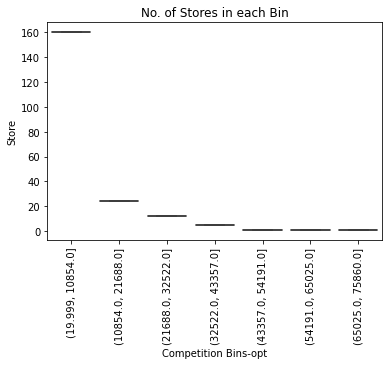

In [75]:
hist_ac=pd.DataFrame(store_data_cat_ac.groupby('Competition Bins-opt')['Store'].count()).reset_index()
hist_ac['Competition Bins-opt']=hist_ac['Competition Bins-opt'].astype(str)
sns.boxplot(y='Store',x='Competition Bins-opt',data=hist_ac)
plt.title('No. of Stores in each Bin')
plt.xticks(rotation=90)
plt.show


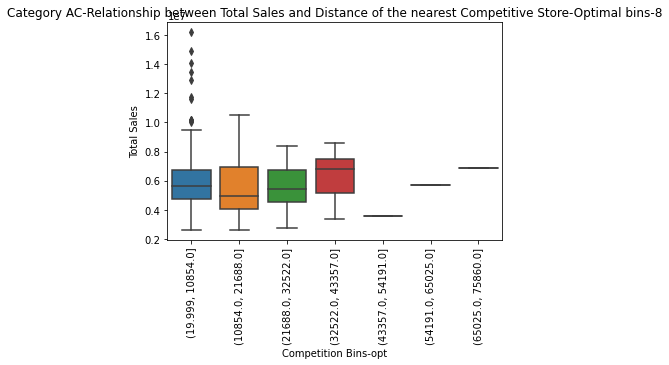

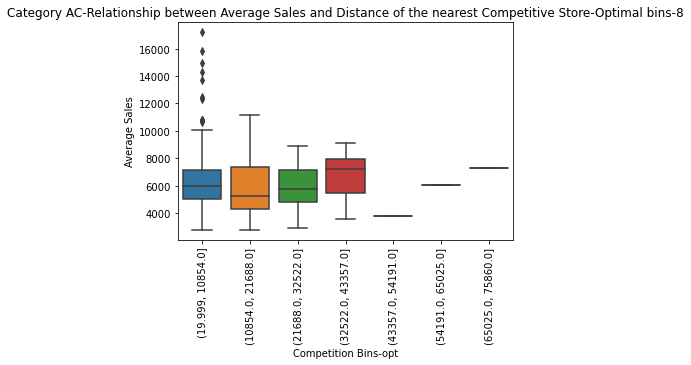

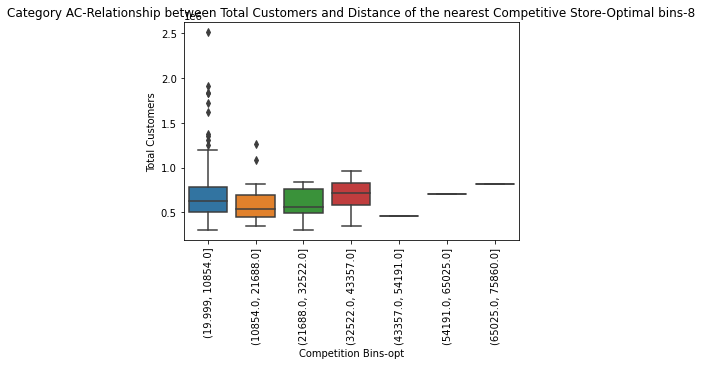

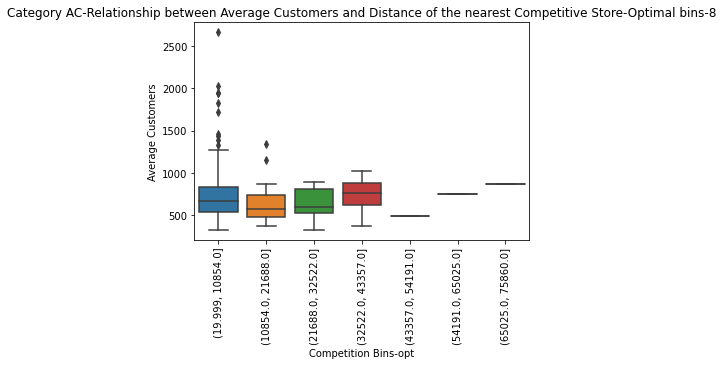

In [76]:
sns.boxplot(y='Total Sales',x='Competition Bins-opt',data=store_data_cat_ac)
plt.xticks(rotation=90)
plt.title('Category AC-Relationship between Total Sales and Distance of the nearest Competitive Store-Optimal bins-'+str(e4))
plt.show()

sns.boxplot(y='Average Sales',x='Competition Bins-opt',data=store_data_cat_ac)
plt.xticks(rotation=90)
plt.title('Category AC-Relationship between Average Sales and Distance of the nearest Competitive Store-Optimal bins-'+str(e4))
plt.show()

sns.boxplot(y='Total Customers',x='Competition Bins-opt',data=store_data_cat_ac)
plt.xticks(rotation=90)
plt.title('Category AC-Relationship between Total Customers and Distance of the nearest Competitive Store-Optimal bins-'+str(e4))
plt.show()

sns.boxplot(y='Average Customers',x='Competition Bins-opt',data=store_data_cat_ac)
plt.xticks(rotation=90)
plt.title('Category AC-Relationship between Average Customers and Distance of the nearest Competitive Store-Optimal bins-'+str(e4))
plt.show()


In [77]:
#based on Average Sales
std=[]
min_inc_ac=inc_data_ac['totalMonthsSinceOpen'].min()
max_inc_ac=inc_data_ac['totalMonthsSinceOpen'].max()
for i in bin_range:
    bins_inc_ac=np.linspace(min_inc_ac,max_inc_ac,i).astype(int)
    inc_data_ac['Competition Bins1']=pd.cut(inc_data_ac['totalMonthsSinceOpen'],bins=bins_inc_ac,include_lowest=True)
    example=pd.DataFrame(inc_data_ac.groupby('Competition Bins1')['Average Sales'].median().fillna(0)).reset_index()
    count=inc_data_ac.drop_duplicates(subset=['Competition Bins1'])['Competition Bins1'].count()
    ind=int(round(0.20*count,0))
    if ind==1:
        ind=ind+1
    else:
        ind=ind
    e1=example.iloc[:ind,-1:]
    e2=np.array(e1['Average Sales'])
    std.append(np.std(e2))
bin_range1=pd.DataFrame(bin_range)
bin_range1.columns=['Bin']
bin_range1['StDev']=std
e3=bin_range1['StDev'].max()
e4=bin_range1[bin_range1['StDev']==e3]['Bin'].max()
opt_bins_ac=np.linspace(min_inc_ac,max_inc_ac,e4).astype(int)
inc_data_ac['Competition Bins-opt2']=pd.cut(inc_data_ac['totalMonthsSinceOpen'],bins=opt_bins_ac,include_lowest=True)

<ipython-input-77-baa162c78f34>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inc_data_ac['Competition Bins1']=pd.cut(inc_data_ac['totalMonthsSinceOpen'],bins=bins_inc_ac,include_lowest=True)
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-77-baa162c78f34>:7: SettingWithCopyWarnin

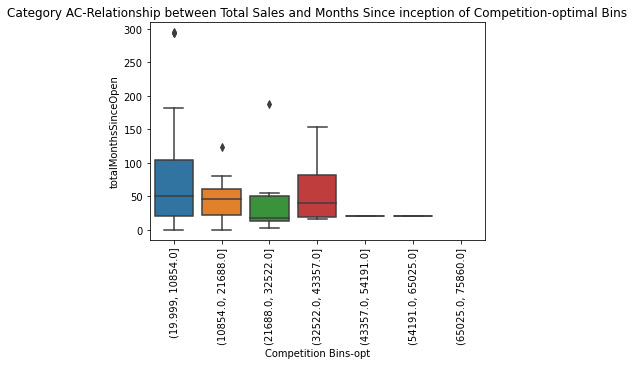

In [78]:
box3=inc_data_ac.merge(store_data_cat_ac[['Store','Competition Bins-opt']],on='Store',how='left')
sns.boxplot(y='totalMonthsSinceOpen',x='Competition Bins-opt',data=box3)
plt.xticks(rotation=90)
plt.title('Category AC-Relationship between Total Sales and Months Since inception of Competition-optimal Bins')
plt.show()


In [79]:
box3=box3.merge(comp_data4[['Store','Date of Inception of Competition']],on='Store',how='left')
timestamp=pd.to_datetime('2013-02-01')
list_comp_ac=box3[box3['Date of Inception of Competition']>=timestamp]['Store'].tolist()
before_comp_sales=[]
after_comp_sales=[]
before_comp_cust=[]
after_comp_cust=[]
for s in list_comp_ac:
    x=box3[box3['Store']==s]
    y=x['Date of Inception of Competition'].tolist()[0]
    level1=main_data[main_data['Store']==s]
    before_avg=level1[level1['Date']<y]['Sales'].mean()
    after_avg=level1[level1['Date']>=y]['Sales'].mean()
    before_comp_sales.append(before_avg)
    after_comp_sales.append(after_avg)
    before_avg_c=level1[level1['Date']<y]['Customers'].mean()
    after_avg_c=level1[level1['Date']>=y]['Customers'].mean()
    before_comp_cust.append(before_avg_c)
    after_comp_cust.append(after_avg_c)
list_comp_ac=pd.DataFrame(list_comp_ac)
list_comp_ac.columns=['Store']
list_comp_ac['Avg Sales before Comp']=before_comp_sales
list_comp_ac['Avg Sales after Comp']=after_comp_sales
list_comp_ac['Avg Cust before Comp']=before_comp_cust
list_comp_ac['Avg Cust after Comp']=after_comp_cust
list_comp_ac=list_comp_ac.merge(box3[['Store','Competition Bins-opt']],on='Store',how='left')
list_comp_ac
    

Store  Avg Sales before Comp  Avg Sales after Comp  Avg Cust before Comp  \
0       7            6443.822222           7453.354460            706.377778   
1      33            7455.408333           6906.945255            736.850000   
2      47            5857.944444           5956.038732            779.388889   
3      53            4277.724280           4417.914163            472.781893   
4      84           10486.124783          11074.597260           1145.183709   
5     110            3603.077778           3791.920188            481.444444   
6     122            4645.766667           6221.553991            570.611111   
7     138            5870.291536           6499.967105            584.874608   
8     166            4972.516484           4662.624230            691.217582   
9     266            3921.457547           3400.218147            467.714623   
10    269            7750.562997           7423.573770           1022.946652   
11    301            4601.297845           4651.725490            499.168568   
12    315            3283.177778           3566.201878            360.833333   
13    355            7427.650943           7668.501370            908.797170   
14    375            6879.548387           7612.463227            593.129032   
15    416            8883.418605           9506.030516           1150.003876   
16    447            4320.637860           4451.017167            516.090535   
17    449            9378.719599           9191.156379           1290.965665   
18    452            4883.504717           4112.565753            453.051887   
19    488            3063.725275           3072.030801            326.643956   
20    524            6816.777778           7348.719599            749.790123   
21    551            5302.514403           5513.650930            814.703704   
22    608            6797.774194           7754.453348            741.870968   
23    647            4563.811111           4831.600939            550.311111   
24    770            5529.095122           4199.500000            629.101220   
25    774            4547.534979           4580.892704            604.716049   
26    788           14512.525424          14978.371461           1413.033898   
27    819            5091.330721           5023.532895            456.708464   
28    837            2676.146341           3396.106557            356.914634   
29    872            7339.261513           6549.670659            704.726974   
30    901            6066.193407           5973.344969            542.430769   
31    918            4282.308537           4381.795082            459.551220   
32    929            4682.650206           4894.630901            591.444444   
33    963            8547.878289           9070.299373            831.756579   
34    967            7933.086420           6872.293276            851.251029   
35   1045            6982.667665           7108.514803            873.562874   
36   1072            5641.474522                   NaN            530.971338   
37   1075            9731.241758           9488.663677            933.952381   
38   1099            7631.655556           7309.565728            902.322222   

    Avg Cust after Comp Competition Bins-opt  
0            800.463615   (21688.0, 32522.0]  
1            684.991484    (19.999, 10854.0]  
2            764.841549    (19.999, 10854.0]  
3            471.264664   (21688.0, 32522.0]  
4           1161.202740   (10854.0, 21688.0]  
5            489.697183   (43357.0, 54191.0]  
6            764.250000   (54191.0, 65025.0]  
7            605.644737   (21688.0, 32522.0]  
8            661.494867    (19.999, 10854.0]  
9            417.320463    (19.999, 10854.0]  
10           947.721311    (19.999, 10854.0]  
11           480.601307    (19.999, 10854.0]  
12           375.575117   (32522.0, 43357.0]  
13           919.231507    (19.999, 10854.0]  
14           629.653128   (10854.0, 21688.0]  
15          1180.598592    (19.999, 10854.0]  
16  

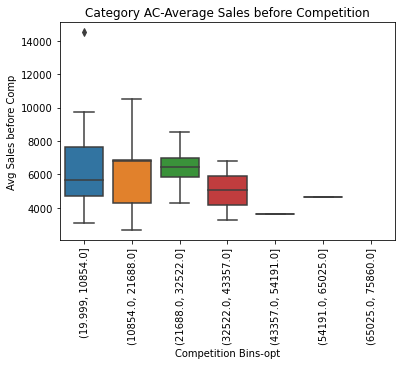

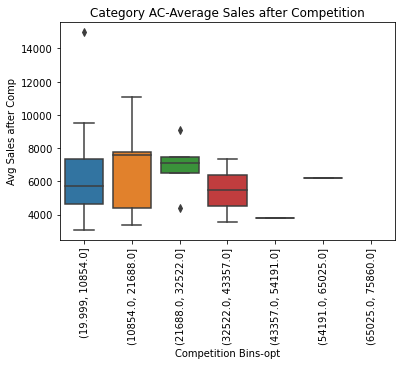

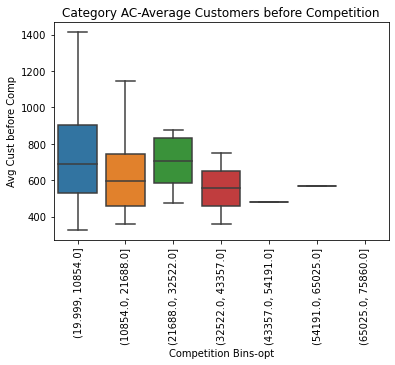

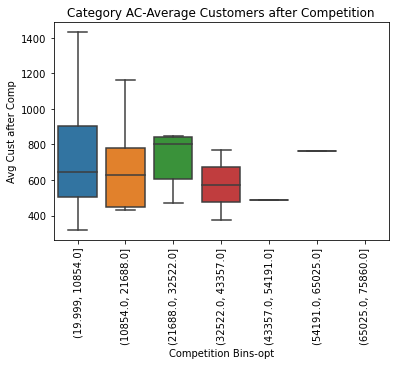

In [80]:
sns.boxplot(y='Avg Sales before Comp',x='Competition Bins-opt',data=list_comp_ac)
plt.xticks(rotation=90)
plt.title('Category AC-Average Sales before Competition')
plt.show()

sns.boxplot(y='Avg Sales after Comp',x='Competition Bins-opt',data=list_comp_ac)
plt.xticks(rotation=90)
plt.title('Category AC-Average Sales after Competition')
plt.show()


sns.boxplot(y='Avg Cust before Comp',x='Competition Bins-opt',data=list_comp_ac)
plt.xticks(rotation=90)
plt.title('Category AC-Average Customers before Competition')
plt.show()

sns.boxplot(y='Avg Cust after Comp',x='Competition Bins-opt',data=list_comp_ac)
plt.xticks(rotation=90)
plt.title('Category AC-Average Customers after Competition')
plt.show()








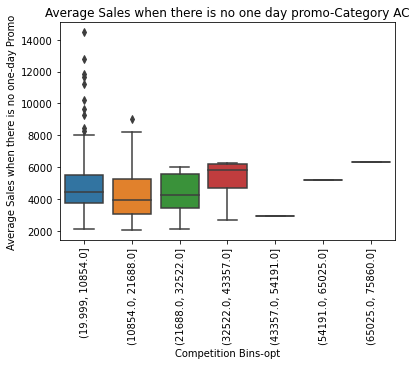

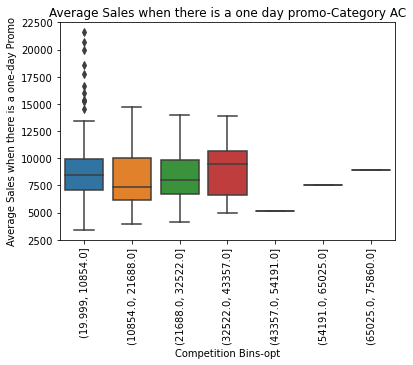

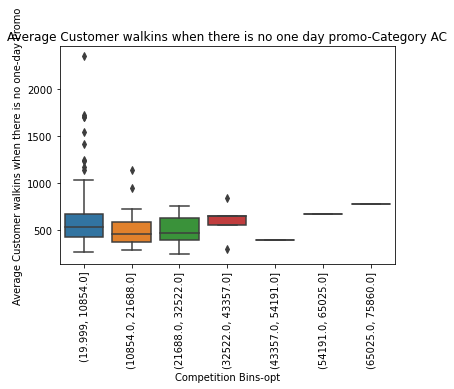

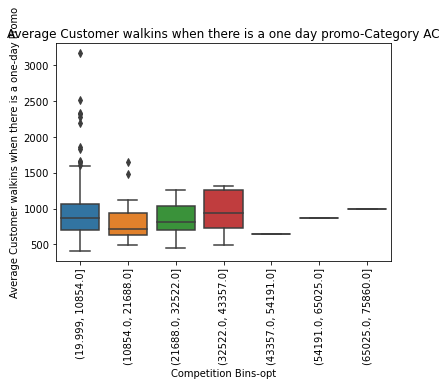

In [81]:
sns.boxplot(y='Average Sales when there is no one-day Promo',x='Competition Bins-opt',data=store_data_cat_ac)
plt.xticks(rotation=90)
plt.title('Average Sales when there is no one day promo-Category AC')
plt.show()

sns.boxplot(y='Average Sales when there is a one-day Promo',x='Competition Bins-opt',data=store_data_cat_ac)
plt.xticks(rotation=90)
plt.title('Average Sales when there is a one day promo-Category AC')
plt.show()

sns.boxplot(y='Average Customer walkins when there is no one-day Promo',x='Competition Bins-opt',data=store_data_cat_ac)
plt.xticks(rotation=90)
plt.title('Average Customer walkins when there is no one day promo-Category AC')
plt.show()

sns.boxplot(y='Average Customer walkins when there is a one-day Promo',x='Competition Bins-opt',data=store_data_cat_ac)
plt.xticks(rotation=90)
plt.title('Average Customer walkins when there is a one day promo-Category AC')
plt.show()



In [82]:
ac_promo=store_data_cat_ac[store_data_cat_ac['Promo2']==1]
ac_promo['Promo2SinceWeek-EG']=ac_promo['Promo2SinceWeek'].astype(str)
ac_promo['Promo2SinceYear-EG']=ac_promo['Promo2SinceYear'].astype(str)
ac_promo['Promo2SinceDate']=ac_promo['Promo2SinceYear-EG']+'-W'+ac_promo['Promo2SinceWeek-EG']
ac_store=ac_promo['Store'].tolist()
import datetime
Since_Date=[]
for t in ac_promo['Promo2SinceDate'].tolist():
    eg=datetime.datetime.strptime(t+'-1','%Y-W%W-%w')
    Since_Date.append(eg)
Since_date=pd.DataFrame(Since_Date)
Since_date['Store']=ac_store
Since_date.columns=['Promo2Date','Store']


year_2015=[]
for i in range(89):
    x=2015
    year_2015.append(x)
ac_promo['y']=year_2015
ac_promo=ac_promo.merge(Since_date,on='Store',how='left')
ac_promo['y']=pd.to_datetime(ac_promo['y'],format='%Y')
ac_promo['MonthsSincePromo2']=ac_promo['y']-ac_promo['Promo2Date']
ac_promo['MonthsSincePromo2']=ac_promo['MonthsSincePromo2']/np.timedelta64(1,'M')
ac_promo.loc[ac_promo.MonthsSincePromo2<0,'MonthsSincePromo2']=0

promofinal=pd.DataFrame(main_data.groupby(['Store','Year of Sale','Month of Sale'])['Sales'].mean()).reset_index()
promofinal_1=pd.DataFrame(main_data.groupby(['Store','Year of Sale','Month of Sale'])['Customers'].mean()).reset_index()
promofinal1=promofinal.merge(promofinal_cat,on=['Store','Year of Sale','Month of Sale'],how='right')
promofinal1=promofinal1.merge(promofinal_1,on=['Store','Year of Sale','Month of Sale'],how='left')
ac_promo_list=ac_promo['Store'].tolist()
promofinal2=promofinal1[promofinal1['Store'].isin(ac_promo_list)]

promofinal2=promofinal2.merge(ac_promo[['Store','Competition Bins-opt']],on='Store',how='left')
promofinal2=promofinal2[['Store','Year of Sale','Month of Sale','Sales','Date','Customers','Competition Bins-opt']]



<ipython-input-82-1b36724ee553>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ac_promo['Promo2SinceWeek-EG']=ac_promo['Promo2SinceWeek'].astype(str)
<ipython-input-82-1b36724ee553>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ac_promo['Promo2SinceYear-EG']=ac_promo['Promo2SinceYear'].astype(str)
<ipython-input-82-1b36724ee553>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

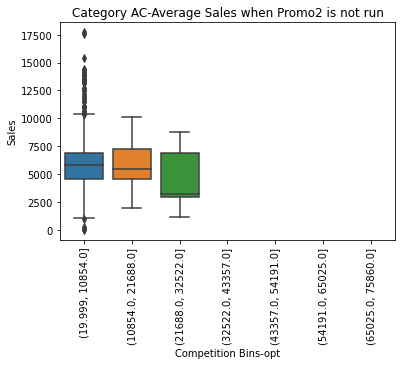

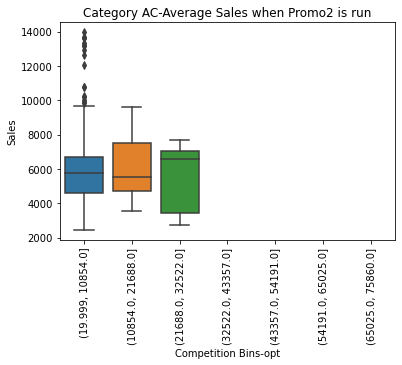

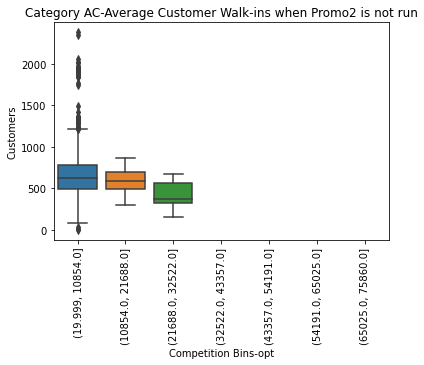

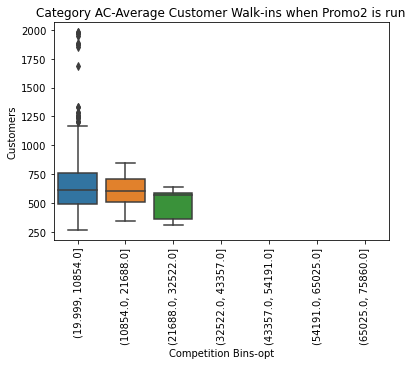

In [83]:
sns.boxplot(y=promofinal2[promofinal2['Date']==0]['Sales'],x=promofinal2[promofinal2['Date']==0]['Competition Bins-opt'],data=promofinal2)
plt.xticks(rotation=90)
plt.title('Category AC-Average Sales when Promo2 is not run')
plt.show()


sns.boxplot(y=promofinal2[promofinal2['Date']>0]['Sales'],x=promofinal2[promofinal2['Date']>0]['Competition Bins-opt'],data=promofinal2)
plt.xticks(rotation=90)
plt.title('Category AC-Average Sales when Promo2 is run')
plt.show()


sns.boxplot(y=promofinal2[promofinal2['Date']==0]['Customers'],x=promofinal2[promofinal2['Date']==0]['Competition Bins-opt'],data=promofinal2)
plt.xticks(rotation=90)
plt.title('Category AC-Average Customer Walk-ins when Promo2 is not run')
plt.show()


sns.boxplot(y=promofinal2[promofinal2['Date']>0]['Customers'],x=promofinal2[promofinal2['Date']>0]['Competition Bins-opt'],data=promofinal2)
plt.xticks(rotation=90)
plt.title('Category AC-Average Customer Walk-ins when Promo2 is run')
plt.show()



**Category DC**

In [84]:
#Based on Total Customers
std=[]
min_dc=store_data_cat_dc['CompetitionDistance'].min()
max_dc=store_data_cat_dc['CompetitionDistance'].max()
for i in bin_range:
    bins_dc=np.linspace(min_dc,max_dc,i).astype(int)
    store_data_cat_dc['Competition Bins1']=pd.cut(store_data_cat_dc['CompetitionDistance'],bins=bins_dc,include_lowest=True)
    example=pd.DataFrame(store_data_cat_dc.groupby('Competition Bins1')['Total Customers'].median().fillna(0)).reset_index()
    count=store_data_cat_dc.drop_duplicates(subset=['Competition Bins1'])['Competition Bins1'].count()
    ind=int(round(0.20*count,0))
    if ind==1:
        ind=ind+1
    else:
        ind=ind
    e1=example.iloc[:ind,-1:]
    e2=np.array(e1['Total Customers'])
    std.append(np.std(e2))
bin_range1=pd.DataFrame(bin_range)
bin_range1.columns=['Bin']
bin_range1['StDev']=std
e3=bin_range1['StDev'].max()
e4_3=bin_range1[bin_range1['StDev']==e3]['Bin'].max()
opt3_bins_dc=np.linspace(min_dc,max_dc,e4_3).astype(int)
store_data_cat_dc['Competition Bins-cust1']=pd.cut(store_data_cat_dc['CompetitionDistance'],bins=opt3_bins_dc,include_lowest=True)
print(e4_3)

7


<ipython-input-84-b6988f070959>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_data_cat_dc['Competition Bins1']=pd.cut(store_data_cat_dc['CompetitionDistance'],bins=bins_dc,include_lowest=True)
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-84-b6988f070959>:7: SettingWithCop

<function matplotlib.pyplot.show(close=None, block=None)>

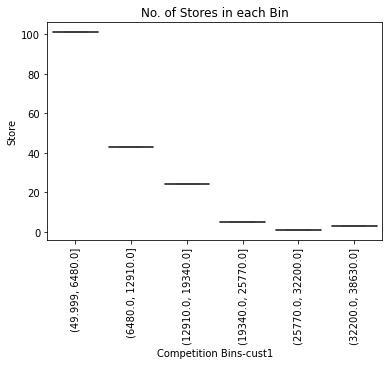

In [85]:
hist_dc=pd.DataFrame(store_data_cat_dc.groupby('Competition Bins-cust1')['Store'].count()).reset_index()
hist_dc['Competition Bins-cust1']=hist_dc['Competition Bins-cust1'].astype(str)
sns.boxplot(y='Store',x='Competition Bins-cust1',data=hist_dc)
plt.title('No. of Stores in each Bin')
plt.xticks(rotation=90)
plt.show


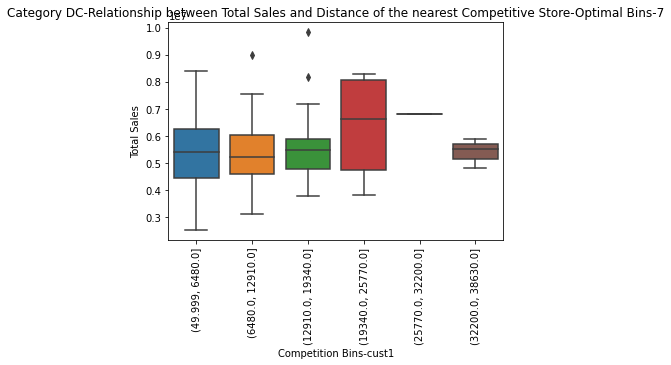

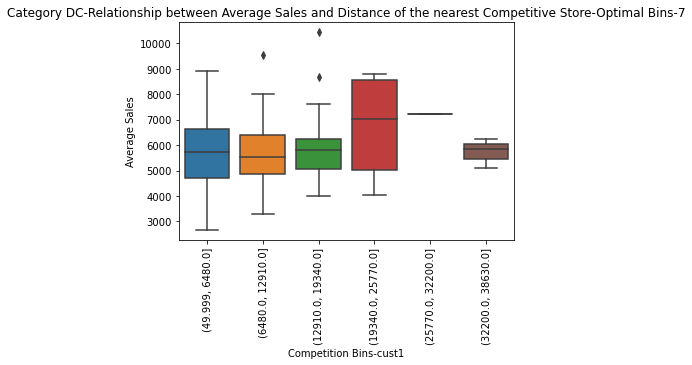

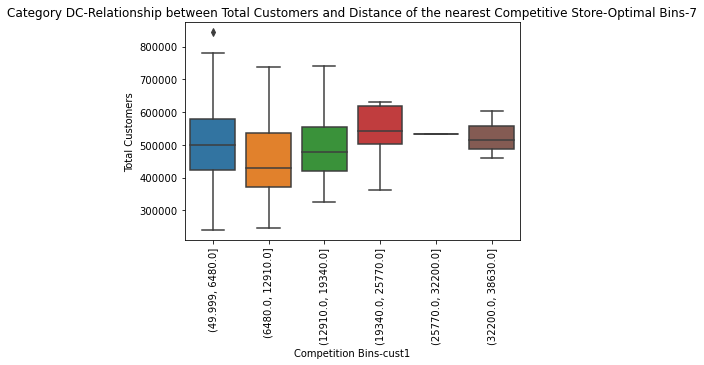

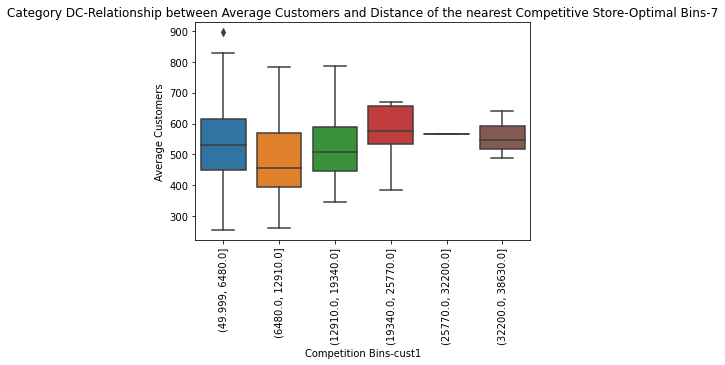

In [86]:
sns.boxplot(y='Total Sales',x='Competition Bins-cust1',data=store_data_cat_dc)
plt.xticks(rotation=90)
plt.title('Category DC-Relationship between Total Sales and Distance of the nearest Competitive Store-Optimal Bins-'+str(e4_3))
plt.show()

sns.boxplot(y='Average Sales',x='Competition Bins-cust1',data=store_data_cat_dc)
plt.xticks(rotation=90)
plt.title('Category DC-Relationship between Average Sales and Distance of the nearest Competitive Store-Optimal Bins-'+str(e4_3))
plt.show()

sns.boxplot(y='Total Customers',x='Competition Bins-cust1',data=store_data_cat_dc)
plt.xticks(rotation=90)
plt.title('Category DC-Relationship between Total Customers and Distance of the nearest Competitive Store-Optimal Bins-'+str(e4_3))
plt.show()

sns.boxplot(y='Average Customers',x='Competition Bins-cust1',data=store_data_cat_dc)
plt.xticks(rotation=90)
plt.title('Category DC-Relationship between Average Customers and Distance of the nearest Competitive Store-Optimal Bins-'+str(e4_3))
plt.show()



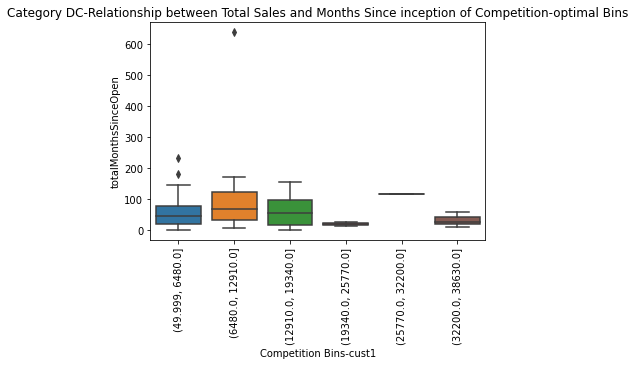

In [87]:
box_dc=inc_data_dc.merge(store_data_cat_dc[['Store','Competition Bins-cust1']],on='Store',how='left')
sns.boxplot(y='totalMonthsSinceOpen',x='Competition Bins-cust1',data=box_dc)
plt.xticks(rotation=90)
plt.title('Category DC-Relationship between Total Sales and Months Since inception of Competition-optimal Bins')
plt.show()


In [88]:
box_dc=box_dc.merge(comp_data4[['Store','Date of Inception of Competition']],on='Store',how='left')
timestamp=pd.to_datetime('2013-02-01')
list_comp=box_dc[box_dc['Date of Inception of Competition']>=timestamp]['Store'].tolist()
before_comp_sales=[]
after_comp_sales=[]
before_comp_cust=[]
after_comp_cust=[]
for s in list_comp:
    x=box_dc[box_dc['Store']==s]
    y=x['Date of Inception of Competition'].tolist()[0]
    level1=main_data[main_data['Store']==s]
    before_avg=level1[level1['Date']<y]['Sales'].mean()
    after_avg=level1[level1['Date']>=y]['Sales'].mean()
    before_comp_sales.append(before_avg)
    after_comp_sales.append(after_avg)
    before_avg_c=level1[level1['Date']<y]['Customers'].mean()
    after_avg_c=level1[level1['Date']>=y]['Customers'].mean()
    before_comp_cust.append(before_avg_c)
    after_comp_cust.append(after_avg_c)
list_comp=pd.DataFrame(list_comp)
list_comp.columns=['Store']
list_comp['Avg Sales before Comp']=before_comp_sales
list_comp['Avg Sales after Comp']=after_comp_sales
list_comp['Avg Cust before Comp']=before_comp_cust
list_comp['Avg Cust after Comp']=after_comp_cust
list_comp=list_comp.merge(box_dc[['Store','Competition Bins-cust1']],on='Store',how='left')


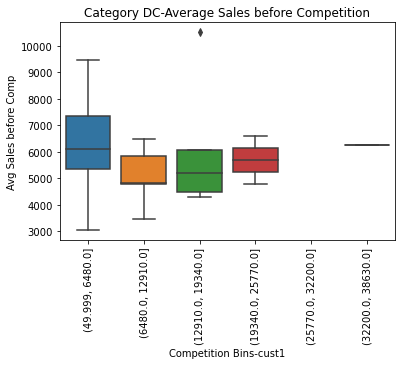

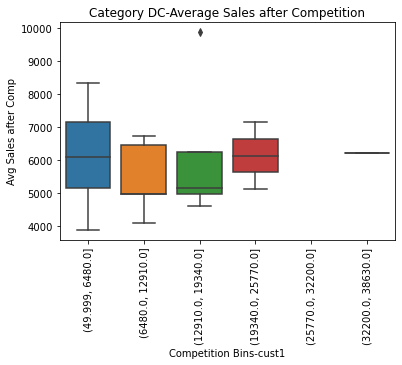

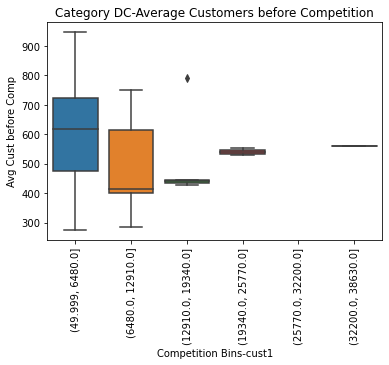

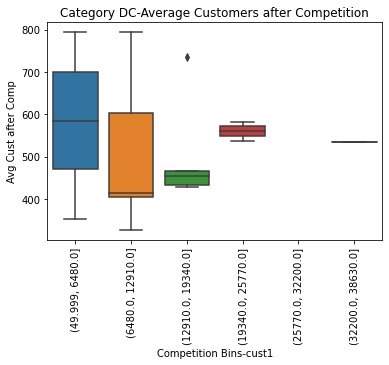

In [89]:
sns.boxplot(y='Avg Sales before Comp',x='Competition Bins-cust1',data=list_comp)
plt.xticks(rotation=90)
plt.title('Category DC-Average Sales before Competition')
plt.show()

sns.boxplot(y='Avg Sales after Comp',x='Competition Bins-cust1',data=list_comp)
plt.xticks(rotation=90)
plt.title('Category DC-Average Sales after Competition')
plt.show()


sns.boxplot(y='Avg Cust before Comp',x='Competition Bins-cust1',data=list_comp)
plt.xticks(rotation=90)
plt.title('Category DC-Average Customers before Competition')
plt.show()

sns.boxplot(y='Avg Cust after Comp',x='Competition Bins-cust1',data=list_comp)
plt.xticks(rotation=90)
plt.title('Category DC-Average Customers after Competition')
plt.show()



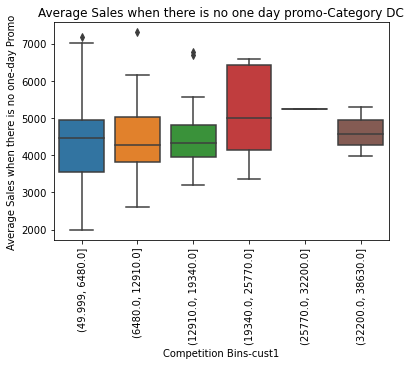

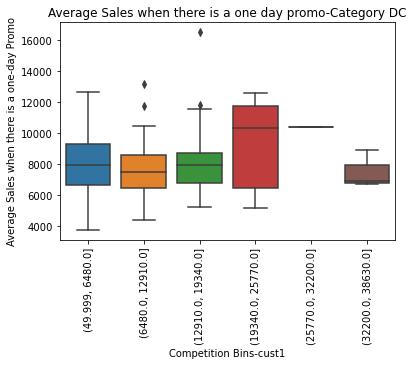

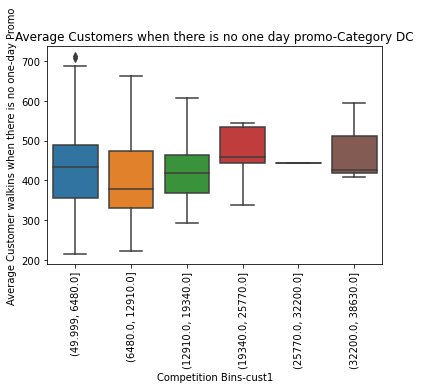

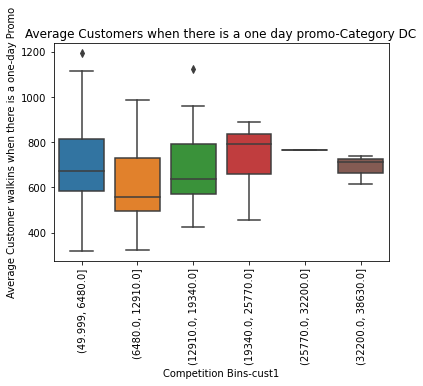

In [90]:
sns.boxplot(y='Average Sales when there is no one-day Promo',x='Competition Bins-cust1',data=store_data_cat_dc)
plt.xticks(rotation=90)
plt.title('Average Sales when there is no one day promo-Category DC')
plt.show()

sns.boxplot(y='Average Sales when there is a one-day Promo',x='Competition Bins-cust1',data=store_data_cat_dc)
plt.xticks(rotation=90)
plt.title('Average Sales when there is a one day promo-Category DC')
plt.show()

sns.boxplot(y='Average Customer walkins when there is no one-day Promo',x='Competition Bins-cust1',data=store_data_cat_dc)
plt.xticks(rotation=90)
plt.title('Average Customers when there is no one day promo-Category DC')
plt.show()

sns.boxplot(y='Average Customer walkins when there is a one-day Promo',x='Competition Bins-cust1',data=store_data_cat_dc)
plt.xticks(rotation=90)
plt.title('Average Customers when there is a one day promo-Category DC')
plt.show()


In [91]:
dc_promo=store_data_cat_dc[store_data_cat_dc['Promo2']==1]
dc_promo['Promo2SinceWeek-EG']=dc_promo['Promo2SinceWeek'].astype(str)
dc_promo['Promo2SinceYear-EG']=dc_promo['Promo2SinceYear'].astype(str)
dc_promo['Promo2SinceDate']=dc_promo['Promo2SinceYear-EG']+'-W'+dc_promo['Promo2SinceWeek-EG']
dc_store=dc_promo['Store'].tolist()
import datetime
Since_Date=[]
for t in dc_promo['Promo2SinceDate'].tolist():
    eg=datetime.datetime.strptime(t+'-1','%Y-W%W-%w')
    Since_Date.append(eg)
Since_date=pd.DataFrame(Since_Date)
Since_date['Store']=dc_store
Since_date.columns=['Promo2Date','Store']

year_2015=[]
for i in range(92):
    x=2015
    year_2015.append(x)
dc_promo['y']=year_2015
dc_promo=dc_promo.merge(Since_date,on='Store',how='left')
dc_promo['y']=pd.to_datetime(dc_promo['y'],format='%Y')
dc_promo['MonthsSincePromo2']=dc_promo['y']-dc_promo['Promo2Date']
dc_promo['MonthsSincePromo2']=dc_promo['MonthsSincePromo2']/np.timedelta64(1,'M')
dc_promo.loc[dc_promo.MonthsSincePromo2<0,'MonthsSincePromo2']=0

timestamp=pd.to_datetime('2013-02-01')
list_promo2=dc_promo[dc_promo['Promo2Date']>=timestamp]['Store'].tolist()
before_promo2_sales=[]
after_promo2_sales=[]
before_promo2_cust=[]
after_promo2_cust=[]
for s in list_promo2:
    x=dc_promo[dc_promo['Store']==s]
    y=x['Promo2Date'].tolist()[0]
    level1=main_data[main_data['Store']==s]
    before_avg=level1[level1['Date']<y]['Sales'].mean()
    after_avg=level1[level1['Date']>=y]['Sales'].mean()
    before_promo2_sales.append(before_avg)
    after_promo2_sales.append(after_avg)
    before_avg_c=level1[level1['Date']<y]['Customers'].mean()
    after_avg_c=level1[level1['Date']>=y]['Customers'].mean()
    before_promo2_cust.append(before_avg_c)
    after_promo2_cust.append(after_avg_c)
list_promo2=pd.DataFrame(list_promo2)
list_promo2.columns=['Store']
list_promo2['Avg Sales before Promo2']=before_promo2_sales
list_promo2['Avg Sales after Promo2']=after_promo2_sales
list_promo2['Avg Cust before Promo2']=before_promo2_cust
list_promo2['Avg Cust after Promo2']=after_promo2_cust
list_promo2=list_promo2.merge(box_dc[['Store','Competition Bins-cust1']],on='Store',how='left')


<ipython-input-91-072878e22bc2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc_promo['Promo2SinceWeek-EG']=dc_promo['Promo2SinceWeek'].astype(str)
<ipython-input-91-072878e22bc2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc_promo['Promo2SinceYear-EG']=dc_promo['Promo2SinceYear'].astype(str)
<ipython-input-91-072878e22bc2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

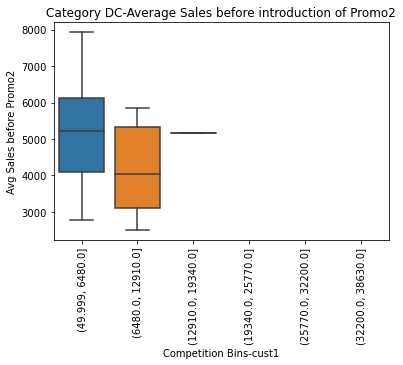

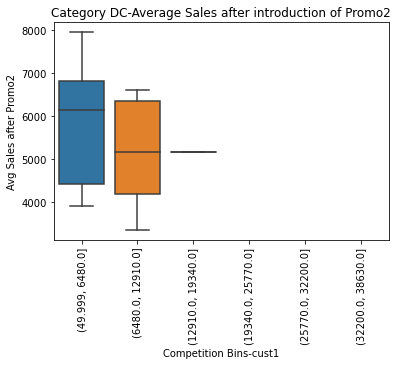

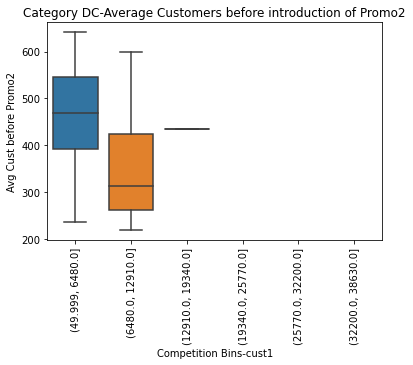

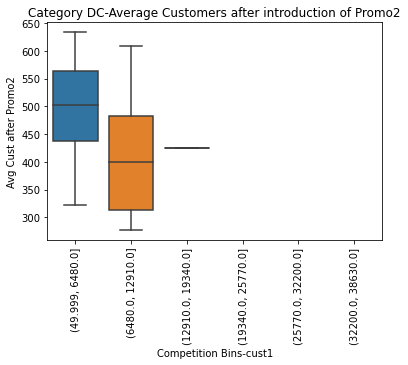

In [92]:
sns.boxplot(y='Avg Sales before Promo2',x='Competition Bins-cust1',data=list_promo2)
plt.xticks(rotation=90)
plt.title('Category DC-Average Sales before introduction of Promo2')
plt.show()

sns.boxplot(y='Avg Sales after Promo2',x='Competition Bins-cust1',data=list_promo2)
plt.xticks(rotation=90)
plt.title('Category DC-Average Sales after introduction of Promo2')
plt.show()


sns.boxplot(y='Avg Cust before Promo2',x='Competition Bins-cust1',data=list_promo2)
plt.xticks(rotation=90)
plt.title('Category DC-Average Customers before introduction of Promo2')
plt.show()

sns.boxplot(y='Avg Cust after Promo2',x='Competition Bins-cust1',data=list_promo2)
plt.xticks(rotation=90)
plt.title('Category DC-Average Customers after introduction of Promo2')
plt.show()


**Store Category DA**

In [93]:
std=[]
min_da=store_data_cat_da['CompetitionDistance'].min()
max_da=store_data_cat_da['CompetitionDistance'].max()
for i in bin_range:
    bins_da=np.linspace(min_da,max_da,i).astype(int)
    store_data_cat_da['Competition Bins1']=pd.cut(store_data_cat_da['CompetitionDistance'],bins=bins_da,include_lowest=True)
    example=pd.DataFrame(store_data_cat_da.groupby('Competition Bins1')['Average Sales'].median().fillna(0)).reset_index()
    count=store_data_cat_da.drop_duplicates(subset=['Competition Bins1'])['Competition Bins1'].count()
    ind=int(round(0.20*count,0))
    if ind==1:
        ind=ind+1
    else:
        ind=ind
    e1=example.iloc[:ind,-1:]
    e2=np.array(e1['Average Sales'])
    std.append(np.std(e2))
bin_range1=pd.DataFrame(bin_range)
bin_range1.columns=['Bin']
bin_range1['StDev']=std
e3=bin_range1['StDev'].max()
e4=bin_range1[bin_range1['StDev']==e3]['Bin'].max()
opt_bins_da=np.linspace(min_da,max_da,e4).astype(int)
store_data_cat_da['Competition Bins-opt']=pd.cut(store_data_cat_da['CompetitionDistance'],bins=opt_bins_da,include_lowest=True)

<ipython-input-93-0faf436e5d2b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_data_cat_da['Competition Bins1']=pd.cut(store_data_cat_da['CompetitionDistance'],bins=bins_da,include_lowest=True)
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-93-0faf436e5d2b>:6: SettingWithCop

<function matplotlib.pyplot.show(close=None, block=None)>

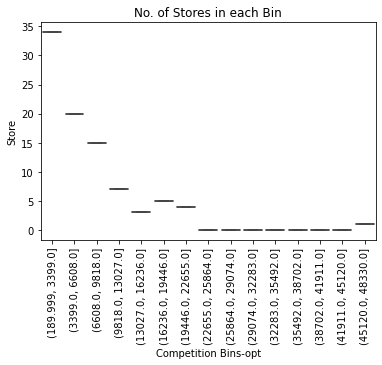

In [94]:
hist_da=pd.DataFrame(store_data_cat_da.groupby('Competition Bins-opt')['Store'].count()).reset_index()
hist_da['Competition Bins-opt']=hist_da['Competition Bins-opt'].astype(str)
sns.boxplot(y='Store',x='Competition Bins-opt',data=hist_da)
plt.title('No. of Stores in each Bin')
plt.xticks(rotation=90)
plt.show


In [95]:
#Based on Total Customers
std=[]
min_da=store_data_cat_da['CompetitionDistance'].min()
max_da=store_data_cat_da['CompetitionDistance'].max()
for i in bin_range:
    bins_da=np.linspace(min_da,max_da,i).astype(int)
    store_data_cat_da['Competition Bins1']=pd.cut(store_data_cat_da['CompetitionDistance'],bins=bins_da,include_lowest=True)
    example=pd.DataFrame(store_data_cat_da.groupby('Competition Bins1')['Total Customers'].median().fillna(0)).reset_index()
    count=store_data_cat_da.drop_duplicates(subset=['Competition Bins1'])['Competition Bins1'].count()
    ind=int(round(0.20*count,0))
    if ind==1:
        ind=ind+1
    else:
        ind=ind
    e1=example.iloc[:ind,-1:]
    e2=np.array(e1['Total Customers'])
    std.append(np.std(e2))
bin_range1=pd.DataFrame(bin_range)
bin_range1.columns=['Bin']
bin_range1['StDev']=std
e3=bin_range1['StDev'].max()
e4_3=bin_range1[bin_range1['StDev']==e3]['Bin'].max()
opt3_bins_da=np.linspace(min_da,max_da,e4_3).astype(int)
store_data_cat_da['Competition Bins-cust1']=pd.cut(store_data_cat_da['CompetitionDistance'],bins=opt3_bins_da,include_lowest=True)
print(e4_3)

5


<ipython-input-95-9312ab0b83d7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_data_cat_da['Competition Bins1']=pd.cut(store_data_cat_da['CompetitionDistance'],bins=bins_da,include_lowest=True)
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-95-9312ab0b83d7>:7: SettingWithCop

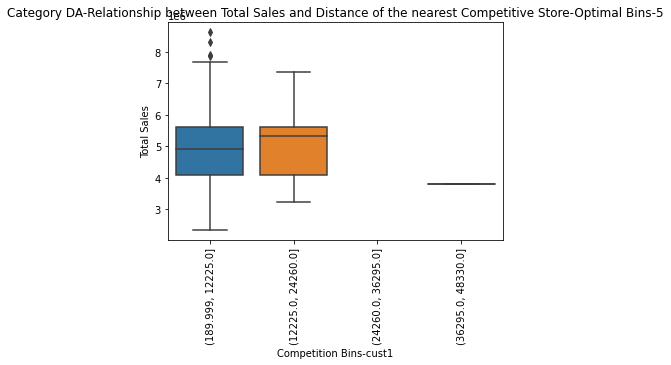

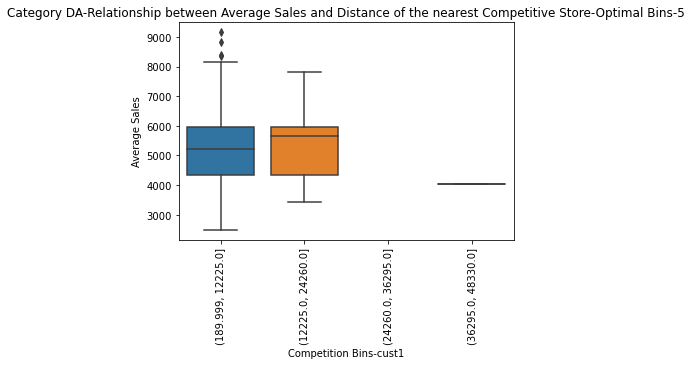

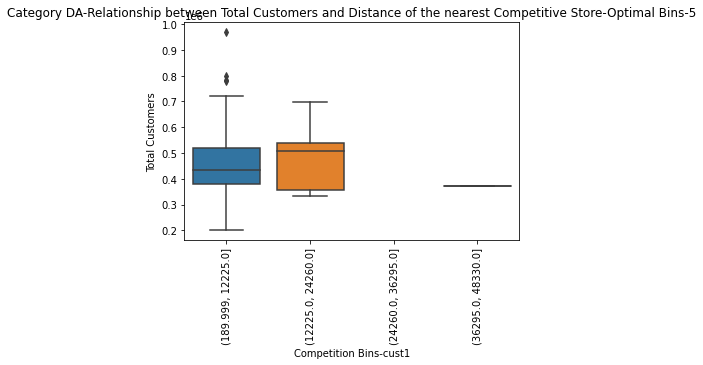

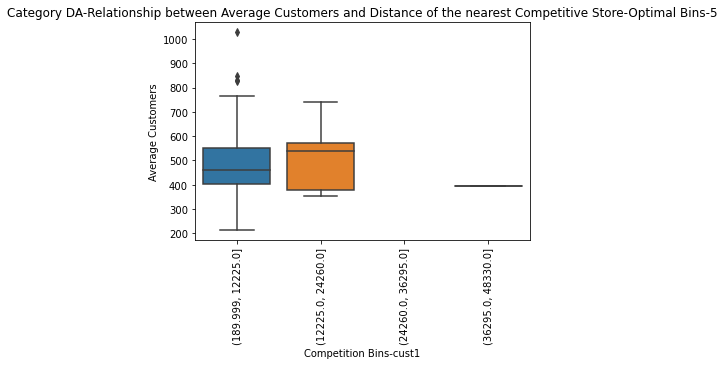

In [96]:
sns.boxplot(y='Total Sales',x='Competition Bins-cust1',data=store_data_cat_da)
plt.xticks(rotation=90)
plt.title('Category DA-Relationship between Total Sales and Distance of the nearest Competitive Store-Optimal Bins-'+str(e4_3))
plt.show()

sns.boxplot(y='Average Sales',x='Competition Bins-cust1',data=store_data_cat_da)
plt.xticks(rotation=90)
plt.title('Category DA-Relationship between Average Sales and Distance of the nearest Competitive Store-Optimal Bins-'+str(e4_3))
plt.show()

sns.boxplot(y='Total Customers',x='Competition Bins-cust1',data=store_data_cat_da)
plt.xticks(rotation=90)
plt.title('Category DA-Relationship between Total Customers and Distance of the nearest Competitive Store-Optimal Bins-'+str(e4_3))
plt.show()

sns.boxplot(y='Average Customers',x='Competition Bins-cust1',data=store_data_cat_da)
plt.xticks(rotation=90)
plt.title('Category DA-Relationship between Average Customers and Distance of the nearest Competitive Store-Optimal Bins-'+str(e4_3))
plt.show()



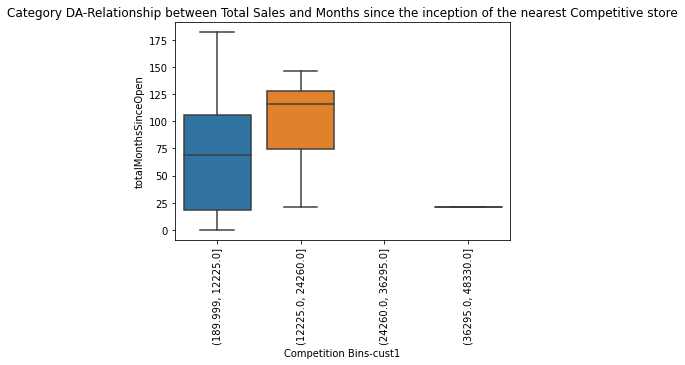

In [97]:
box_da=inc_data_da.merge(store_data_cat_da[['Store','Competition Bins-cust1']],on='Store',how='left')
sns.boxplot(y='totalMonthsSinceOpen',x='Competition Bins-cust1',data=box_da)
plt.xticks(rotation=90)
plt.title('Category DA-Relationship between Total Sales and Months since the inception of the nearest Competitive store')
plt.show()


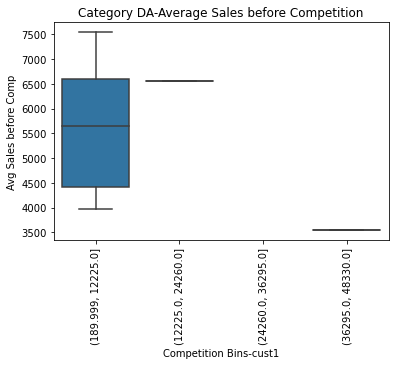

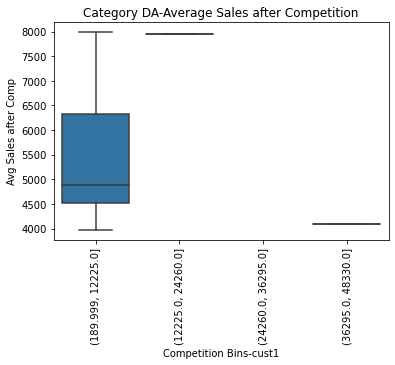

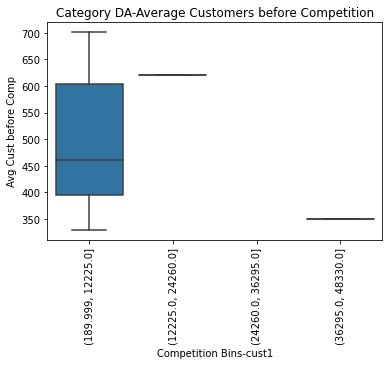

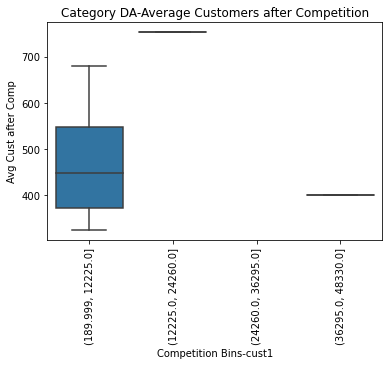

In [98]:
box_da=box_da.merge(comp_data4[['Store','Date of Inception of Competition']],on='Store',how='left')

timestamp=pd.to_datetime('2013-02-01')
list_comp1=box_da[box_da['Date of Inception of Competition']>=timestamp]['Store'].tolist()
before_comp_sales=[]
after_comp_sales=[]
before_comp_cust=[]
after_comp_cust=[]
for s in list_comp1:
    x=box_da[box_da['Store']==s]
    y=x['Date of Inception of Competition'].tolist()[0]
    level1=main_data[main_data['Store']==s]
    before_avg=level1[level1['Date']<y]['Sales'].mean()
    after_avg=level1[level1['Date']>=y]['Sales'].mean()
    before_comp_sales.append(before_avg)
    after_comp_sales.append(after_avg)
    before_avg_c=level1[level1['Date']<y]['Customers'].mean()
    after_avg_c=level1[level1['Date']>=y]['Customers'].mean()
    before_comp_cust.append(before_avg_c)
    after_comp_cust.append(after_avg_c)
list_comp1=pd.DataFrame(list_comp1)
list_comp1.columns=['Store']
list_comp1['Avg Sales before Comp']=before_comp_sales
list_comp1['Avg Sales after Comp']=after_comp_sales
list_comp1['Avg Cust before Comp']=before_comp_cust
list_comp1['Avg Cust after Comp']=after_comp_cust
list_comp1=list_comp1.merge(box_da[['Store','Competition Bins-cust1']],on='Store',how='left')
sns.boxplot(y='Avg Sales before Comp',x='Competition Bins-cust1',data=list_comp1)
plt.xticks(rotation=90)
plt.title('Category DA-Average Sales before Competition')
plt.show()

sns.boxplot(y='Avg Sales after Comp',x='Competition Bins-cust1',data=list_comp1)
plt.xticks(rotation=90)
plt.title('Category DA-Average Sales after Competition')
plt.show()

sns.boxplot(y='Avg Cust before Comp',x='Competition Bins-cust1',data=list_comp1)
plt.xticks(rotation=90)
plt.title('Category DA-Average Customers before Competition')
plt.show()

sns.boxplot(y='Avg Cust after Comp',x='Competition Bins-cust1',data=list_comp1)
plt.xticks(rotation=90)
plt.title('Category DA-Average Customers after Competition')
plt.show()











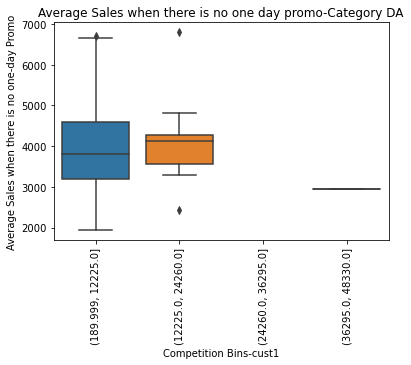

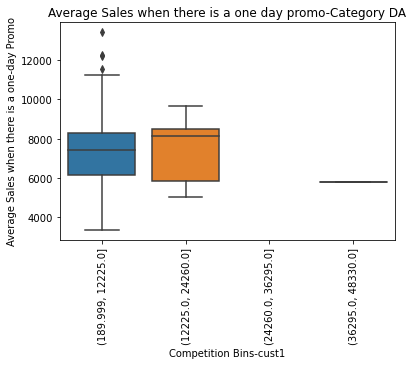

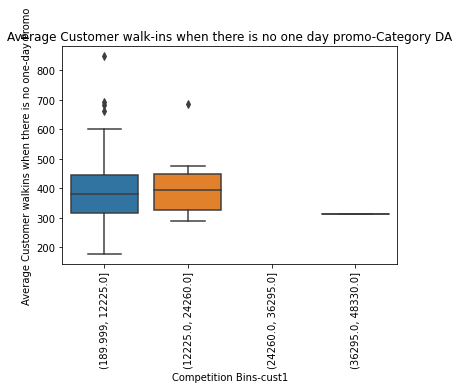

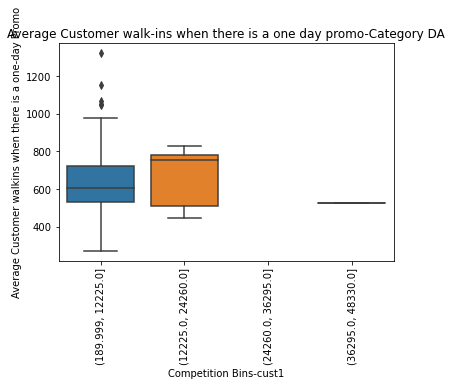

In [99]:
sns.boxplot(y='Average Sales when there is no one-day Promo',x='Competition Bins-cust1',data=store_data_cat_da)
plt.xticks(rotation=90)
plt.title('Average Sales when there is no one day promo-Category DA')
plt.show()

sns.boxplot(y='Average Sales when there is a one-day Promo',x='Competition Bins-cust1',data=store_data_cat_da)
plt.xticks(rotation=90)
plt.title('Average Sales when there is a one day promo-Category DA')
plt.show()

sns.boxplot(y='Average Customer walkins when there is no one-day Promo',x='Competition Bins-cust1',data=store_data_cat_da)
plt.xticks(rotation=90)
plt.title('Average Customer walk-ins when there is no one day promo-Category DA')
plt.show()

sns.boxplot(y='Average Customer walkins when there is a one-day Promo',x='Competition Bins-cust1',data=store_data_cat_da)
plt.xticks(rotation=90)
plt.title('Average Customer walk-ins when there is a one day promo-Category DA')
plt.show()


In [100]:
da_promo=store_data_cat_da[store_data_cat_da['Promo2']==1]
da_promo['Promo2SinceWeek-EG']=da_promo['Promo2SinceWeek'].astype(str)
da_promo['Promo2SinceYear-EG']=da_promo['Promo2SinceYear'].astype(str)
da_promo['Promo2SinceDate']=da_promo['Promo2SinceYear-EG']+'-W'+da_promo['Promo2SinceWeek-EG']
da_store=da_promo['Store'].tolist()
import datetime
Since_Date=[]
for t in da_promo['Promo2SinceDate'].tolist():
    eg=datetime.datetime.strptime(t+'-1','%Y-W%W-%w')
    Since_Date.append(eg)
Since_date=pd.DataFrame(Since_Date)
Since_date['Store']=da_store
Since_date.columns=['Promo2Date','Store']

year_2015=[]
for i in range(46):
    x=2015
    year_2015.append(x)
da_promo['y']=year_2015
da_promo=da_promo.merge(Since_date,on='Store',how='left')
da_promo['y']=pd.to_datetime(da_promo['y'],format='%Y')
da_promo['MonthsSincePromo2']=da_promo['y']-da_promo['Promo2Date']
da_promo['MonthsSincePromo2']=da_promo['MonthsSincePromo2']/np.timedelta64(1,'M')
da_promo.loc[da_promo.MonthsSincePromo2<0,'MonthsSincePromo2']=0

timestamp=pd.to_datetime('2013-02-01')
list_promo2=da_promo[da_promo['Promo2Date']>=timestamp]['Store'].tolist()

before_promo2_sales=[]
after_promo2_sales=[]
before_promo2_cust=[]
after_promo2_cust=[]
for s in list_promo2:
    x=da_promo[da_promo['Store']==s]
    y=x['Promo2Date'].tolist()[0]
    level1=main_data[main_data['Store']==s]
    before_avg=level1[level1['Date']<y]['Sales'].mean()
    after_avg=level1[level1['Date']>=y]['Sales'].mean()
    before_promo2_sales.append(before_avg)
    after_promo2_sales.append(after_avg)
    before_avg_c=level1[level1['Date']<y]['Customers'].mean()
    after_avg_c=level1[level1['Date']>=y]['Customers'].mean()
    before_promo2_cust.append(before_avg_c)
    after_promo2_cust.append(after_avg_c)
list_promo2=pd.DataFrame(list_promo2)
list_promo2.columns=['Store']
list_promo2['Avg Sales before Promo2']=before_promo2_sales
list_promo2['Avg Sales after Promo2']=after_promo2_sales
list_promo2['Avg Cust before Promo2']=before_promo2_cust
list_promo2['Avg Cust after Promo2']=after_promo2_cust
list_promo2=list_promo2.merge(box_da[['Store','Competition Bins-cust1']],on='Store',how='left')


<ipython-input-100-74529765ec29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da_promo['Promo2SinceWeek-EG']=da_promo['Promo2SinceWeek'].astype(str)
<ipython-input-100-74529765ec29>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da_promo['Promo2SinceYear-EG']=da_promo['Promo2SinceYear'].astype(str)
<ipython-input-100-74529765ec29>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

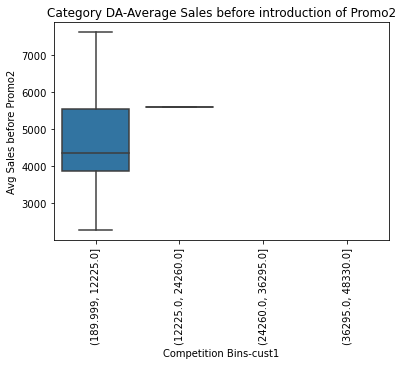

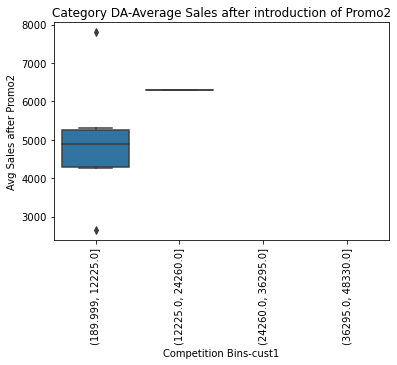

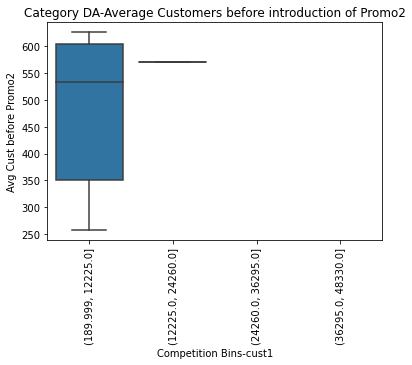

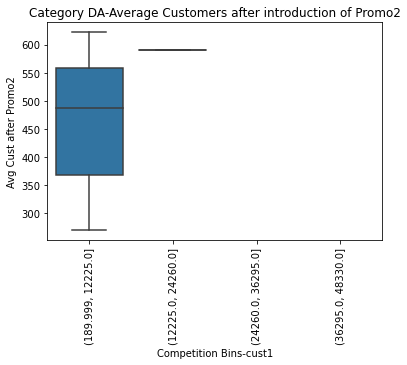

In [101]:
sns.boxplot(y='Avg Sales before Promo2',x='Competition Bins-cust1',data=list_promo2)
plt.xticks(rotation=90)
plt.title('Category DA-Average Sales before introduction of Promo2')
plt.show()

sns.boxplot(y='Avg Sales after Promo2',x='Competition Bins-cust1',data=list_promo2)
plt.xticks(rotation=90)
plt.title('Category DA-Average Sales after introduction of Promo2')
plt.show()


sns.boxplot(y='Avg Cust before Promo2',x='Competition Bins-cust1',data=list_promo2)
plt.xticks(rotation=90)
plt.title('Category DA-Average Customers before introduction of Promo2')
plt.show()

sns.boxplot(y='Avg Cust after Promo2',x='Competition Bins-cust1',data=list_promo2)
plt.xticks(rotation=90)
plt.title('Category DA-Average Customers after introduction of Promo2')
plt.show()


**Category BA**

In [142]:
std=[]
min_ba=store_data_cat_ba['CompetitionDistance'].min()
max_ba=store_data_cat_ba['CompetitionDistance'].max()
for i in bin_range:
    bins_ba=np.linspace(min_ba,max_ba,i).astype(int)
    store_data_cat_ba['Competition Bins1']=pd.cut(store_data_cat_ba['CompetitionDistance'],bins=bins_ba,include_lowest=True)
    example=pd.DataFrame(store_data_cat_ba.groupby('Competition Bins1')['Average Sales'].median().fillna(0)).reset_index()
    count=store_data_cat_ba.drop_duplicates(subset=['Competition Bins1'])['Competition Bins1'].count()
    ind=int(round(0.20*count,0))
    if ind==1:
        ind=ind+1
    else:
        ind=ind
    e1=example.iloc[:ind,-1:]
    e2=np.array(e1['Average Sales'])
    std.append(np.std(e2))
bin_range1=pd.DataFrame(bin_range)
bin_range1.columns=['Bin']
bin_range1['StDev']=std
e3=bin_range1['StDev'].max()
e4=bin_range1[bin_range1['StDev']==e3]['Bin'].max()
opt_bins_ba=np.linspace(min_ba,max_ba,e4).astype(int)
store_data_cat_ba['Competition Bins-opt']=pd.cut(store_data_cat_ba['CompetitionDistance'],bins=opt_bins_ba,include_lowest=True)

<ipython-input-142-b32930a6a252>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_data_cat_ba['Competition Bins1']=pd.cut(store_data_cat_ba['CompetitionDistance'],bins=bins_ba,include_lowest=True)
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-142-b32930a6a252>:6: SettingWithC

In [143]:
#based on Average Sales
std=[]
min_inc_ba=inc_data_ba['totalMonthsSinceOpen'].min()
max_inc_ba=inc_data_ba['totalMonthsSinceOpen'].max()
for i in bin_range:
    bins_inc_ba=np.linspace(min_inc_ba,max_inc_ba,i).astype(int)
    inc_data_ba['Competition Bins1']=pd.cut(inc_data_ba['totalMonthsSinceOpen'],bins=bins_inc_ba,include_lowest=True)
    example=pd.DataFrame(inc_data_ba.groupby('Competition Bins1')['Average Sales'].median().fillna(0)).reset_index()
    count=inc_data_ba.drop_duplicates(subset=['Competition Bins1'])['Competition Bins1'].count()
    ind=int(round(0.20*count,0))
    if ind==1:
        ind=ind+1
    else:
        ind=ind
    e1=example.iloc[:ind,-1:]
    e2=np.array(e1['Average Sales'])
    std.append(np.std(e2))
bin_range1=pd.DataFrame(bin_range)
bin_range1.columns=['Bin']
bin_range1['StDev']=std
e3=bin_range1['StDev'].max()
e4=bin_range1[bin_range1['StDev']==e3]['Bin'].max()
opt_bins_ba=np.linspace(min_inc_ba,max_inc_ba,e4).astype(int)
inc_data_ba['Competition Bins-opt2']=pd.cut(inc_data_ba['totalMonthsSinceOpen'],bins=opt_bins_ba,include_lowest=True)

<ipython-input-143-3fe7f1bad8f7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inc_data_ba['Competition Bins1']=pd.cut(inc_data_ba['totalMonthsSinceOpen'],bins=bins_inc_ba,include_lowest=True)
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-143-3fe7f1bad8f7>:7: SettingWithCopyWarn

<function matplotlib.pyplot.show(close=None, block=None)>

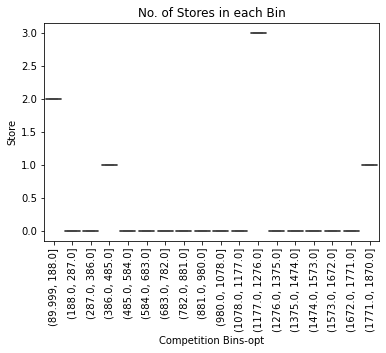

In [145]:
hist_ba=pd.DataFrame(store_data_cat_ba.groupby('Competition Bins-opt')['Store'].count()).reset_index()
hist_ba['Competition Bins-opt']=hist_ba['Competition Bins-opt'].astype(str)
sns.boxplot(y='Store',x='Competition Bins-opt',data=hist_ba)
plt.title('No. of Stores in each Bin')
plt.xticks(rotation=90)
plt.show


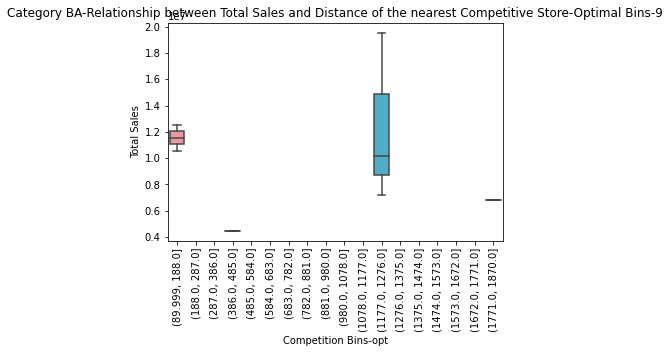

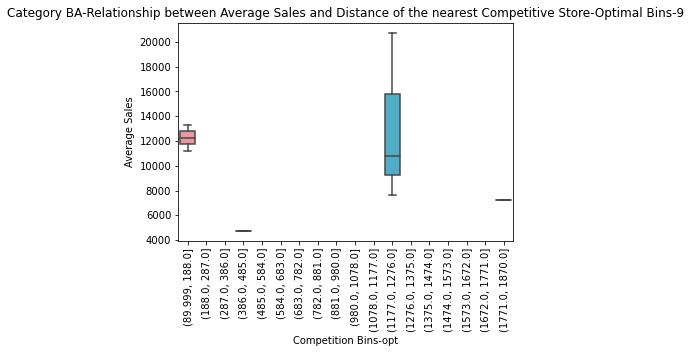

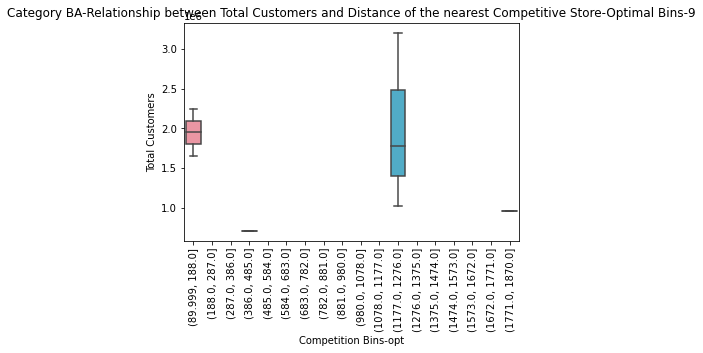

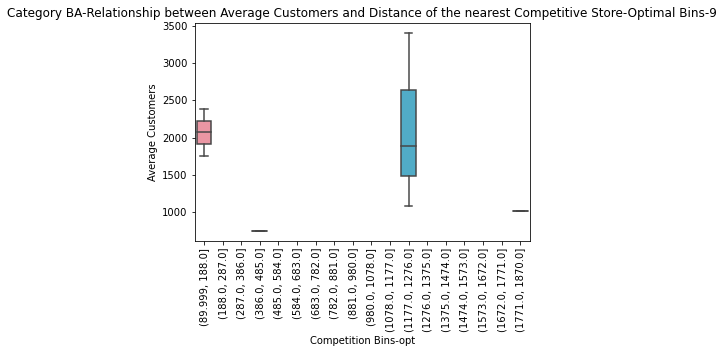

In [146]:
sns.boxplot(y='Total Sales',x='Competition Bins-opt',data=store_data_cat_ba)
plt.xticks(rotation=90)
plt.title('Category BA-Relationship between Total Sales and Distance of the nearest Competitive Store-Optimal Bins-'+str(e4))
plt.show()

sns.boxplot(y='Average Sales',x='Competition Bins-opt',data=store_data_cat_ba)
plt.xticks(rotation=90)
plt.title('Category BA-Relationship between Average Sales and Distance of the nearest Competitive Store-Optimal Bins-'+str(e4))
plt.show()

sns.boxplot(y='Total Customers',x='Competition Bins-opt',data=store_data_cat_ba)
plt.xticks(rotation=90)
plt.title('Category BA-Relationship between Total Customers and Distance of the nearest Competitive Store-Optimal Bins-'+str(e4))
plt.show()

sns.boxplot(y='Average Customers',x='Competition Bins-opt',data=store_data_cat_ba)
plt.xticks(rotation=90)
plt.title('Category BA-Relationship between Average Customers and Distance of the nearest Competitive Store-Optimal Bins-'+str(e4))
plt.show()



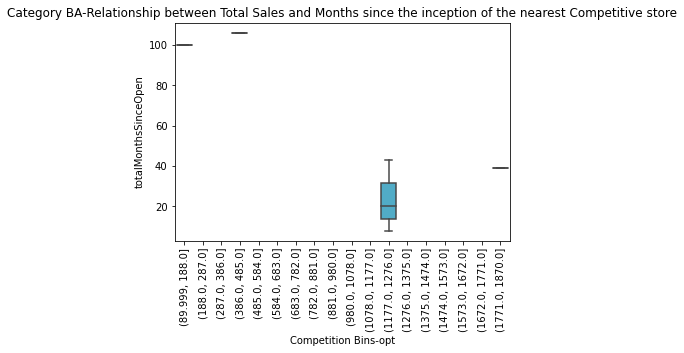

In [147]:
box2=inc_data_ba.merge(store_data_cat_ba[['Store','Competition Bins-opt']],on='Store',how='left')
sns.boxplot(y='totalMonthsSinceOpen',x='Competition Bins-opt',data=box2)
plt.xticks(rotation=90)

plt.title('Category BA-Relationship between Total Sales and Months since the inception of the nearest Competitive store')
plt.show()


In [148]:
box2=box2.merge(comp_data4[['Store','Date of Inception of Competition']],on='Store',how='left')
timestamp=pd.to_datetime('2013-02-01')
list_comp_ba=box2[box2['Date of Inception of Competition']>=timestamp]['Store'].tolist()

before_comp_sales=[]
after_comp_sales=[]
before_comp_cust=[]
after_comp_cust=[]
for s in list_comp_ba:
    x=box2[box2['Store']==s]
    y=x['Date of Inception of Competition'].tolist()[0]
    level1=main_data[main_data['Store']==s]
    before_avg=level1[level1['Date']<y]['Sales'].mean()
    after_avg=level1[level1['Date']>=y]['Sales'].mean()
    before_comp_sales.append(before_avg)
    after_comp_sales.append(after_avg)
    before_avg_c=level1[level1['Date']<y]['Customers'].mean()
    after_avg_c=level1[level1['Date']>=y]['Customers'].mean()
    before_comp_cust.append(before_avg_c)
    after_comp_cust.append(after_avg_c)
list_comp_ba=pd.DataFrame(list_comp_ba)
list_comp_ba.columns=['Store']
list_comp_ba['Avg Sales before Comp']=before_comp_sales
list_comp_ba['Avg Sales after Comp']=after_comp_sales
list_comp_ba['Avg Cust before Comp']=before_comp_cust
list_comp_ba['Avg Cust after Comp']=after_comp_cust
list_comp_ba=list_comp_ba.merge(box2[['Store','Competition Bins-opt']],on='Store',how='left')

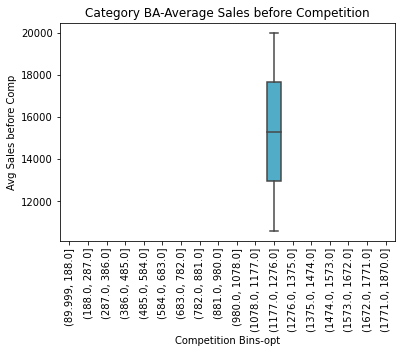

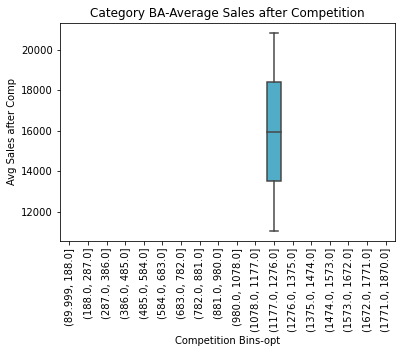

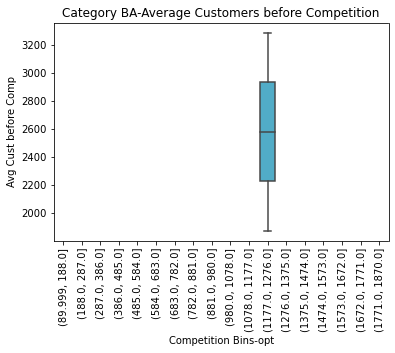

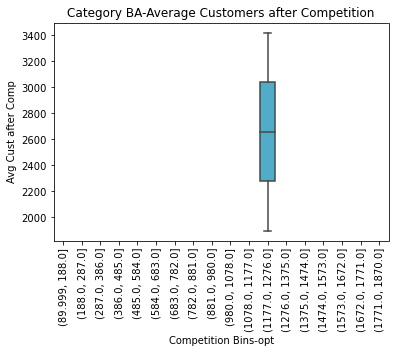

In [149]:
sns.boxplot(y='Avg Sales before Comp',x='Competition Bins-opt',data=list_comp_ba)
plt.xticks(rotation=90)
plt.title('Category BA-Average Sales before Competition')
plt.show()

sns.boxplot(y='Avg Sales after Comp',x='Competition Bins-opt',data=list_comp_ba)
plt.xticks(rotation=90)
plt.title('Category BA-Average Sales after Competition')
plt.show()


sns.boxplot(y='Avg Cust before Comp',x='Competition Bins-opt',data=list_comp_ba)
plt.xticks(rotation=90)
plt.title('Category BA-Average Customers before Competition')
plt.show()

sns.boxplot(y='Avg Cust after Comp',x='Competition Bins-opt',data=list_comp_ba)
plt.xticks(rotation=90)
plt.title('Category BA-Average Customers after Competition')
plt.show()

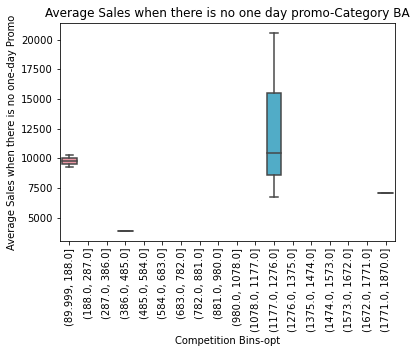

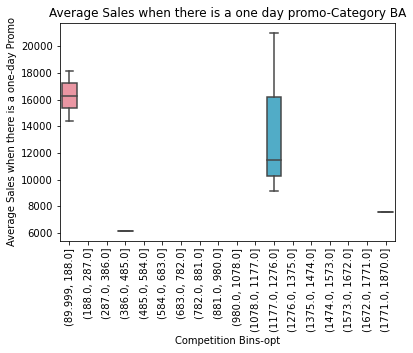

In [150]:
sns.boxplot(y='Average Sales when there is no one-day Promo',x='Competition Bins-opt',data=store_data_cat_ba)
plt.xticks(rotation=90)
plt.title('Average Sales when there is no one day promo-Category BA')
plt.show()

sns.boxplot(y='Average Sales when there is a one-day Promo',x='Competition Bins-opt',data=store_data_cat_ba)
plt.xticks(rotation=90)
plt.title('Average Sales when there is a one day promo-Category BA')
plt.show()




In [159]:
ba_promo=store_data_cat_ba[store_data_cat_ba['Promo2']==1]
ba_promo['Promo2SinceWeek-EG']=ba_promo['Promo2SinceWeek'].astype(str)
ba_promo['Promo2SinceYear-EG']=ba_promo['Promo2SinceYear'].astype(str)
ba_promo['Promo2SinceDate']=ba_promo['Promo2SinceYear-EG']+'-W'+ba_promo['Promo2SinceWeek-EG']
ba_store=ba_promo['Store'].tolist()
import datetime
Since_Date=[]
for t in ba_promo['Promo2SinceDate'].tolist():
    eg=datetime.datetime.strptime(t+'-1','%Y-W%W-%w')
    Since_Date.append(eg)
Since_date=pd.DataFrame(Since_Date)
Since_date['Store']=ba_store
Since_date.columns=['Promo2Date','Store']







<ipython-input-159-8f19f9114b28>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ba_promo['Promo2SinceWeek-EG']=ba_promo['Promo2SinceWeek'].astype(str)
<ipython-input-159-8f19f9114b28>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ba_promo['Promo2SinceYear-EG']=ba_promo['Promo2SinceYear'].astype(str)
<ipython-input-159-8f19f9114b28>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [160]:
year_2015=[]
for i in range(1):
    x=2015
    year_2015.append(x)
ba_promo['y']=year_2015
ba_promo=ba_promo.merge(Since_date,on='Store',how='left')
ba_promo['y']=pd.to_datetime(ba_promo['y'],format='%Y')
ba_promo['MonthsSincePromo2']=ba_promo['y']-ba_promo['Promo2Date']
ba_promo['MonthsSincePromo2']=ba_promo['MonthsSincePromo2']/np.timedelta64(1,'M')
ba_promo.loc[ba_promo.MonthsSincePromo2<0,'MonthsSincePromo2']=0


<ipython-input-160-90c6dba69809>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ba_promo['y']=year_2015


In [163]:
timestamp=pd.to_datetime('2013-02-01')
list_promo2=ba_promo[ba_promo['Promo2Date']>=timestamp]['Store'].tolist()
before_promo2_sales=[]
after_promo2_sales=[]
before_promo2_cust=[]
after_promo2_cust=[]
for s in list_promo2:
    x=ba_promo[ba_promo['Store']==s]
    y=x['Promo2Date'].tolist()[0]
    level1=main_data[main_data['Store']==s]
    before_avg=level1[level1['Date']<y]['Sales'].mean()
    after_avg=level1[level1['Date']>=y]['Sales'].mean()
    before_promo2_sales.append(before_avg)
    after_promo2_sales.append(after_avg)
    before_avg_c=level1[level1['Date']<y]['Customers'].mean()
    after_avg_c=level1[level1['Date']>=y]['Customers'].mean()
    before_promo2_cust.append(before_avg_c)
    after_promo2_cust.append(after_avg_c)
list_promo2=pd.DataFrame(list_promo2)
list_promo2.columns=['Store']
list_promo2['Avg Sales before Promo2']=before_promo2_sales
list_promo2['Avg Sales after Promo2']=after_promo2_sales
list_promo2['Avg Cust before Promo2']=before_promo2_cust
list_promo2['Avg Cust after Promo2']=after_promo2_cust
list_promo2=list_promo2.merge(ba_promo[['Store','Competition Bins-opt']],on='Store',how='left')

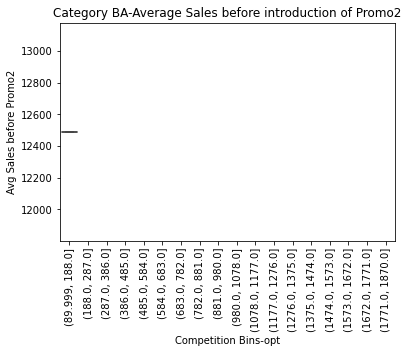

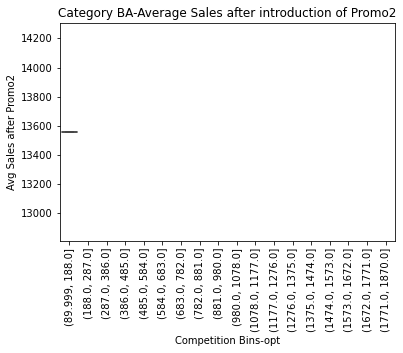

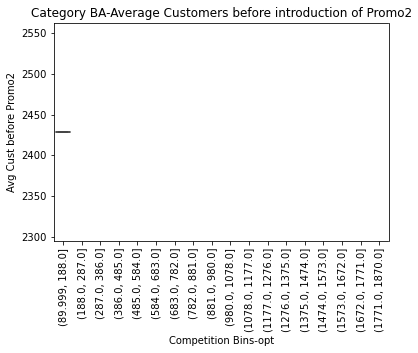

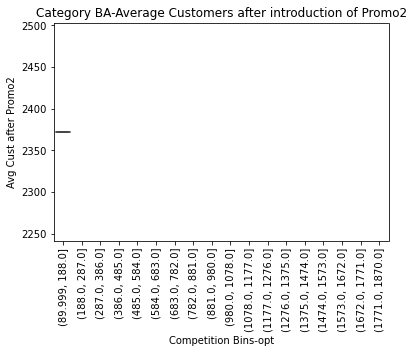

In [165]:
sns.boxplot(y='Avg Sales before Promo2',x='Competition Bins-opt',data=list_promo2)
plt.xticks(rotation=90)
plt.title('Category BA-Average Sales before introduction of Promo2')
plt.show()

sns.boxplot(y='Avg Sales after Promo2',x='Competition Bins-opt',data=list_promo2)
plt.xticks(rotation=90)
plt.title('Category BA-Average Sales after introduction of Promo2')
plt.show()


sns.boxplot(y='Avg Cust before Promo2',x='Competition Bins-opt',data=list_promo2)
plt.xticks(rotation=90)
plt.title('Category BA-Average Customers before introduction of Promo2')
plt.show()

sns.boxplot(y='Avg Cust after Promo2',x='Competition Bins-opt',data=list_promo2)
plt.xticks(rotation=90)
plt.title('Category BA-Average Customers after introduction of Promo2')
plt.show()


**Category BB**

In [125]:
std=[]
min_bb=store_data_cat_bb['CompetitionDistance'].min()
max_bb=store_data_cat_bb['CompetitionDistance'].max()
for i in bin_range:
    bins_bb=np.linspace(min_bb,max_bb,i).astype(int)
    store_data_cat_bb['Competition Bins1']=pd.cut(store_data_cat_bb['CompetitionDistance'],bins=bins_bb,include_lowest=True)
    example=pd.DataFrame(store_data_cat_bb.groupby('Competition Bins1')['Average Sales'].median().fillna(0)).reset_index()
    count=store_data_cat_bb.drop_duplicates(subset=['Competition Bins1'])['Competition Bins1'].count()
    ind=int(round(0.20*count,0))
    if ind==1:
        ind=ind+1
    else:
        ind=ind
    e1=example.iloc[:ind,-1:]
    e2=np.array(e1['Average Sales'])
    std.append(np.std(e2))
bin_range1=pd.DataFrame(bin_range)
bin_range1.columns=['Bin']
bin_range1['StDev']=std
e3=bin_range1['StDev'].max()
e4=bin_range1[bin_range1['StDev']==e3]['Bin'].max()
opt_bins_bb=np.linspace(min_bb,max_bb,e4).astype(int)
store_data_cat_bb['Competition Bins-opt']=pd.cut(store_data_cat_bb['CompetitionDistance'],bins=opt_bins_bb,include_lowest=True)

<ipython-input-125-a9e647d1fbbe>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_data_cat_bb['Competition Bins1']=pd.cut(store_data_cat_bb['CompetitionDistance'],bins=bins_bb,include_lowest=True)
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-125-a9e647d1fbbe>:6: SettingWithC

<function matplotlib.pyplot.show(close=None, block=None)>

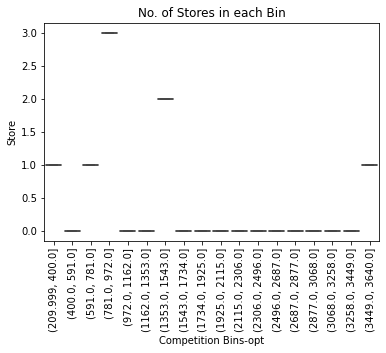

In [126]:
hist_bb=pd.DataFrame(store_data_cat_bb.groupby('Competition Bins-opt')['Store'].count()).reset_index()
hist_bb['Competition Bins-opt']=hist_bb['Competition Bins-opt'].astype(str)
sns.boxplot(y='Store',x='Competition Bins-opt',data=hist_bb)
plt.title('No. of Stores in each Bin')
plt.xticks(rotation=90)
plt.show


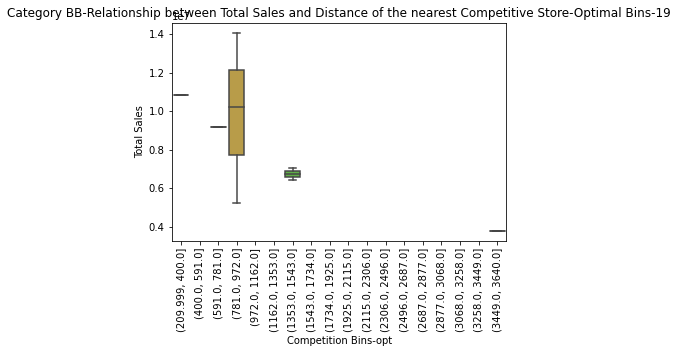

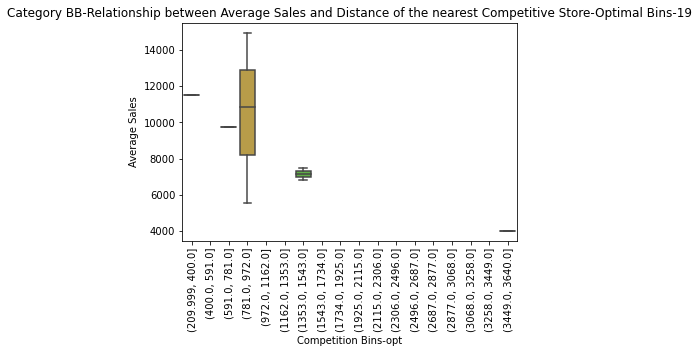

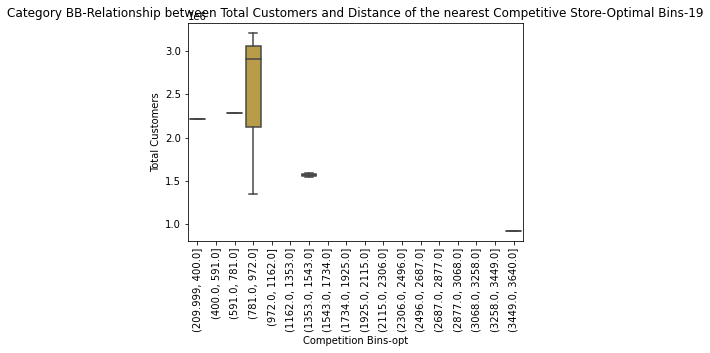

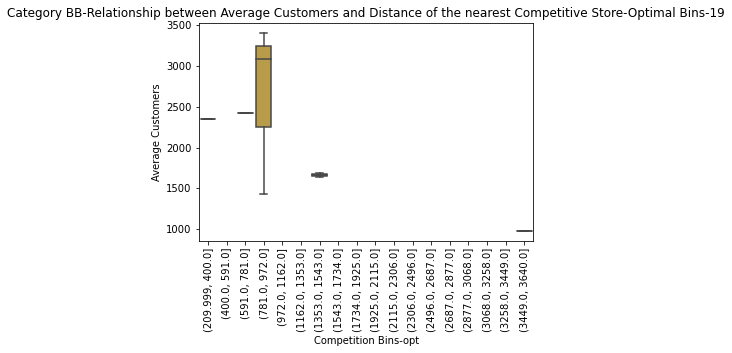

In [127]:
sns.boxplot(y='Total Sales',x='Competition Bins-opt',data=store_data_cat_bb)
plt.xticks(rotation=90)
plt.title('Category BB-Relationship between Total Sales and Distance of the nearest Competitive Store-Optimal Bins-'+str(e4))
plt.show()

sns.boxplot(y='Average Sales',x='Competition Bins-opt',data=store_data_cat_bb)
plt.xticks(rotation=90)
plt.title('Category BB-Relationship between Average Sales and Distance of the nearest Competitive Store-Optimal Bins-'+str(e4))
plt.show()

sns.boxplot(y='Total Customers',x='Competition Bins-opt',data=store_data_cat_bb)
plt.xticks(rotation=90)
plt.title('Category BB-Relationship between Total Customers and Distance of the nearest Competitive Store-Optimal Bins-'+str(e4))
plt.show()

sns.boxplot(y='Average Customers',x='Competition Bins-opt',data=store_data_cat_bb)
plt.xticks(rotation=90)
plt.title('Category BB-Relationship between Average Customers and Distance of the nearest Competitive Store-Optimal Bins-'+str(e4))
plt.show()



In [128]:
#based on Average Sales
std=[]
min_inc_bb=inc_data_bb['totalMonthsSinceOpen'].min()
max_inc_bb=inc_data_bb['totalMonthsSinceOpen'].max()
for i in bin_range:
    bins_inc_bb=np.linspace(min_inc_bb,max_inc_bb,i).astype(int)
    inc_data_bb['Competition Bins1']=pd.cut(inc_data_bb['totalMonthsSinceOpen'],bins=bins_inc_bb,include_lowest=True)
    example=pd.DataFrame(inc_data_bb.groupby('Competition Bins1')['Average Sales'].median().fillna(0)).reset_index()
    count=inc_data_bb.drop_duplicates(subset=['Competition Bins1'])['Competition Bins1'].count()
    ind=int(round(0.20*count,0))
    if ind==1:
        ind=ind+1
    else:
        ind=ind
    e1=example.iloc[:ind,-1:]
    e2=np.array(e1['Average Sales'])
    std.append(np.std(e2))
bin_range1=pd.DataFrame(bin_range)
bin_range1.columns=['Bin']
bin_range1['StDev']=std
e3=bin_range1['StDev'].max()
e4=bin_range1[bin_range1['StDev']==e3]['Bin'].max()
opt_bins_bb=np.linspace(min_inc_bb,max_inc_bb,e4).astype(int)
inc_data_bb['Competition Bins-opt2']=pd.cut(inc_data_bb['totalMonthsSinceOpen'],bins=opt_bins_bb,include_lowest=True)

<ipython-input-128-1ffd44dcc979>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inc_data_bb['Competition Bins1']=pd.cut(inc_data_bb['totalMonthsSinceOpen'],bins=bins_inc_bb,include_lowest=True)
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\mural\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-128-1ffd44dcc979>:7: SettingWithCopyWarn

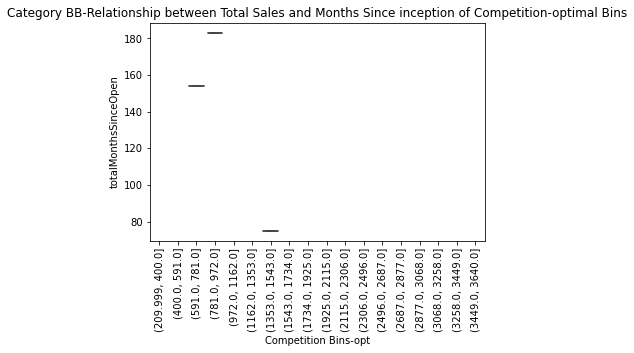

In [129]:
box3=inc_data_bb.merge(store_data_cat_bb[['Store','Competition Bins-opt']],on='Store',how='left')
sns.boxplot(y='totalMonthsSinceOpen',x='Competition Bins-opt',data=box3)
plt.xticks(rotation=90)
plt.title('Category BB-Relationship between Total Sales and Months Since inception of Competition-optimal Bins')
plt.show()


In [130]:
box3=box3.merge(comp_data4[['Store','Date of Inception of Competition']],on='Store',how='left')
timestamp=pd.to_datetime('2013-02-01')
list_comp_bb=box3[box3['Date of Inception of Competition']>=timestamp]['Store'].tolist()
list_comp_bb
    

[]

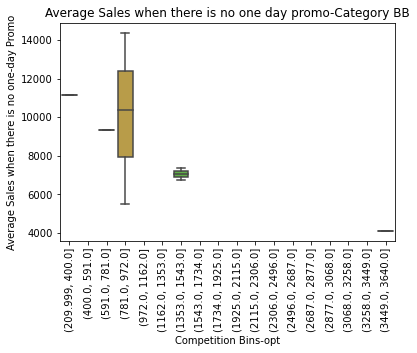

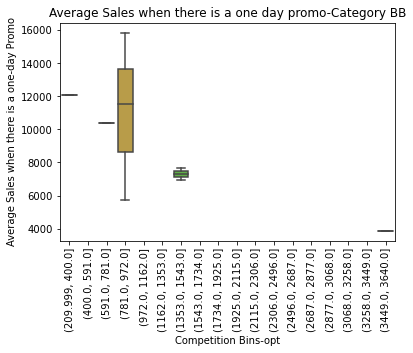

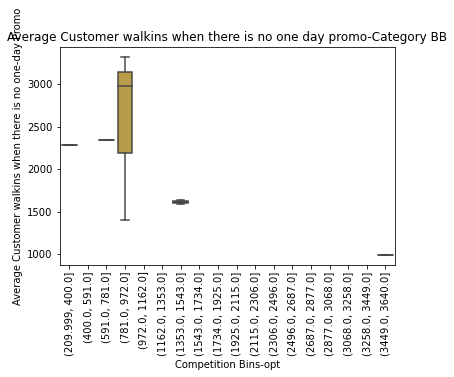

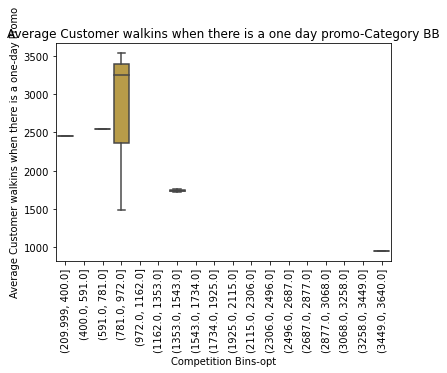

In [131]:
sns.boxplot(y='Average Sales when there is no one-day Promo',x='Competition Bins-opt',data=store_data_cat_bb)
plt.xticks(rotation=90)
plt.title('Average Sales when there is no one day promo-Category BB')
plt.show()

sns.boxplot(y='Average Sales when there is a one-day Promo',x='Competition Bins-opt',data=store_data_cat_bb)
plt.xticks(rotation=90)
plt.title('Average Sales when there is a one day promo-Category BB')
plt.show()

sns.boxplot(y='Average Customer walkins when there is no one-day Promo',x='Competition Bins-opt',data=store_data_cat_bb)
plt.xticks(rotation=90)
plt.title('Average Customer walkins when there is no one day promo-Category BB')
plt.show()

sns.boxplot(y='Average Customer walkins when there is a one-day Promo',x='Competition Bins-opt',data=store_data_cat_bb)
plt.xticks(rotation=90)
plt.title('Average Customer walkins when there is a one day promo-Category BB')
plt.show()



In [132]:
bb_promo=store_data_cat_bb[store_data_cat_bb['Promo2']==1]
bb_promo['Promo2SinceWeek-EG']=bb_promo['Promo2SinceWeek'].astype(str)
bb_promo['Promo2SinceYear-EG']=bb_promo['Promo2SinceYear'].astype(str)
bb_promo['Promo2SinceDate']=bb_promo['Promo2SinceYear-EG']+'-W'+bb_promo['Promo2SinceWeek-EG']
bb_promo

<ipython-input-132-45daa4441a20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bb_promo['Promo2SinceWeek-EG']=bb_promo['Promo2SinceWeek'].astype(str)
<ipython-input-132-45daa4441a20>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bb_promo['Promo2SinceYear-EG']=bb_promo['Promo2SinceYear'].astype(str)
<ipython-input-132-45daa4441a20>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

Store  2013-Sales  2014-Sales  2015-Sales  2013-Customers  \
226    274     1273346     1502874     1017792          321539   
291    353     1683417     2170749     1401607          453104   
637    769     3541487     4080130     2576383         1018732   

     2014-Customers  2015-Customers StoreType Assortment  CompetitionDistance  \
226          367377          236319         b          b               3640.0   
291          548834          347572         b          b                900.0   
637         1167624          715995         b          b                840.0   

     ...  2013-Average Customers  2014-Average Customers  \
226  ...              880.928767             1006.512329   
291  ...             1241.380822             1503.654795   
637  ...             2791.046575             3198.969863   

     2015-Average Customers  Average Sales  Average Customers  \
226             1114.712264    4027.613588         982.202760   
291             1639.490566    5579.376858        1432.600849   
637             3377.334906   10825.902335        3081.052017   

    Competition Bins1 Competition Bins-opt  Promo2SinceWeek-EG  \
226  (3449.0, 3640.0]     (3449.0, 3640.0]                  10   
291    (781.0, 972.0]       (781.0, 972.0]                  14   
637    (781.0, 972.0]       (781.0, 972.0]                  48   

     Promo2SinceYear-EG  Promo2SinceDate  
226                2013         2013-W10  
291                2013         2013-W14  
637                2012         2012-W48  

[3 rows x 36 columns]

In [133]:
bb_store=bb_promo['Store'].tolist()
import datetime
Since_Date=[]
for t in bb_promo['Promo2SinceDate'].tolist():
    eg=datetime.datetime.strptime(t+'-1','%Y-W%W-%w')
    Since_Date.append(eg)
Since_date=pd.DataFrame(Since_Date)
Since_date['Store']=bb_store
Since_date.columns=['Promo2Date','Store']



In [134]:
year_2015=[]
for i in range(3):
    x=2015
    year_2015.append(x)
bb_promo['y']=year_2015
bb_promo=bb_promo.merge(Since_date,on='Store',how='left')
bb_promo['y']=pd.to_datetime(bb_promo['y'],format='%Y')
bb_promo['MonthsSincePromo2']=bb_promo['y']-bb_promo['Promo2Date']
bb_promo['MonthsSincePromo2']=bb_promo['MonthsSincePromo2']/np.timedelta64(1,'M')
bb_promo.loc[bb_promo.MonthsSincePromo2<0,'MonthsSincePromo2']=0


<ipython-input-134-f325dc9ec37e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bb_promo['y']=year_2015


In [169]:
timestamp=pd.to_datetime('2013-02-01')
list_promo2=bb_promo[bb_promo['Promo2Date']>=timestamp]['Store'].tolist()
before_promo2_sales=[]
after_promo2_sales=[]
before_promo2_cust=[]
after_promo2_cust=[]
for s in list_promo2:
    x=bb_promo[bb_promo['Store']==s]
    y=x['Promo2Date'].tolist()[0]
    level1=main_data[main_data['Store']==s]
    before_avg=level1[level1['Date']<y]['Sales'].mean()
    after_avg=level1[level1['Date']>=y]['Sales'].mean()
    before_promo2_sales.append(before_avg)
    after_promo2_sales.append(after_avg)
    before_avg_c=level1[level1['Date']<y]['Customers'].mean()
    after_avg_c=level1[level1['Date']>=y]['Customers'].mean()
    before_promo2_cust.append(before_avg_c)
    after_promo2_cust.append(after_avg_c)
list_promo2=pd.DataFrame(list_promo2)
list_promo2.columns=['Store']
list_promo2['Avg Sales before Promo2']=before_promo2_sales
list_promo2['Avg Sales after Promo2']=after_promo2_sales
list_promo2['Avg Cust before Promo2']=before_promo2_cust
list_promo2['Avg Cust after Promo2']=after_promo2_cust
list_promo2=list_promo2.merge(bb_promo[['Store','Competition Bins-opt']],on='Store',how='left')

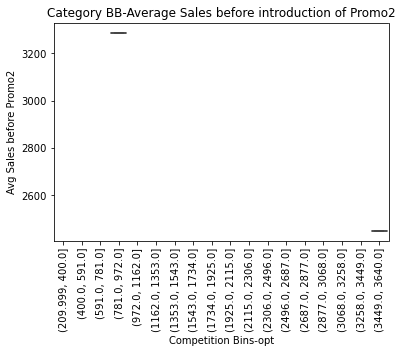

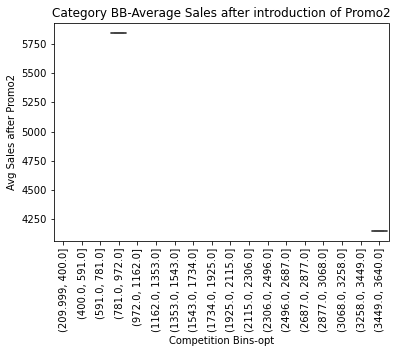

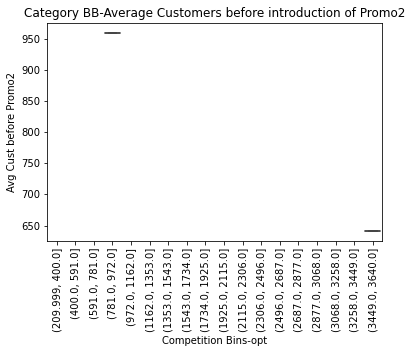

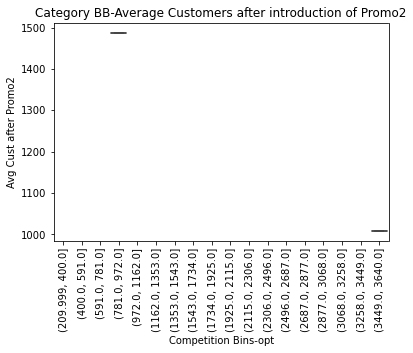

In [172]:
sns.boxplot(y='Avg Sales before Promo2',x='Competition Bins-opt',data=list_promo2)
plt.xticks(rotation=90)
plt.title('Category BB-Average Sales before introduction of Promo2')
plt.show()

sns.boxplot(y='Avg Sales after Promo2',x='Competition Bins-opt',data=list_promo2)
plt.xticks(rotation=90)
plt.title('Category BB-Average Sales after introduction of Promo2')
plt.show()


sns.boxplot(y='Avg Cust before Promo2',x='Competition Bins-opt',data=list_promo2)
plt.xticks(rotation=90)
plt.title('Category BB-Average Customers before introduction of Promo2')
plt.show()

sns.boxplot(y='Avg Cust after Promo2',x='Competition Bins-opt',data=list_promo2)
plt.xticks(rotation=90)
plt.title('Category BB-Average Customers after introduction of Promo2')
plt.show()
